## 1.Import library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.decomposition import PCA
import seaborn as sns
import os

## 2. Explore Data Analysis

### 2.1. Phân tích thăm dò

#### 2.1.1. Thống kê về cấu trúc của bộ dữ liệu

> Tổng hợp bộ dữ liệu

In [2]:
df_huyen_cu_jut=pd.read_excel("../data_processed/HUYỆN CƯ JUT.xlsx")
df_huyen_dak_glong=pd.read_excel("../data_processed/Huyện Đắk Glong.xlsx")
df_huyen_dak_mil=pd.read_excel("../data_processed/HUYỆN DAK MIL.xlsx")
df_huyen_dak_rlap=pd.read_excel("../data_processed/HUYỆN ĐẮK RLẤP.xlsx")
df_huyen_dak_song=pd.read_excel("../data_processed/HUYỆN ĐẮK SONG.xlsx")
df_huyen_krong_no=pd.read_excel("../data_processed/HUYỆN KRÔNG NÔ.xlsx")
df_huyen_tuy_duc=pd.read_excel("../data_processed/HUYỆN TUY ĐỨC.xlsx")
df_tp_gia_nghia=pd.read_excel("../data_processed/TP GIA NGHĨA.xlsx")

In [3]:
df_tong_hop = pd.concat([df_huyen_cu_jut, df_huyen_dak_glong, df_huyen_dak_mil, df_huyen_dak_rlap, 
                         df_huyen_dak_song, df_huyen_krong_no, df_huyen_tuy_duc, df_tp_gia_nghia], ignore_index=False)

In [4]:
df_tong_hop.columns

Index(['Unnamed: 0', 'STT_HO', 'STT', 'HO_TEN_CHU_HO', 'HO_TEN_THANH_VIEN',
       'QUANHE_CHUHO', 'NGAY_SINH', 'GIOI_TINH', 'SO_CCCD', 'TINH', 'HUYEN',
       'XA', 'DANTOC', 'PHAN_LOAI_HO', 'TUOI'],
      dtype='object')

In [5]:
df_tong_hop.shape

(105356, 15)

In [6]:
df_tong_hop.isnull().sum()

Unnamed: 0               0
STT_HO               80248
STT                   2191
HO_TEN_CHU_HO          527
HO_TEN_THANH_VIEN       30
QUANHE_CHUHO             0
NGAY_SINH              777
GIOI_TINH                0
SO_CCCD               6904
TINH                     0
HUYEN                    0
XA                       0
DANTOC                   0
PHAN_LOAI_HO             0
TUOI                     0
dtype: int64

> Xử lý chuẩn hoá chỗ cột QUANHE_CHUHO

In [7]:
dict_quanhe = {
    'HEAD': 1,
    'CHILD': 3,
    'PARENT': 4,
    'PARTNER': 2,
    'OTHER': 5
}

# Định dạng cột 'QUANHE_CHUHO' theo dictionary
df_tong_hop['QUANHE_CHUHO'] = df_tong_hop['QUANHE_CHUHO'].map(dict_quanhe)

In [8]:
# Tìm giá trị phổ biến (mode) của cột 'QUANHE_CHUHO'
most_frequent_quanhe_chuho = df_tong_hop['QUANHE_CHUHO'].mode().iloc[0]

# Điền giá trị phổ biến vào các ô trống (NaN) trong cột 'QUANHE_CHUHO'
df_tong_hop['QUANHE_CHUHO'].fillna(most_frequent_quanhe_chuho, inplace=True)

In [9]:
df_tong_hop['QUANHE_CHUHO'].unique()

array([3., 1., 5., 4., 2.])

In [10]:
reverse_mapping_dan_toc = {
    1: 'Kinh (Việt)',
    2: 'Tày',
    3: 'Thái',
    6: 'Mường',
    4: 'Hoa (Hán)',
    5: 'Khmer',
    7: 'Nùng',
    8: 'HMông (Mèo)',
    9: 'Dao',
    10: 'Gia-rai',
    12: 'Ê-đê',
    13: 'Ba-na',
    15: 'Sán Chay (Cao lan - Sán chỉ)',
    17: 'Chăm (chàm)',
    14: 'Xê-đăng',
    18: 'Sán Dìu',
    19: 'Hrê',
    16: 'Cơ-ho',
    21: 'Ra Glay',
    20: 'M\'Nông',
    24: 'Thổ',
    22: 'Xtiêng',
    29: 'Khơ Mú',
    23: 'Bru-Vân Kiều',
    25: 'Giáy',
    26: 'Cơ tu',
    27: 'Gié-Triêng',
    31: 'Ta Ôi',
    28: 'Mạ',
    30: 'Co',
    32: 'Chơ Ro',
    35: 'Hà Nhì',
    34: 'Xinh Mun',
    36: 'Chu-ru',
    37: 'Lào',
    38: 'La Chí',
    40: 'Phù Lá',
    41: 'La Hủ',
    33: 'Kháng',
    42: 'Lự',
    46: 'Pà Thẻn',
    43: 'Lô Lô',
    44: 'Chứt',
    45: 'Mảng',
    47: 'Cờ lao',
    49: 'Bố Y',
    39: 'La Ha',
    48: 'Cống',
    11: 'Ngái',
    50: 'Si La',
    51: 'Pu Péo',
    52: 'Brâu',
    54: 'Rơ Măm',
    53: 'Ơ Đu',
    56: '56'
}

df_tong_hop['DANTOC']=df_tong_hop['DANTOC'].map(reverse_mapping_dan_toc)

In [11]:
# Lọc các dòng mà cột 'DANTOC' bị null
df_null_dantoc = df_tong_hop[df_tong_hop['DANTOC'].isnull()][['DANTOC','HO_TEN_THANH_VIEN']]

# In ra các dòng này
print(df_null_dantoc)


Empty DataFrame
Columns: [DANTOC, HO_TEN_THANH_VIEN]
Index: []


> Xuất file

In [12]:
df_file_tong_hop=df_tong_hop[[ 'TINH', 'HUYEN',
       'XA', 'DANTOC', 'PHAN_LOAI_HO', 'TUOI','GIOI_TINH']]
df_file_tong_hop.to_excel("../data_processed/TongHop.xlsx")

> Kiểm tra giá trị null

In [13]:
df_tong_hop.isnull().sum()

Unnamed: 0               0
STT_HO               80248
STT                   2191
HO_TEN_CHU_HO          527
HO_TEN_THANH_VIEN       30
QUANHE_CHUHO             0
NGAY_SINH              777
GIOI_TINH                0
SO_CCCD               6904
TINH                     0
HUYEN                    0
XA                       0
DANTOC                   0
PHAN_LOAI_HO             0
TUOI                     0
dtype: int64

In [14]:
df_tong_hop.shape

(105356, 15)

#### Bộ dữ liệu này được trích xuất từ phần mềm quản lý người thuộc hộ nghèo/cận nghèo và là một bộ dữ liệu về nhân khẩu học của tỉnh Đắk Nông bao gồm 15 thuộc tính và 97 088 hàng với mỗi hàng là thông tin cơ bản của một người dân thuộc vào hộ nghèo và cận nghèo

In [15]:
df_tong_hop.head(5)

Unnamed: 0 STT_HO  STT     HO_TEN_CHU_HO  HO_TEN_THANH_VIEN  QUANHE_CHUHO  \
0           0    1.0  1.0    TRƯƠNG THỊ LÙN     TRƯƠNG THỊ LÙN           3.0   
1           1    2.0  2.0  HOÀNG VĂN TRƯỜNG   HOÀNG VĂN TRƯỜNG           3.0   
2           2    NaN  3.0  HOÀNG VĂN TRƯỜNG       PHẠM THỊ SOI           3.0   
3           3    NaN  4.0  HOÀNG VĂN TRƯỜNG  HOÀNG THỊ BẢO THI           3.0   
4           4    NaN  5.0  HOÀNG VĂN TRƯỜNG       HOÀNG KỲ ANH           3.0   

    NGAY_SINH  GIOI_TINH       SO_CCCD      TINH   HUYEN         XA  \
0  22/04/1905        2.0  054139002355  ĐẮK NÔNG  CƯ JUT  TÂM THẮNG   
1  02/06/1905        1.0  036080016941  ĐẮK NÔNG  CƯ JUT  TÂM THẮNG   
2  03/06/1905        2.0  036181021986  ĐẮK NÔNG  CƯ JUT  TÂM THẮNG   
3  03/07/1905        2.0  067311001529  ĐẮK NÔNG  CƯ JUT  TÂM THẮNG   
4  05/07/1905        1.0  067213007898  ĐẮK NÔNG  CƯ JUT  TÂM THẮNG   

        DANTOC  PHAN_LOAI_HO   TUOI  
0  Kinh (Việt)             1  119.0  
1  Kinh (Việt)             1  119.0  
2  Kinh (Việt)             1  119.0  
3  Kinh (Việt)             1  119.0  
4  Kinh (Việt)             1  119.0

> Số lượng dòng và cột sau khi tổng hợp

In [16]:
df_tong_hop.shape

(105356, 15)

> Cấu trúc của bộ dữ liệu

In [17]:
df_tong_hop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105356 entries, 0 to 957
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         105356 non-null  int64  
 1   STT_HO             25108 non-null   object 
 2   STT                103165 non-null  float64
 3   HO_TEN_CHU_HO      104829 non-null  object 
 4   HO_TEN_THANH_VIEN  105326 non-null  object 
 5   QUANHE_CHUHO       105356 non-null  float64
 6   NGAY_SINH          104579 non-null  object 
 7   GIOI_TINH          105356 non-null  float64
 8   SO_CCCD            98452 non-null   object 
 9   TINH               105356 non-null  object 
 10  HUYEN              105356 non-null  object 
 11  XA                 105356 non-null  object 
 12  DANTOC             105356 non-null  object 
 13  PHAN_LOAI_HO       105356 non-null  int64  
 14  TUOI               105356 non-null  float64
dtypes: float64(4), int64(2), object(9)
memory usage: 12.9+ MB


In [18]:
df_tong_hop.drop(columns=['Unnamed: 0','STT'],inplace=True)

> Thống kê dữ liệu

In [19]:
df_tong_hop.describe()

QUANHE_CHUHO      GIOI_TINH   PHAN_LOAI_HO           TUOI
count  105356.000000  105356.000000  105356.000000  105356.000000
mean        2.779396       1.512358       1.486313      27.015524
std         0.760497       0.499850       0.499815      18.881958
min         1.000000       1.000000       1.000000       1.000000
25%         3.000000       1.000000       1.000000      12.000000
50%         3.000000       2.000000       1.000000      23.000000
75%         3.000000       2.000000       2.000000      38.000000
max         5.000000       2.000000       2.000000     149.000000

In [20]:
df_tong_hop.columns

Index(['STT_HO', 'HO_TEN_CHU_HO', 'HO_TEN_THANH_VIEN', 'QUANHE_CHUHO',
       'NGAY_SINH', 'GIOI_TINH', 'SO_CCCD', 'TINH', 'HUYEN', 'XA', 'DANTOC',
       'PHAN_LOAI_HO', 'TUOI'],
      dtype='object')

#### 2.1.2. Phân tích tổng quan

> Số lượng nghèo thuộc hộ nghèo , Số lượng người thuộc hộ cận nghèo

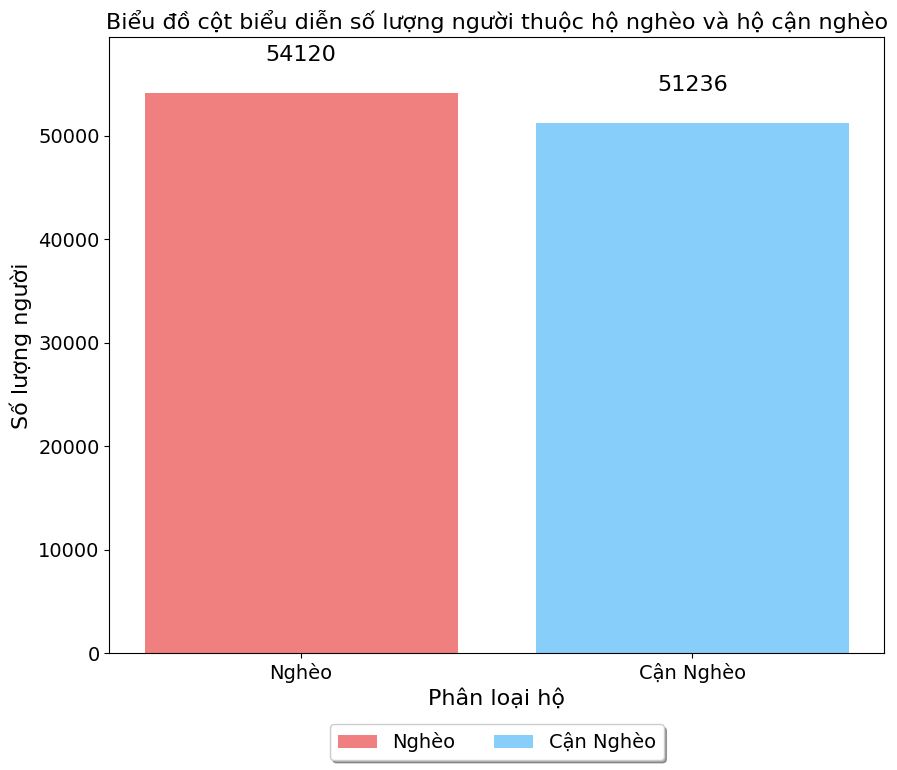

In [21]:
import matplotlib.pyplot as plt

# Tính số lượng người thuộc hộ nghèo và hộ cận nghèo
so_luong_ho = df_tong_hop.groupby('PHAN_LOAI_HO').size().reset_index(name='SoLuongHo')

# Lấy số lượng người thuộc hộ nghèo và hộ cận nghèo
so_luong_nguoi_ngheo = so_luong_ho[so_luong_ho['PHAN_LOAI_HO'] == 1]['SoLuongHo'].values[0]
so_luong_nguoi_can_ngheo = so_luong_ho[so_luong_ho['PHAN_LOAI_HO'] == 2]['SoLuongHo'].values[0]

# Chuẩn bị dữ liệu cho biểu đồ cột
phan_loai_ho = ['Nghèo', 'Cận Nghèo']
so_luong_nguoi = [so_luong_nguoi_ngheo, so_luong_nguoi_can_ngheo]
colors = ['lightcoral', 'lightskyblue']

# Vẽ biểu đồ cột
fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.bar(phan_loai_ho, so_luong_nguoi, color=colors)

# Đánh số liệu trực tiếp lên từng cột
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.05 * max(so_luong_nguoi), int(yval), ha='center', va='bottom', fontsize=16)

ax.set_xlabel('Phân loại hộ', fontsize=16)
ax.set_ylabel('Số lượng người', fontsize=16)  # Tăng kích thước nhãn trục y
ax.set_title('Biểu đồ cột biểu diễn số lượng người thuộc hộ nghèo và hộ cận nghèo', fontsize=16)

# Để tránh tràn số liệu, giới hạn trục y tối ưu hơn
ax.set_ylim(0, max(so_luong_nguoi) * 1.1)  

# Tăng kích thước nhãn trục y
ax.tick_params(axis='y', labelsize=14)

# Tăng kích thước nhãn trục y
ax.tick_params(axis='x', labelsize=14)
# Tạo legend và đặt nó ở dưới
legend_labels = ['Nghèo', 'Cận Nghèo']
ax.legend(bars, legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, fancybox=True, ncol=2, fontsize=14)

# Hiển thị biểu đồ
plt.show()


> Tỉ lệ số người thuộc hộ nghèo và cận nghèo

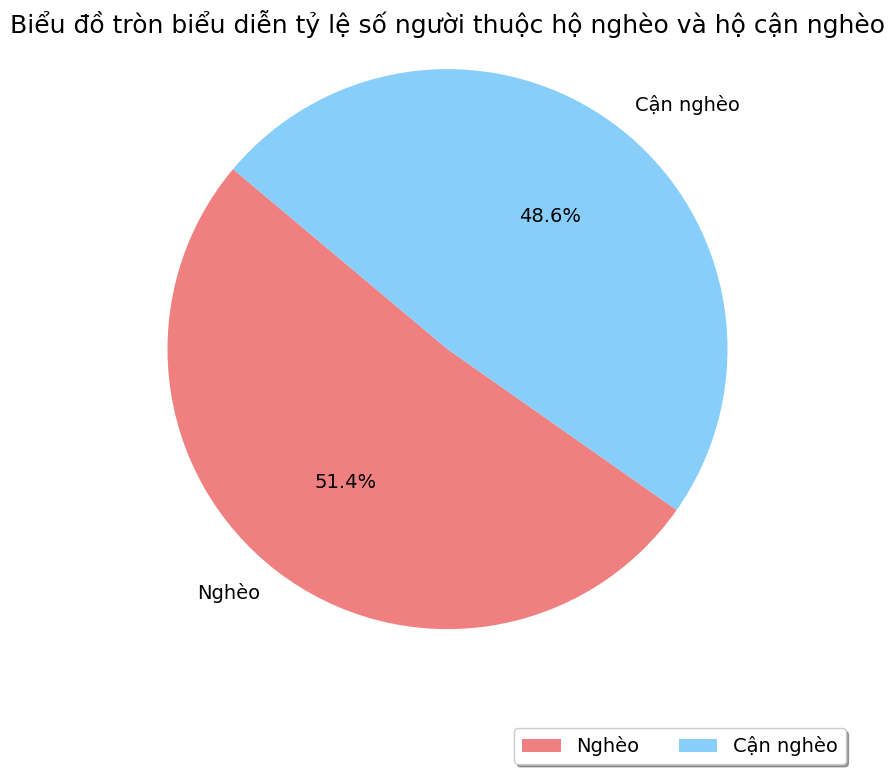

In [22]:
import matplotlib.pyplot as plt

# Tính số lượng người thuộc hộ nghèo và hộ cận nghèo
so_luong_ho = df_tong_hop.groupby('PHAN_LOAI_HO').size().reset_index(name='SoLuongHo')

# Lấy số lượng người thuộc hộ nghèo và hộ cận nghèo
so_luong_nguoi_ngheo = so_luong_ho[so_luong_ho['PHAN_LOAI_HO'] == 1]['SoLuongHo'].values[0]
so_luong_nguoi_can_ngheo = so_luong_ho[so_luong_ho['PHAN_LOAI_HO'] == 2]['SoLuongHo'].values[0]

# Chuẩn bị dữ liệu cho biểu đồ tròn
phan_loai_ho = ['Nghèo', 'Cận nghèo']
so_luong_nguoi = [so_luong_nguoi_ngheo, so_luong_nguoi_can_ngheo]
colors = ['lightcoral', 'lightskyblue']

# Vẽ biểu đồ tròn
plt.figure(figsize=(10, 8))
plt.pie(so_luong_nguoi, labels=phan_loai_ho, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14})

# Thêm tiêu đề và đảm bảo biểu đồ là hình tròn
plt.title('Biểu đồ tròn biểu diễn tỷ lệ số người thuộc hộ nghèo và hộ cận nghèo', fontsize=18)
plt.axis('equal')

# Thêm legend cho biểu đồ và đặt nó ở dưới
plt.legend(loc='upper center', bbox_to_anchor=(0.8, -0.1), labels=phan_loai_ho, shadow=True, fancybox=True, ncol=2,fontsize=14)

# Hiển thị biểu đồ
plt.show()


> Top 5 huyện có số lượng người thuộc hộ nghèo nhiều nhất

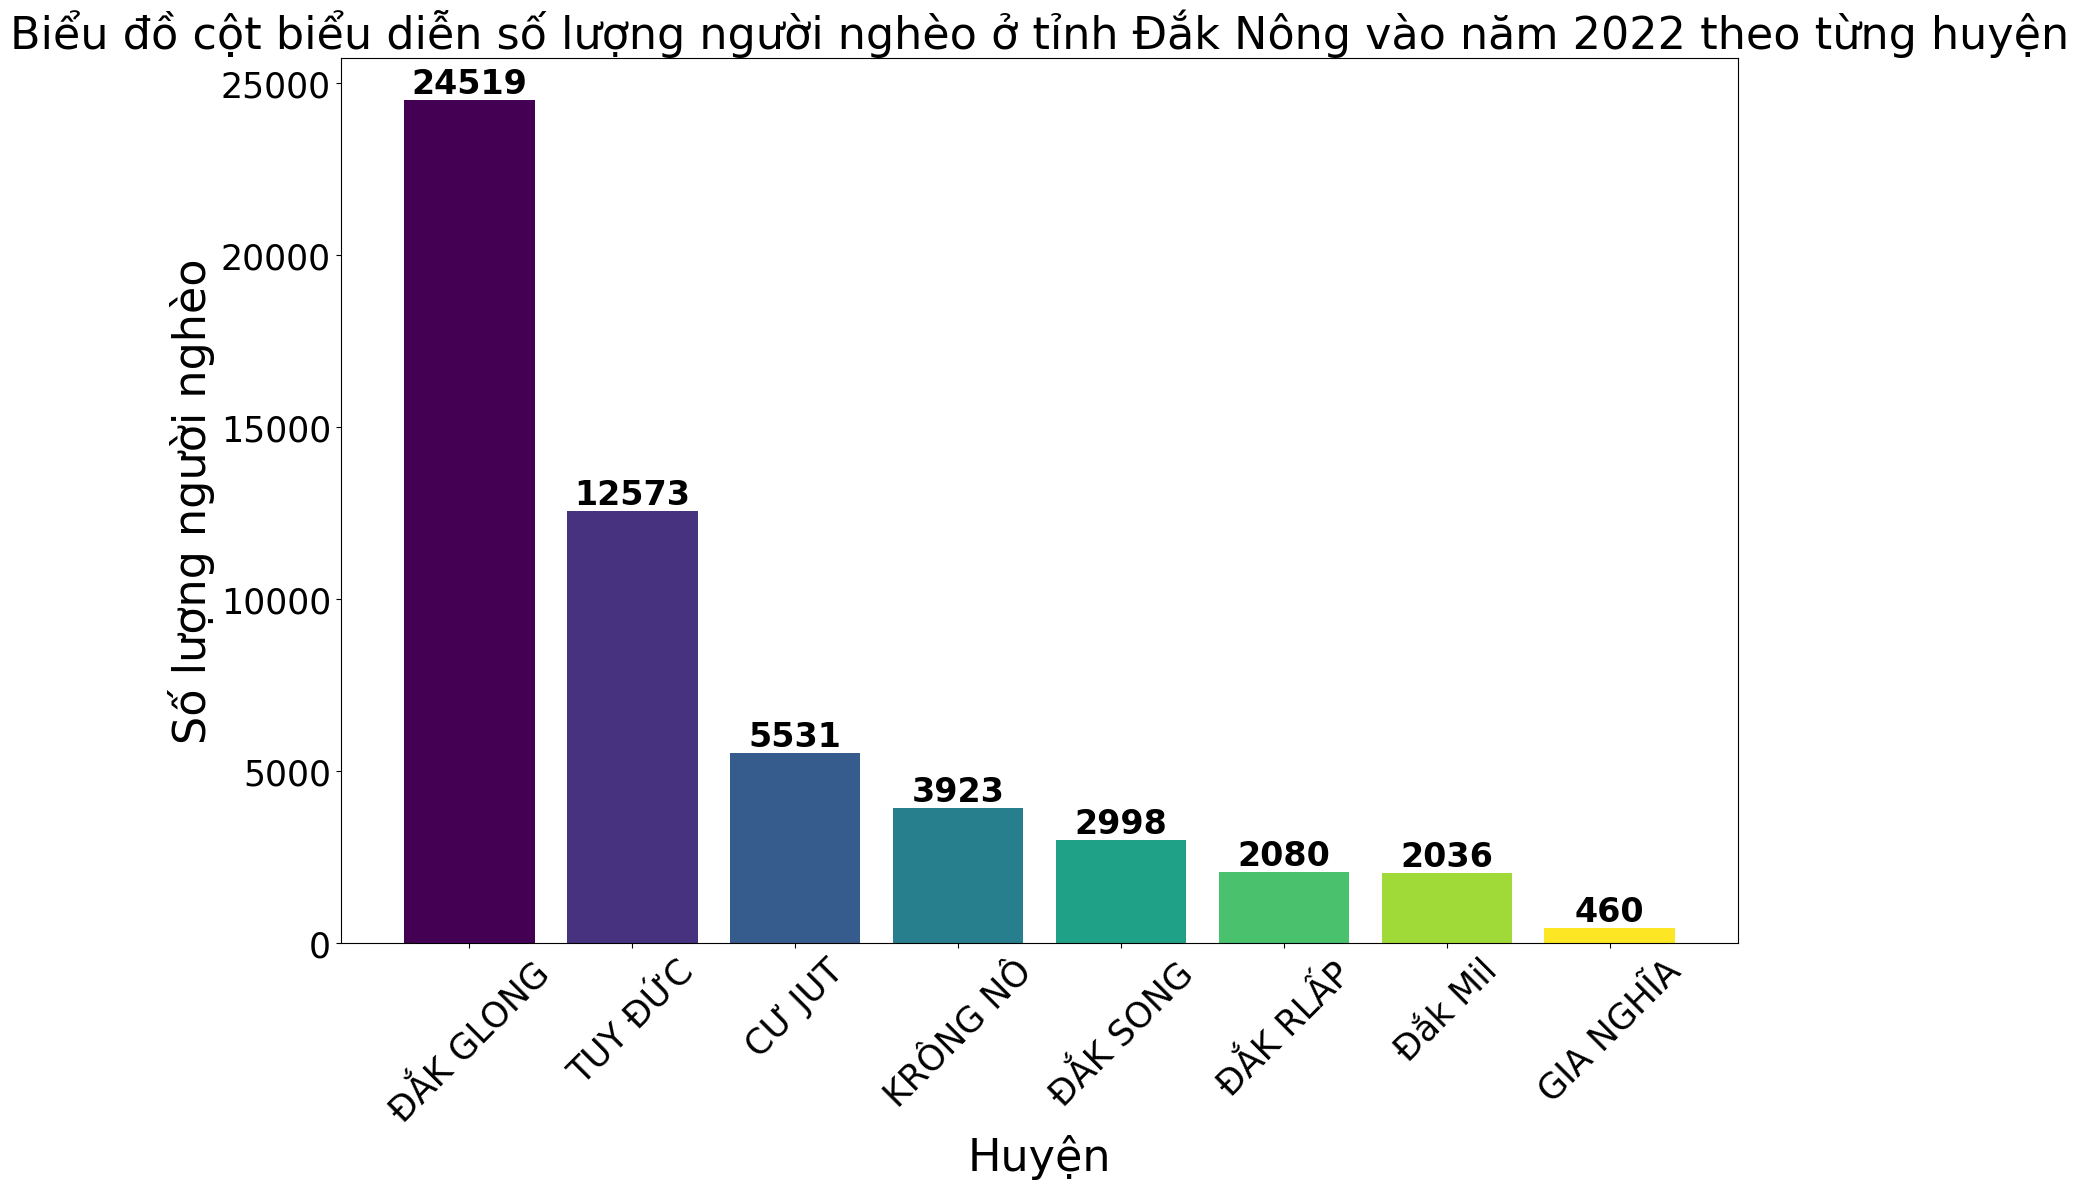

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Nhóm dữ liệu theo huyện và đếm số lượng người nghèo
so_luong_nguoi_ngheo = df_tong_hop[df_tong_hop['PHAN_LOAI_HO'] == 1].groupby('HUYEN').size().reset_index(name='SoLuongNguoiNgheo')

# Sắp xếp theo số lượng người nghèo giảm dần
so_luong_nguoi_ngheo = so_luong_nguoi_ngheo.sort_values(by='SoLuongNguoiNgheo', ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(16, 12))
bars = plt.bar(so_luong_nguoi_ngheo['HUYEN'], so_luong_nguoi_ngheo['SoLuongNguoiNgheo'], 
               color=plt.cm.viridis(np.linspace(0, 1, len(so_luong_nguoi_ngheo))))

# Thêm số liệu trên đỉnh mỗi cột với kích thước phông hợp lý
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval), 
             ha='center', va='bottom', fontsize=24, fontweight='bold')

plt.xlabel('Huyện', fontsize=32)
plt.ylabel('Số lượng người nghèo', fontsize=32)
plt.title('Biểu đồ cột biểu diễn số lượng người nghèo ở tỉnh Đắk Nông vào năm 2022 theo từng huyện', fontsize=32)

# Xoay nhãn trục x để tránh chồng lấn
plt.xticks(rotation=45, fontsize=25)  # Tăng kích thước nhãn trục x
plt.yticks(fontsize=25)  # Tăng kích thước nhãn trục y

# Điều chỉnh lại layout để biểu đồ không bị tràn
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


> Top 5 huyện có số lượng người thuộc hộ cận nghèo nhiều nhất

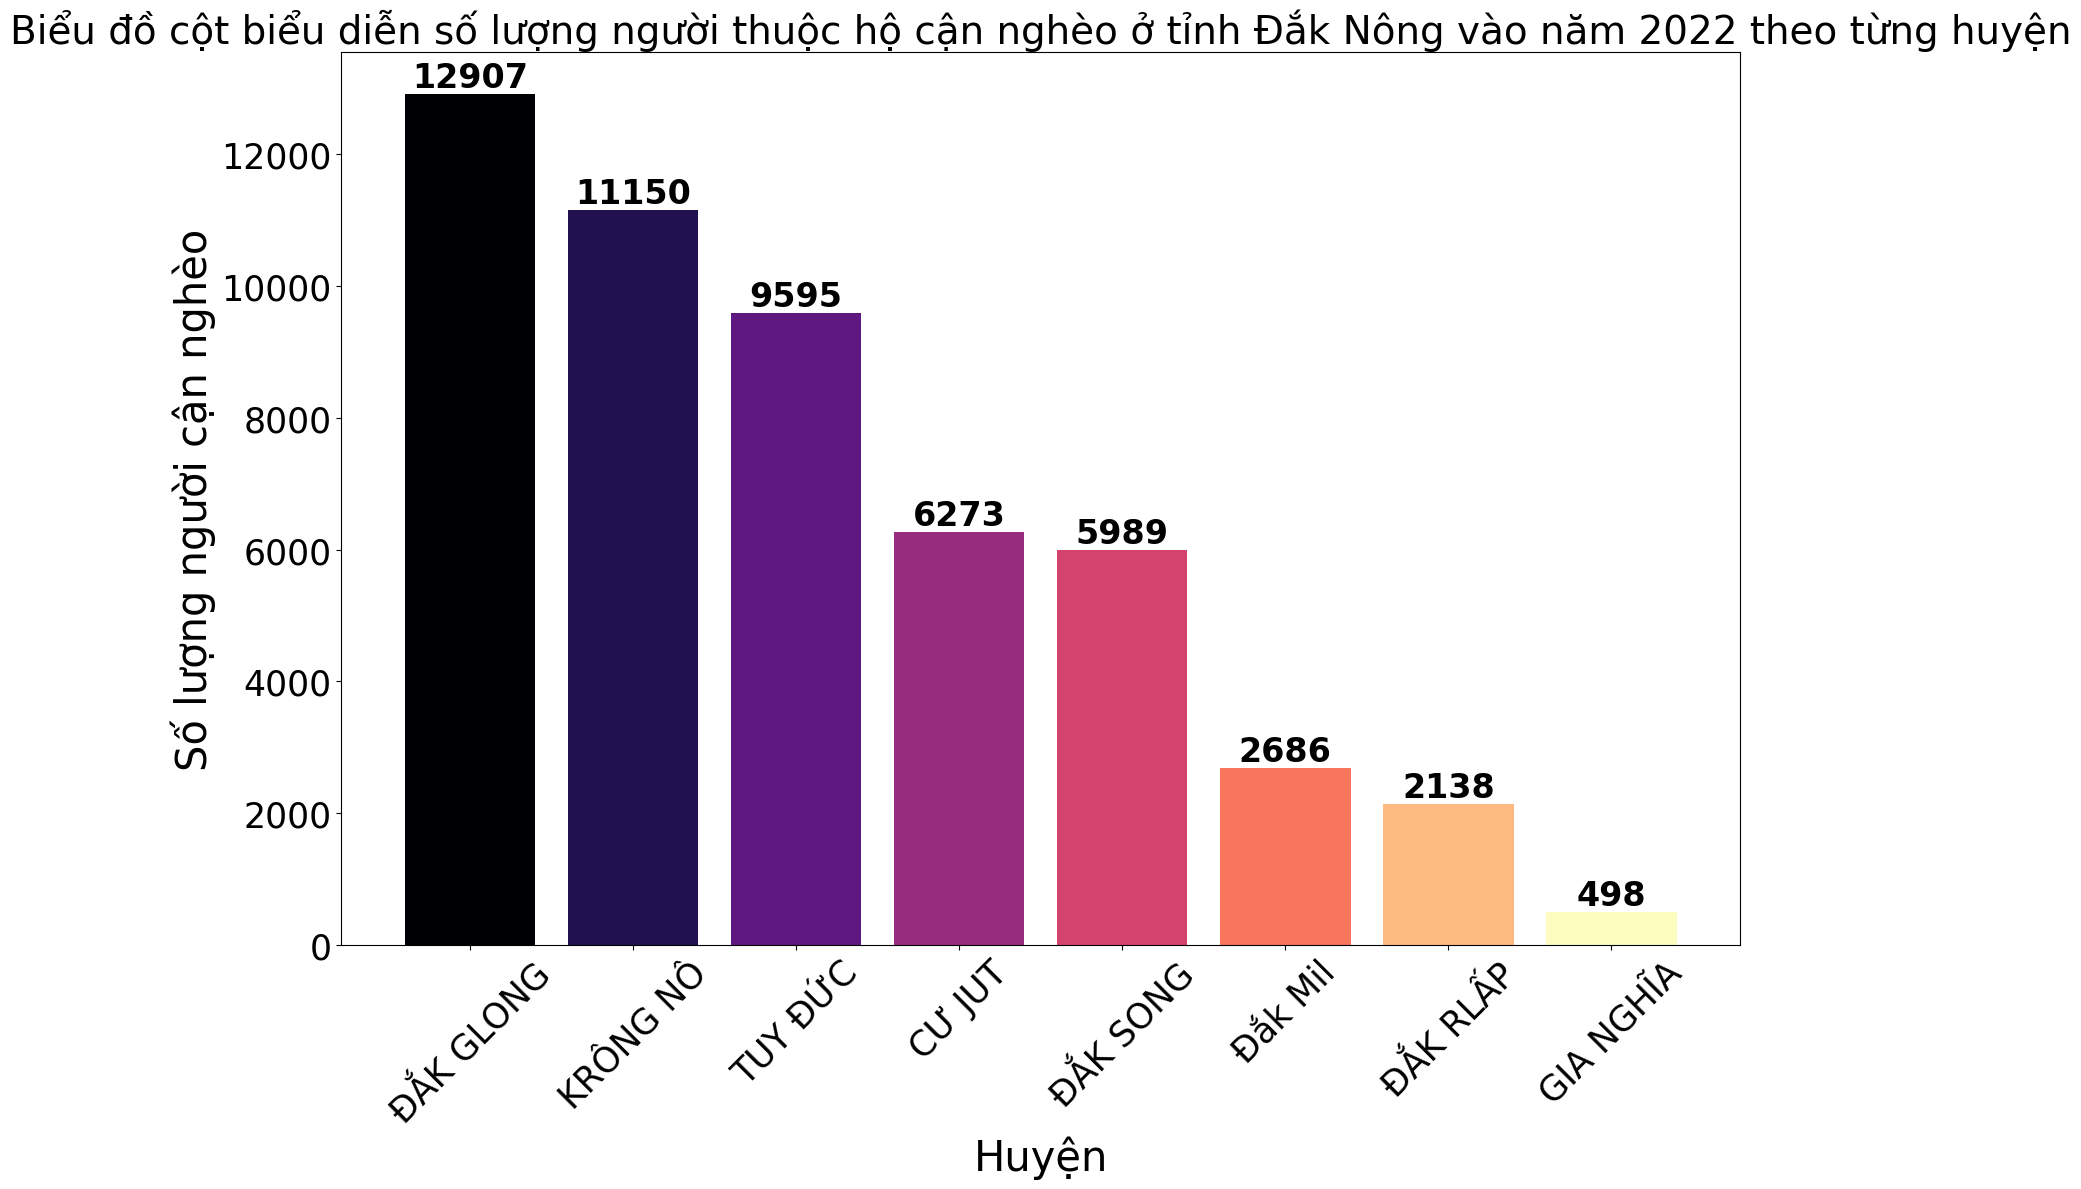

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Nhóm dữ liệu theo huyện và đếm số lượng người cận nghèo
so_luong_nguoi_can_ngheo = df_tong_hop[df_tong_hop['PHAN_LOAI_HO'] == 2].groupby('HUYEN').size().reset_index(name='SoLuongNguoiCanNgheo')

# Sắp xếp theo số lượng người cận nghèo giảm dần
so_luong_nguoi_can_ngheo = so_luong_nguoi_can_ngheo.sort_values(by='SoLuongNguoiCanNgheo', ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(16, 12))
bars = plt.bar(so_luong_nguoi_can_ngheo['HUYEN'], so_luong_nguoi_can_ngheo['SoLuongNguoiCanNgheo'], 
               color=plt.cm.magma(np.linspace(0, 1, len(so_luong_nguoi_can_ngheo))))

# Thêm số liệu trên đỉnh mỗi cột với kích thước phông hợp lý
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval), 
             ha='center', va='bottom', fontsize=24, fontweight='bold')

plt.xlabel('Huyện', fontsize=30)
plt.ylabel('Số lượng người cận nghèo', fontsize=30)
plt.title('Biểu đồ cột biểu diễn số lượng người thuộc hộ cận nghèo ở tỉnh Đắk Nông vào năm 2022 theo từng huyện', fontsize=28)

# Xoay nhãn trục x để tránh chồng lấn
plt.xticks(rotation=45, fontsize=25)
plt.yticks(fontsize=25)  # Tăng kích thước nhãn trục y

# Điều chỉnh lại layout để biểu đồ không bị tràn
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


In [25]:
df_tong_hop.columns

Index(['STT_HO', 'HO_TEN_CHU_HO', 'HO_TEN_THANH_VIEN', 'QUANHE_CHUHO',
       'NGAY_SINH', 'GIOI_TINH', 'SO_CCCD', 'TINH', 'HUYEN', 'XA', 'DANTOC',
       'PHAN_LOAI_HO', 'TUOI'],
      dtype='object')

> Chuyển đổi thành ma trận tương quan

In [26]:
df_tuongquan=df_tong_hop[['HUYEN', 'XA',
       'PHAN_LOAI_HO', 'TUOI','QUANHE_CHUHO','GIOI_TINH']]
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Sử dụng .loc[] để cập nhật cột mà không gây cảnh báo
df_tuongquan.loc[:, 'HUYEN'] = label_encoder.fit_transform(df_tuongquan['HUYEN'])
df_tuongquan.loc[:, 'XA'] = label_encoder.fit_transform(df_tuongquan['XA'])

In [27]:
correlation_matrix = df_tuongquan.corr()

# In ma trận tương quan
print(correlation_matrix)

                 HUYEN        XA  PHAN_LOAI_HO      TUOI  QUANHE_CHUHO  \
HUYEN         1.000000  0.347701     -0.045548 -0.036710     -0.041559   
XA            0.347701  1.000000     -0.070602 -0.038380     -0.006191   
PHAN_LOAI_HO -0.045548 -0.070602      1.000000  0.043828     -0.088226   
TUOI         -0.036710 -0.038380      0.043828  1.000000     -0.379268   
QUANHE_CHUHO -0.041559 -0.006191     -0.088226 -0.379268      1.000000   
GIOI_TINH    -0.000139 -0.019980      0.007706  0.050183      0.043427   

              GIOI_TINH  
HUYEN         -0.000139  
XA            -0.019980  
PHAN_LOAI_HO   0.007706  
TUOI           0.050183  
QUANHE_CHUHO   0.043427  
GIOI_TINH      1.000000  


> Biểu diễn trực quan

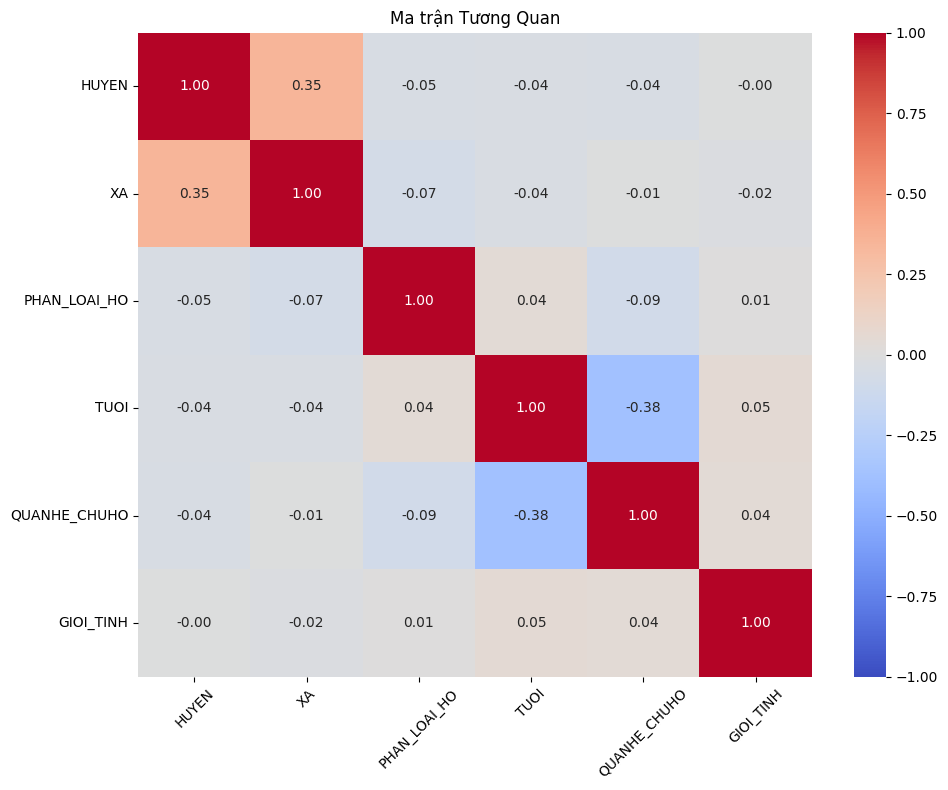

In [28]:

# Tạo biểu đồ nhiệt để trực quan hóa ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)

# Thêm tiêu đề và điều chỉnh trục
plt.title('Ma trận Tương Quan')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

### 2.2. Phân tích suy luận

#### 2.2.1. Huyện Đắk Glong

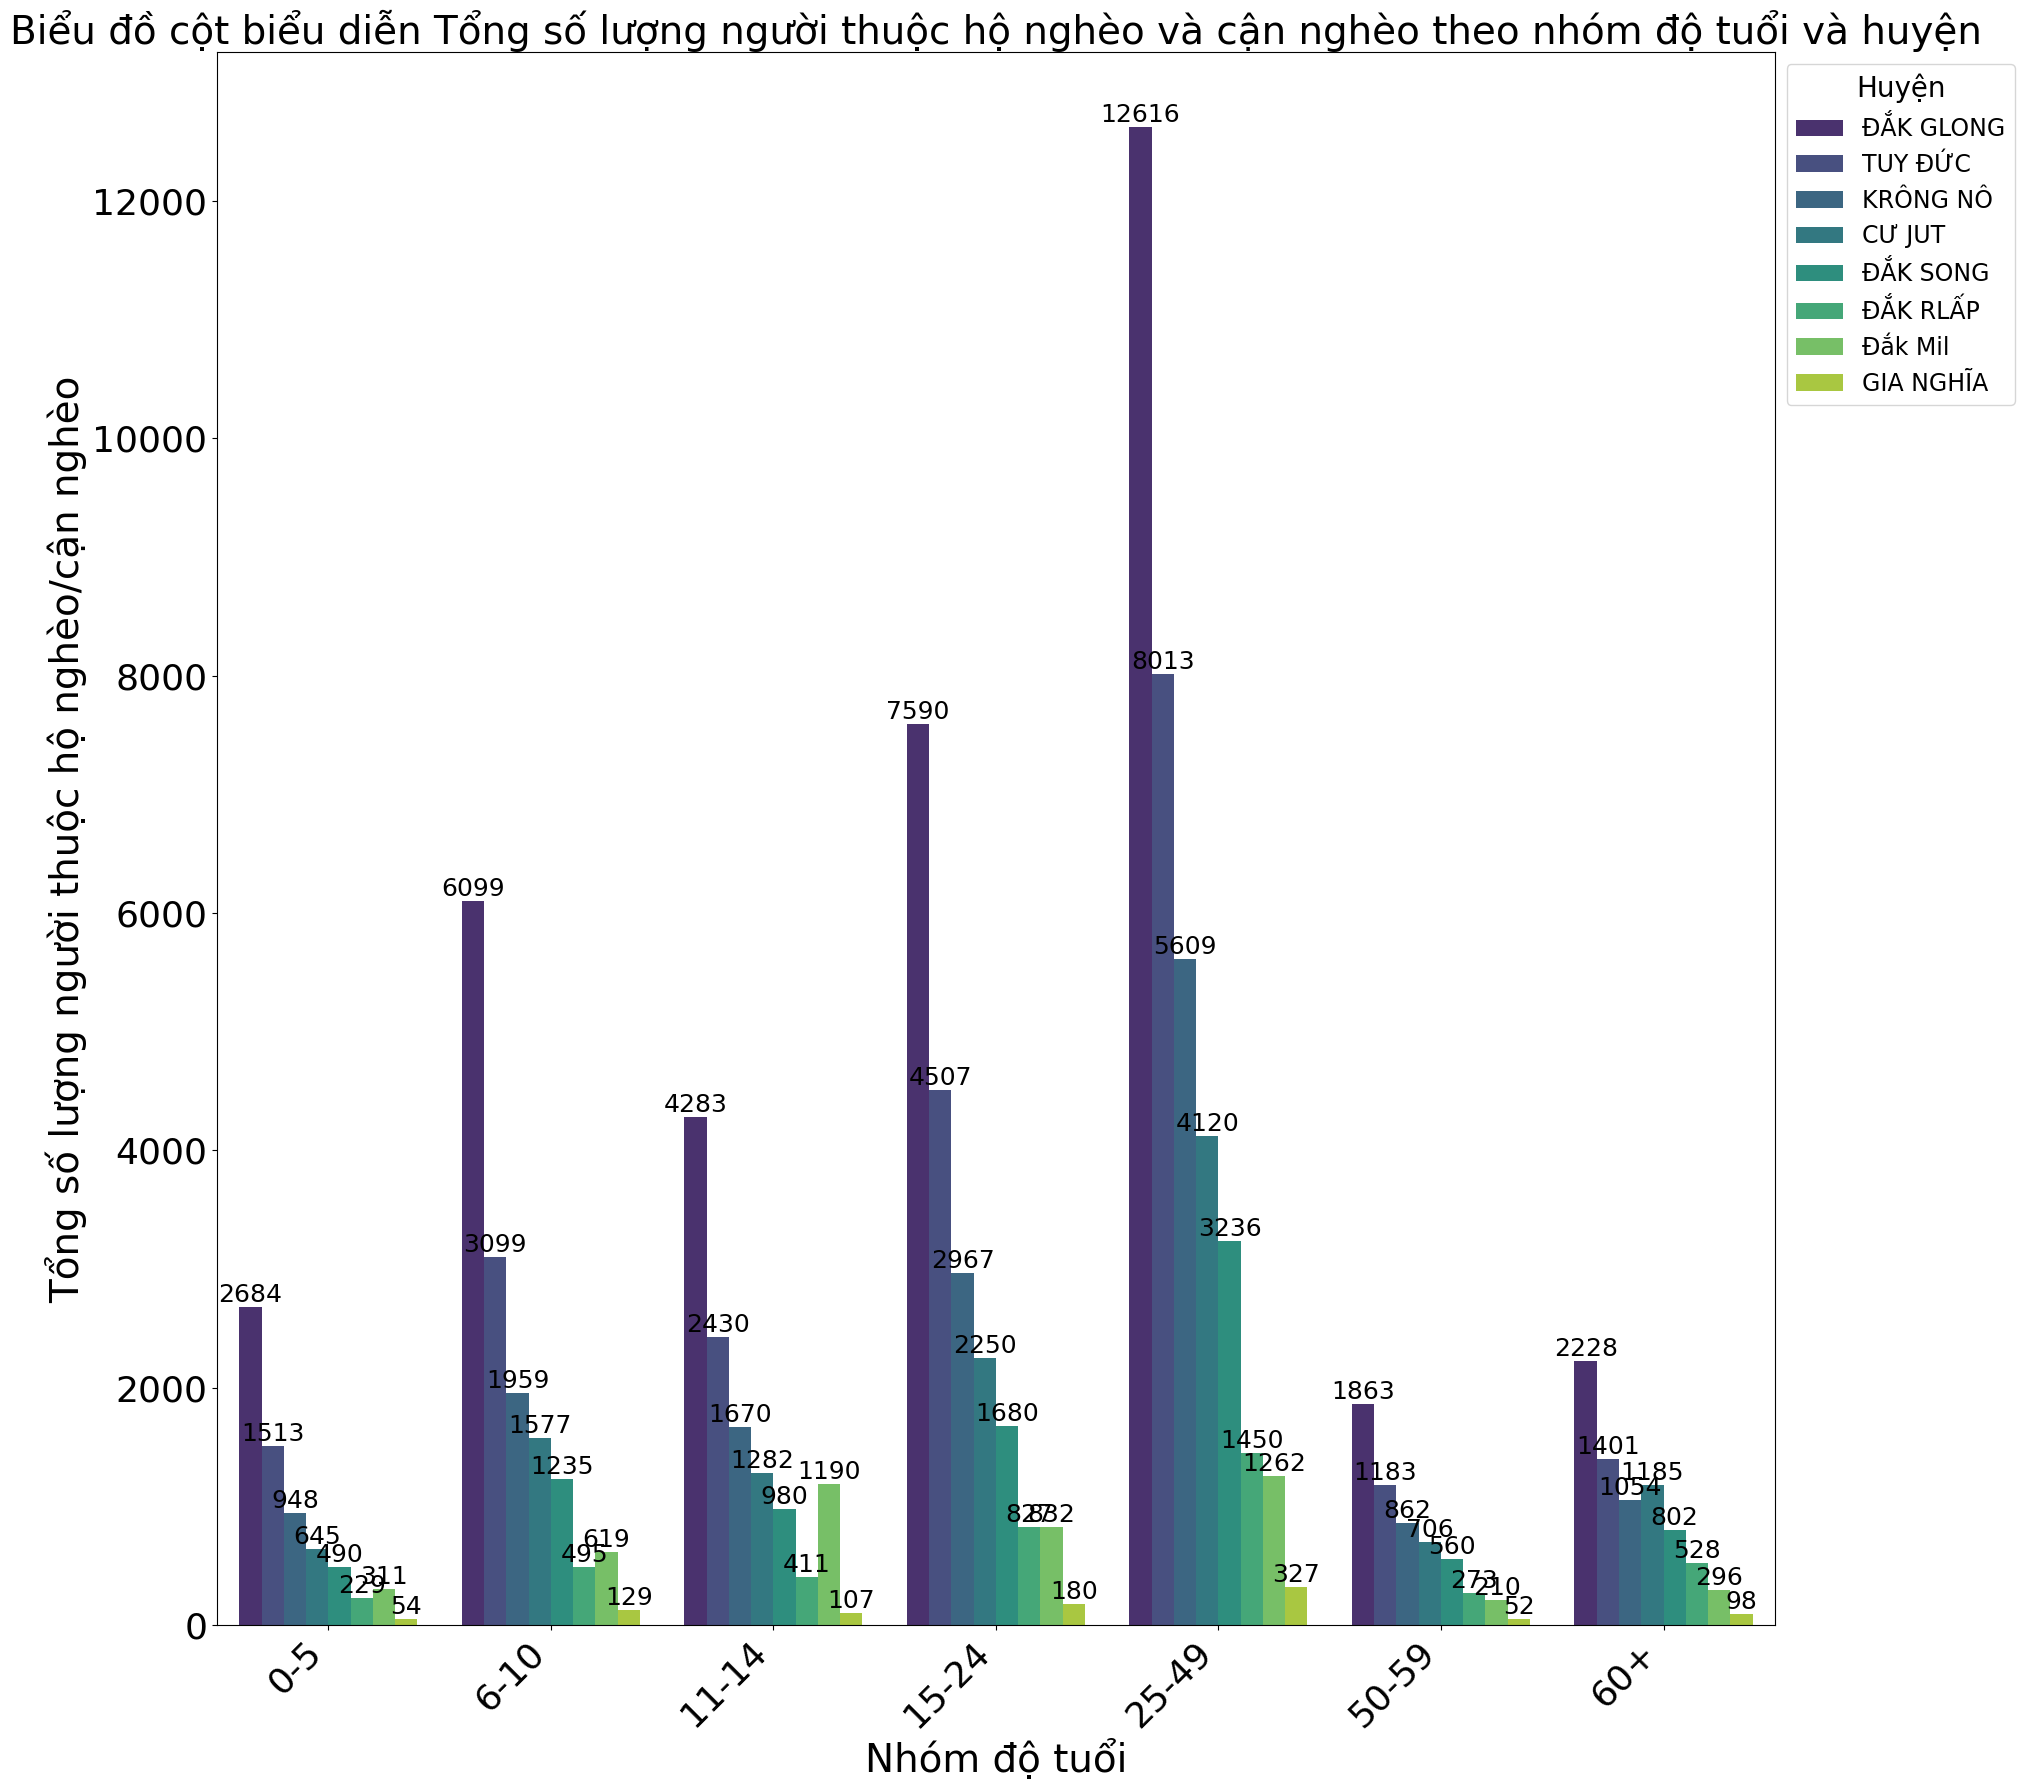

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Định nghĩa các khoảng độ tuổi chi tiết hơn
bins = [0, 5, 10, 14, 24, 49, 59, 100]
labels = ['0-5', '6-10', '11-14', '15-24', '25-49', '50-59', '60+']

# Thêm cột 'Group' cho các khoảng độ tuổi chi tiết
df_tong_hop['Group'] = pd.cut(df_tong_hop['TUOI'], bins=bins, labels=labels, right=True)

# Tính số lượng người nghèo/cận nghèo theo nhóm độ tuổi và huyện
age_group_distribution_by_district = df_tong_hop.groupby(['HUYEN', 'Group']).size().reset_index(name='So_luong')

# Sắp xếp giảm dần theo số lượng người thuộc hộ nghèo/cận nghèo
age_group_distribution_by_district = age_group_distribution_by_district.sort_values(by='So_luong', ascending=False).reset_index(drop=True)

# Vẽ biểu đồ phân phối tổng số lượng người nghèo và cận nghèo theo nhóm độ tuổi cho từng huyện trên một biểu đồ duy nhất
plt.figure(figsize=(20, 18))  # Tăng kích thước của figure để có thêm không gian
sns.barplot(x='Group', y='So_luong', hue='HUYEN', data=age_group_distribution_by_district, palette='viridis')

# Đặt tiêu đề và nhãn trục
plt.title('Biểu đồ cột biểu diễn Tổng số lượng người thuộc hộ nghèo và cận nghèo theo nhóm độ tuổi và huyện', fontsize=28)
plt.xlabel('Nhóm độ tuổi', fontsize=28)
plt.ylabel('Tổng số lượng người thuộc hộ nghèo/cận nghèo', fontsize=28)

# Hiển thị giá trị trên mỗi cột với kích thước chữ lớn hơn
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', label_type='edge', fontsize=18)

# Điều chỉnh góc xoay của các nhãn trục x
plt.xticks(rotation=45, ha="right", fontsize=26)

# Tinh chỉnh legend (chú thích)
plt.legend(title='Huyện', title_fontsize='20', fontsize='17', loc='upper left', bbox_to_anchor=(1, 1))

plt.yticks(fontsize=26)  # Tăng kích thước phông chữ của nhãn trục y

# Căn chỉnh bố cục
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


In [30]:
bins = [0, 14, 59, 100]
labels = ['0-14', '15-59', '60+']

# Thêm cột 'Group' cho các khoảng độ tuổi mới
df_tong_hop['Group'] = pd.cut(df_tong_hop['TUOI'], bins=bins, labels=labels, right=True)

# Tính số lượng người nghèo/cận nghèo theo nhóm độ tuổi và từng huyện
age_group_distribution_by_district = df_tong_hop.groupby(['HUYEN', 'Group']).size().reset_index(name='So_luong')

# Sắp xếp theo thứ tự số lượng từ lớn đến bé
age_group_distribution_by_district_sorted = age_group_distribution_by_district.sort_values(by='So_luong', ascending=False).reset_index(drop=True)

# In tổng số lượng hộ nghèo và cận nghèo sau khi sắp xếp
print("Tổng số lượng hộ nghèo và cận nghèo sau khi sắp xếp theo số lượng từ lớn đến bé:")
print(age_group_distribution_by_district_sorted)


Tổng số lượng hộ nghèo và cận nghèo sau khi sắp xếp theo số lượng từ lớn đến bé:
        HUYEN  Group  So_luong
0   ĐẮK GLONG  15-59     22069
1     TUY ĐỨC  15-59     13703
2   ĐẮK GLONG   0-14     13066
3    KRÔNG NÔ  15-59      9438
4      CƯ JUT  15-59      7076
5     TUY ĐỨC   0-14      7042
6    ĐẮK SONG  15-59      5476
7    KRÔNG NÔ   0-14      4577
8      CƯ JUT   0-14      3504
9    ĐẮK SONG   0-14      2705
10   ĐẮK RLẤP  15-59      2550
11    Đắk Mil  15-59      2304
12  ĐẮK GLONG    60+      2228
13    Đắk Mil   0-14      2120
14    TUY ĐỨC    60+      1401
15     CƯ JUT    60+      1185
16   ĐẮK RLẤP   0-14      1135
17   KRÔNG NÔ    60+      1054
18   ĐẮK SONG    60+       802
19  GIA NGHĨA  15-59       559
20   ĐẮK RLẤP    60+       528
21    Đắk Mil    60+       296
22  GIA NGHĨA   0-14       290
23  GIA NGHĨA    60+        98


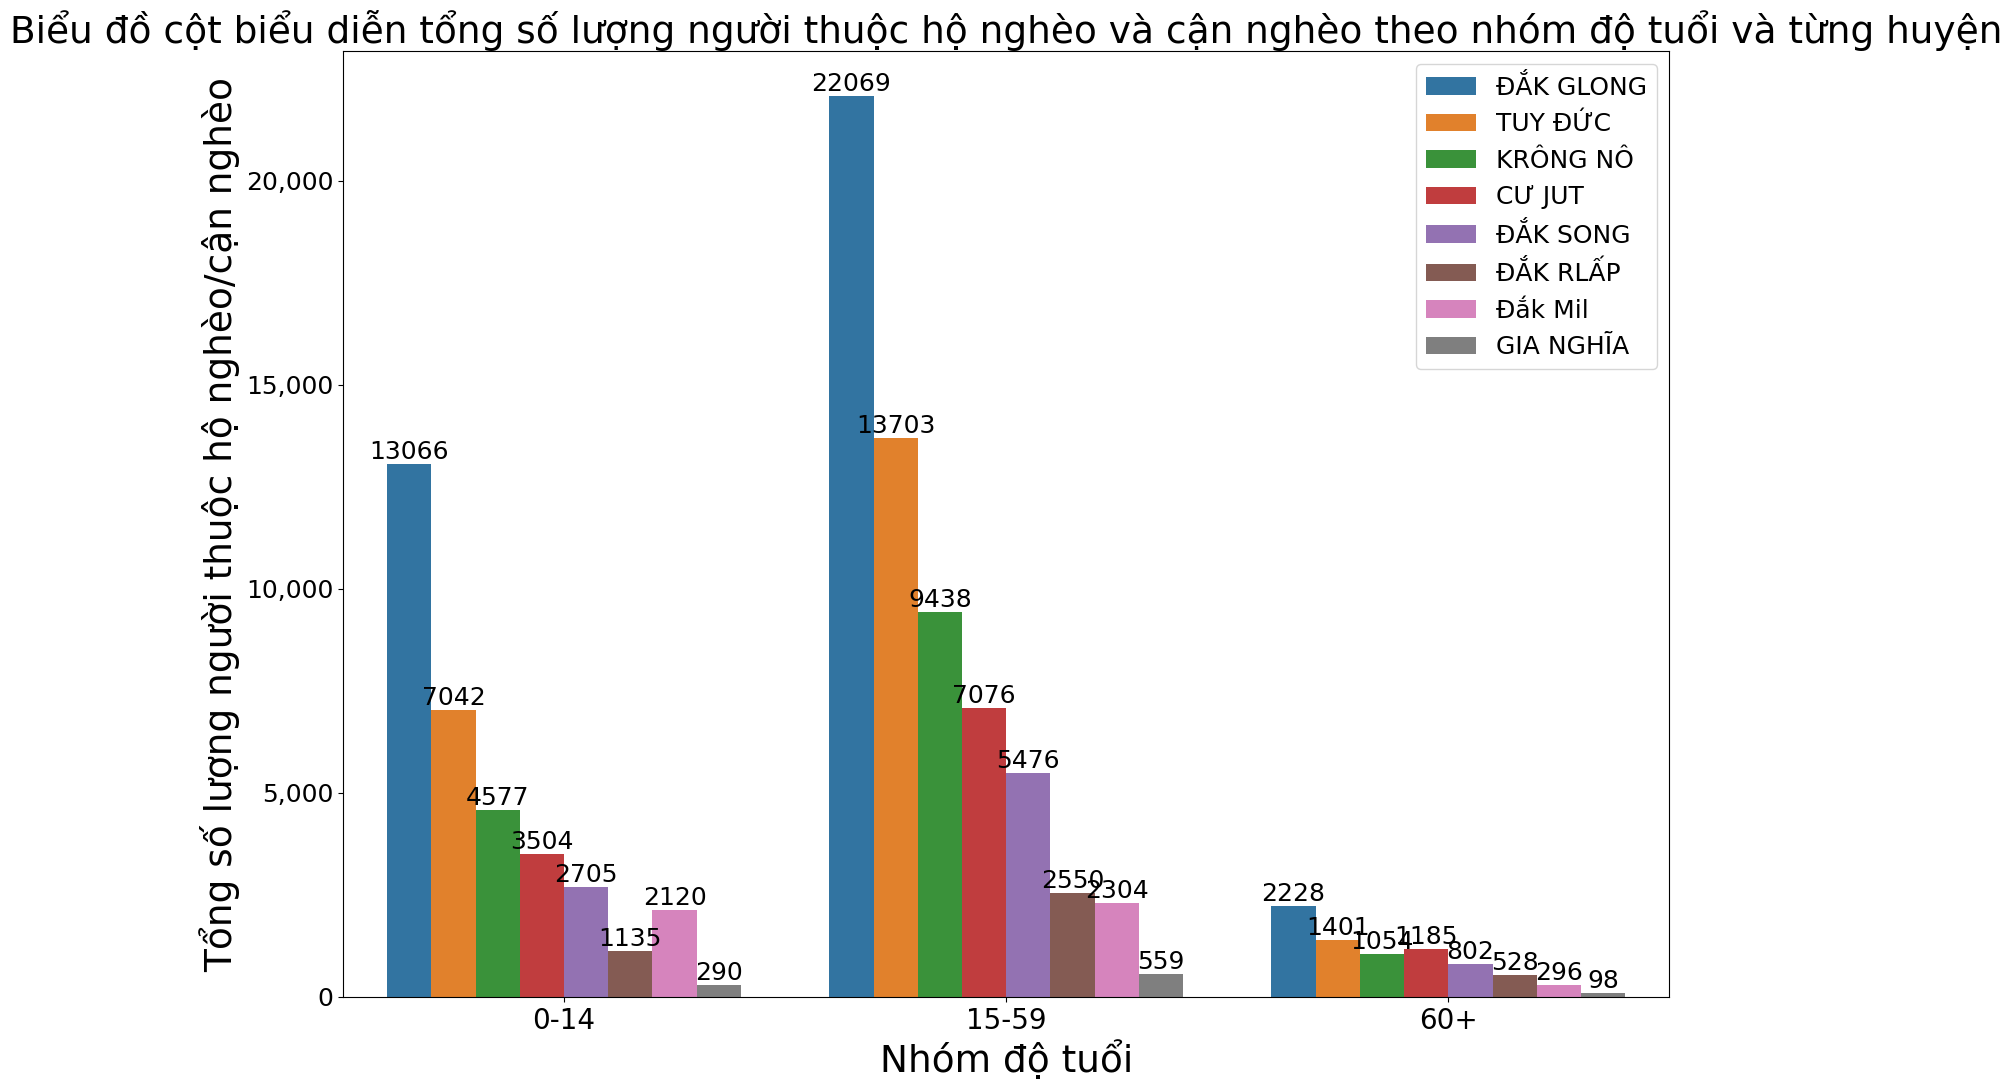

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo figure và axes
fig, ax = plt.subplots(figsize=(15, 11))

# Vẽ barplot với Seaborn (sử dụng dữ liệu đã được sắp xếp)
sns.barplot(x='Group', y='So_luong', hue='HUYEN', data=age_group_distribution_by_district_sorted, ax=ax)

# Đặt tiêu đề và nhãn trục với kích thước phông chữ lớn hơn
ax.set_title('Biểu đồ cột biểu diễn tổng số lượng người thuộc hộ nghèo và cận nghèo theo nhóm độ tuổi và từng huyện', fontsize=27)
ax.set_xlabel('Nhóm độ tuổi', fontsize=27)
ax.set_ylabel('Tổng số lượng người thuộc hộ nghèo/cận nghèo', fontsize=27)

# Hiển thị giá trị trên mỗi cột với kích thước phông chữ lớn hơn
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=18)  # Tăng kích thước phông chữ

# Điều chỉnh góc xoay của các nhãn trục x
plt.xticks(rotation=0, fontsize=20)  # Tăng kích thước phông chữ của nhãn trục x

# Thêm dấu phẩy để phân cách hàng nghìn
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Tăng kích thước phông chữ của nhãn trục y
ax.tick_params(axis='y', labelsize=18)

# Căn chỉnh bố cục
plt.tight_layout()

# Điều chỉnh kích thước của legend
ax.legend(fontsize=18)  # Thay đổi kích thước của legend thành 'x-large'

# Hiển thị biểu đồ
plt.show()


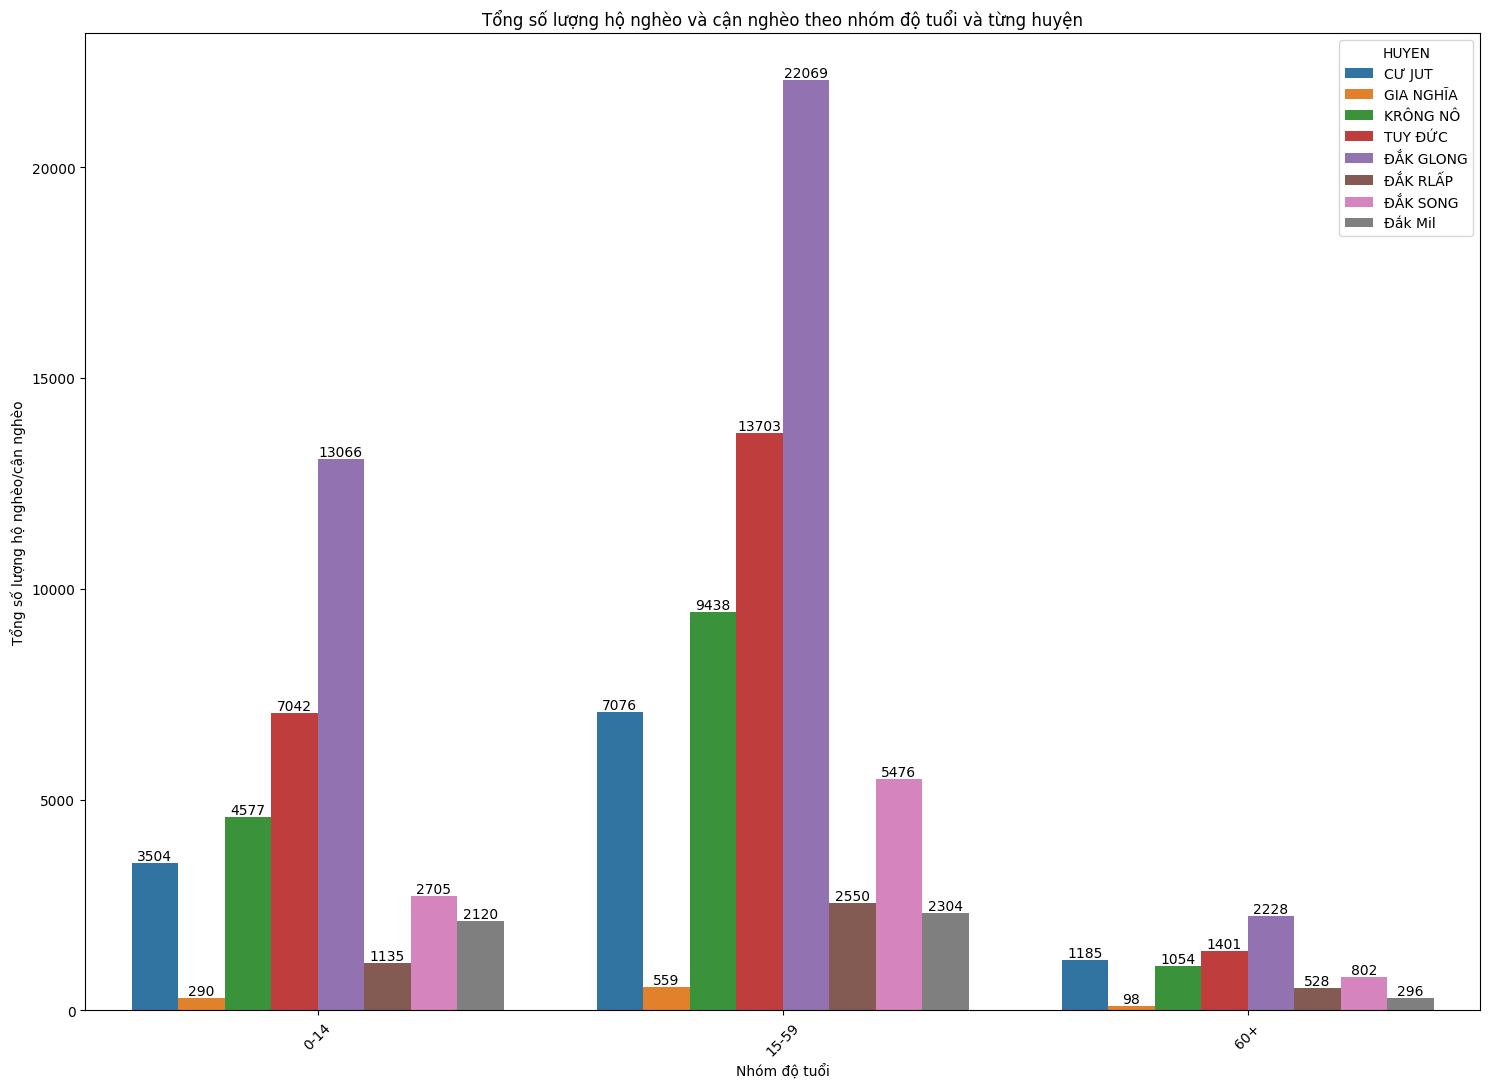

In [32]:

# Vẽ biểu đồ phân phối tổng số lượng hộ nghèo và cận nghèo theo nhóm độ tuổi cho từng huyện
fig, ax = plt.subplots(figsize=(15, 11))
sns.barplot(x='Group', y='So_luong', hue='HUYEN', data=age_group_distribution_by_district, ax=ax)

# Đặt tiêu đề và nhãn trục
ax.set_title('Tổng số lượng hộ nghèo và cận nghèo theo nhóm độ tuổi và từng huyện')
ax.set_xlabel('Nhóm độ tuổi')
ax.set_ylabel('Tổng số lượng hộ nghèo/cận nghèo')

# Hiển thị giá trị trên mỗi cột
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
# Lọc dữ liệu chỉ bao gồm những người thuộc hộ nghèo/cận nghèo
df_ngheo_canngheo = df_huyen_dak_glong[df_huyen_dak_glong['PHAN_LOAI_HO'].isin([1, 2])]

# Tính số lượng người thuộc hộ nghèo và cận nghèo từng xã
so_nguoi_ngheo = df_ngheo_canngheo[df_ngheo_canngheo['PHAN_LOAI_HO'] == 1].groupby('XA').size().reset_index(name='So_luong_ngheo')
so_nguoi_canngheo = df_ngheo_canngheo[df_ngheo_canngheo['PHAN_LOAI_HO'] == 2].groupby('XA').size().reset_index(name='So_luong_can_ngheo')

# Tính độ tuổi trung bình của từng xã
do_tuoi_trung_binh = df_huyen_dak_glong.groupby('XA')['TUOI'].mean().reset_index(name='Tuoi_trung_binh')

# Kết hợp ba bảng dữ liệu lại
data_merged = pd.merge(so_nguoi_ngheo, so_nguoi_canngheo, on='XA', how='outer')
data_merged = pd.merge(data_merged, do_tuoi_trung_binh, on='XA', how='outer')

print("\nKết Quả:")
print(data_merged)


Kết Quả:
           XA  So_luong_ngheo  So_luong_can_ngheo  Tuoi_trung_binh
0   QUẢNG HÒA            4095                4095        23.538584
1   QUẢNG KHÊ             686                2960        30.284970
2   QUẢNG SƠN            4608                1279        26.815356
3      ĐẮK HA            3775                 906        26.509934
4    ĐẮK PLAO            1576                 569        26.202797
5  ĐẮK R'MĂNG            5124                1562        24.549806
6     ĐẮK SOM            4655                1536        24.839444


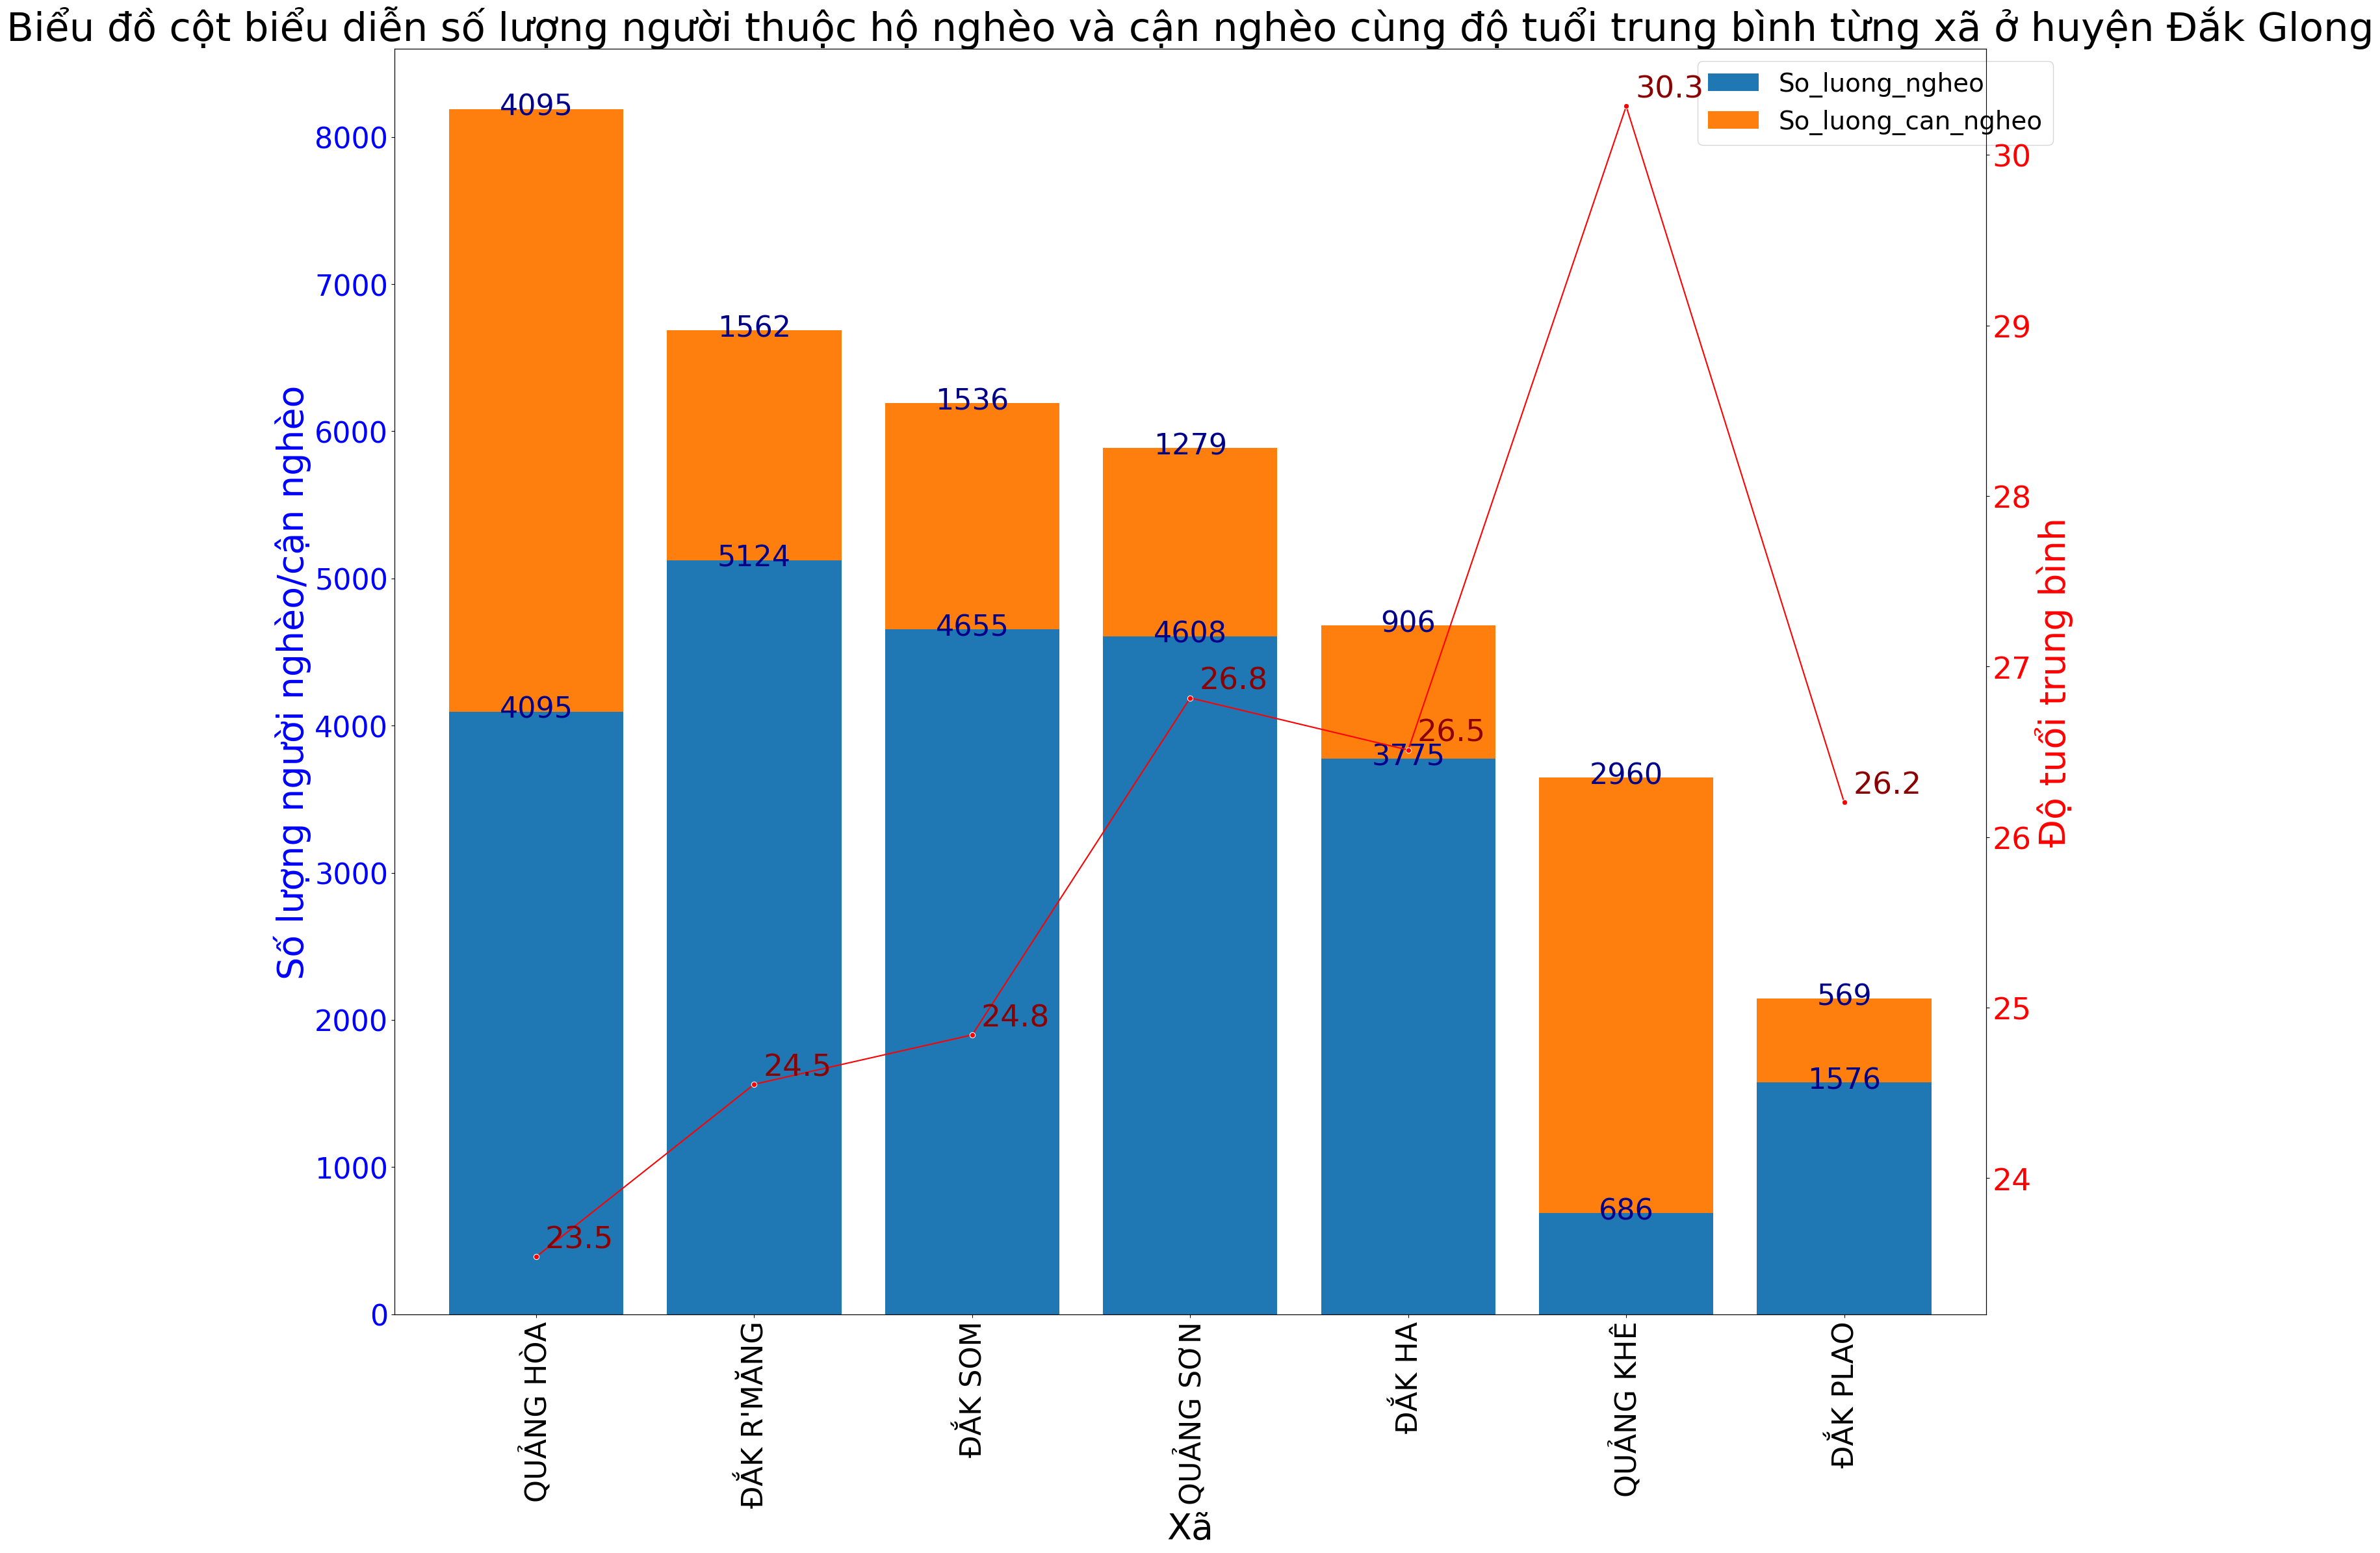

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lọc dữ liệu chỉ bao gồm những người thuộc hộ nghèo/cận nghèo
df_ngheo_canngheo = df_huyen_dak_glong[df_huyen_dak_glong['PHAN_LOAI_HO'].isin([1, 2])]

# Tính số lượng người thuộc hộ nghèo và cận nghèo từng xã
so_nguoi_ngheo = df_ngheo_canngheo[df_ngheo_canngheo['PHAN_LOAI_HO'] == 1].groupby('XA').size().reset_index(name='So_luong_ngheo')
so_nguoi_canngheo = df_ngheo_canngheo[df_ngheo_canngheo['PHAN_LOAI_HO'] == 2].groupby('XA').size().reset_index(name='So_luong_can_ngheo')

# Tính độ tuổi trung bình của từng xã
do_tuoi_trung_binh = df_huyen_dak_glong.groupby('XA')['TUOI'].mean().reset_index(name='Tuoi_trung_binh')

# Kết hợp ba bảng dữ liệu lại
data_merged = pd.merge(so_nguoi_ngheo, so_nguoi_canngheo, on='XA', how='outer')
data_merged = pd.merge(data_merged, do_tuoi_trung_binh, on='XA', how='outer')

# Tính tổng số lượng người nghèo và cận nghèo
data_merged['Tong_so_luong'] = data_merged['So_luong_ngheo'].fillna(0) + data_merged['So_luong_can_ngheo'].fillna(0)

# Sắp xếp giảm dần theo tổng số lượng người nghèo và cận nghèo
data_merged = data_merged.sort_values(by='Tong_so_luong', ascending=False)

# Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(28, 24))  # Tăng kích thước hình ảnh

# Biểu đồ cột cho số lượng người nghèo và cận nghèo
data_merged.set_index('XA')[['So_luong_ngheo', 'So_luong_can_ngheo']].plot(kind='bar', stacked=True, ax=ax1, color=['#1f77b4', '#ff7f0e'], width=0.8)
ax1.set_xlabel('Xã', fontsize=40)  # Tăng kích thước chữ
ax1.set_ylabel('Số lượng người nghèo/cận nghèo', fontsize=40, color='b')  # Tăng kích thước chữ
ax1.tick_params(axis='y', labelcolor='b', labelsize=32)  # Tăng kích thước chữ của nhãn trục y
ax1.tick_params(axis='x', labelsize=32)  # Tăng kích thước chữ của nhãn trục x

# Cập nhật kích thước chữ của legend và di chuyển legend sang phải
ax1.legend(prop={'size': 28}, bbox_to_anchor=(1.05, 1))  # Di chuyển legend sang phải một chút

# Hiển thị nhãn số lượng người nghèo và cận nghèo trên biểu đồ cột
for p in ax1.patches:
    height = p.get_height()
    if height > 0:
        ax1.annotate(format(height, '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_y() + height + 15),  # Tăng khoảng cách để số không bị đè lên nhau
                     ha='center', va='center',
                     xytext=(0, 0),
                     textcoords='offset points', fontsize=32, color='darkblue')  # Tăng kích thước chữ và đổi màu

# Tạo trục thứ hai để vẽ đường biểu diễn cho độ tuổi trung bình
ax2 = ax1.twinx()
sns.lineplot(x='XA', y='Tuoi_trung_binh', data=data_merged, ax=ax2, color='r', marker='o')
ax2.set_ylabel('Độ tuổi trung bình', fontsize=40, color='r')  # Tăng kích thước chữ
ax2.tick_params(axis='y', labelcolor='r', labelsize=34)  # Tăng kích thước chữ của nhãn trục y

# Hiển thị nhãn độ tuổi trung bình trên biểu đồ đường
for line in ax2.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax2.annotate(f'{y:.1f}', xy=(x, y), xytext=(10, 10), textcoords='offset points', color='darkred', fontsize=34)  # Tăng kích thước chữ và đổi màu

# Thêm tiêu đề và hiển thị biểu đồ
plt.title('Biểu đồ cột biểu diễn số lượng người thuộc hộ nghèo và cận nghèo cùng độ tuổi trung bình từng xã ở huyện Đắk Glong', fontsize=44)  # Tăng kích thước chữ tiêu đề
plt.xticks(rotation=45, fontsize=34)  # Tăng kích thước chữ nhãn trục x
plt.tight_layout()
plt.show()


> Tuy Đức


In [35]:

# Lọc dữ liệu chỉ bao gồm những người thuộc hộ nghèo/cận nghèo ở huyện Tuy Đức
df_ngheo_canngheo_tuy_duc = df_huyen_tuy_duc[df_huyen_tuy_duc['PHAN_LOAI_HO'].isin([1, 2])]

# Tính số lượng người thuộc hộ nghèo và cận nghèo từng xã
so_nguoi_ngheo_tuy_duc = df_ngheo_canngheo_tuy_duc[df_ngheo_canngheo_tuy_duc['PHAN_LOAI_HO'] == 1].groupby('XA').size().reset_index(name='So_luong_ngheo')
so_nguoi_canngheo_tuy_duc = df_ngheo_canngheo_tuy_duc[df_ngheo_canngheo_tuy_duc['PHAN_LOAI_HO'] == 2].groupby('XA').size().reset_index(name='So_luong_can_ngheo')

# Tính độ tuổi trung bình của từng xã ở huyện Tuy Đức
do_tuoi_trung_binh_tuy_duc = df_huyen_tuy_duc.groupby('XA')['TUOI'].mean().reset_index(name='Tuoi_trung_binh')

# Kết hợp ba bảng dữ liệu lại
data_merged_tuy_duc = pd.merge(so_nguoi_ngheo_tuy_duc, so_nguoi_canngheo_tuy_duc, on='XA', how='outer')
data_merged_tuy_duc = pd.merge(data_merged_tuy_duc, do_tuoi_trung_binh_tuy_duc, on='XA', how='outer')

# Sắp xếp dữ liệu theo tổng số người nghèo/cận nghèo giảm dần
data_merged_tuy_duc['Tong_so'] = data_merged_tuy_duc['So_luong_ngheo'].fillna(0) + data_merged_tuy_duc['So_luong_can_ngheo'].fillna(0)
data_merged_tuy_duc = data_merged_tuy_duc.sort_values(by='Tong_so', ascending=False)

# In kết quả
print("\nKết Quả:")
print(data_merged_tuy_duc)


Kết Quả:
           XA  So_luong_ngheo  So_luong_can_ngheo  Tuoi_trung_binh  Tong_so
0  QUẢNG TRỰC          7186.0                 847        24.521216   8033.0
3    ĐẮ R'TÍH             NaN                5326        27.094370   5326.0
2   QUẢNG TÂN          2959.0                1587        28.936032   4546.0
1   QUẢNG TÂM          1516.0                 785        27.545812   2301.0
4  ĐẮK BÚK SO           912.0                1049        29.438704   1961.0
5     ĐẮK NGO             NaN                   1         8.000000      1.0


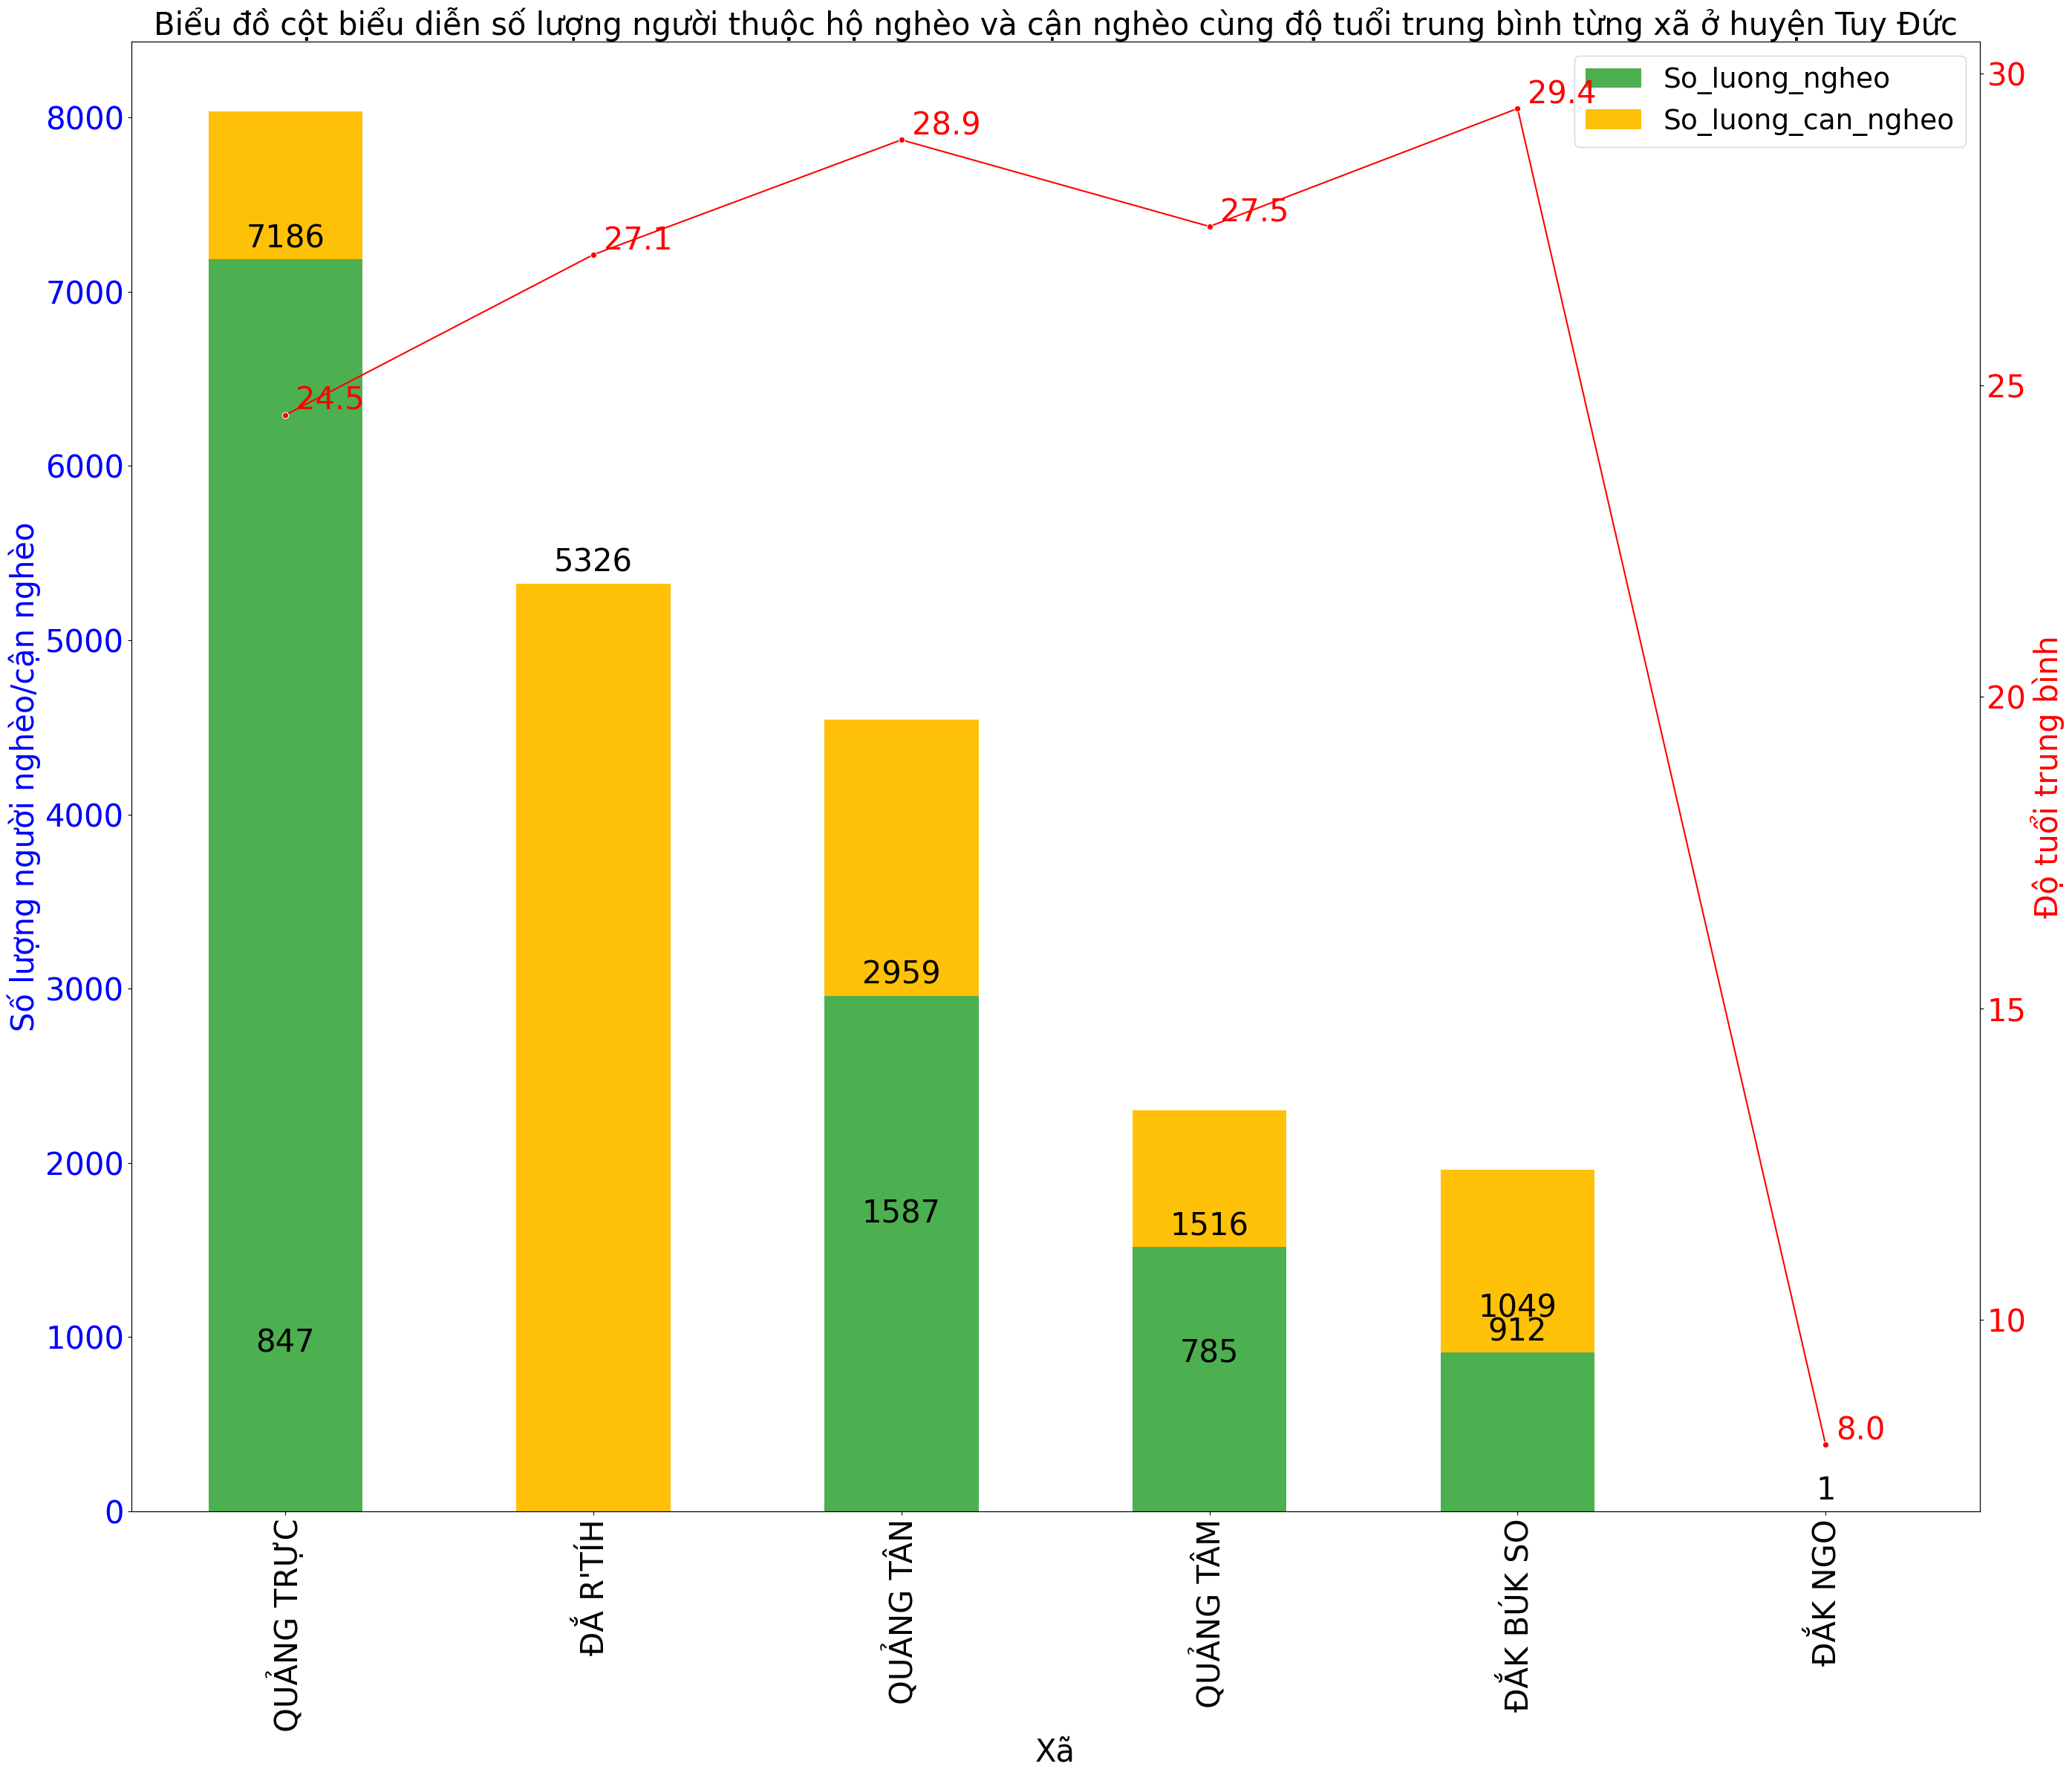

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(28, 24))  # Tăng kích thước hình ảnh

# Biểu đồ cột cho số lượng người nghèo và cận nghèo với màu sắc khác nhau
colors = ['#4CAF50', '#FFC107']  # Chọn hai màu khác
data_merged_tuy_duc.set_index('XA')[['So_luong_ngheo', 'So_luong_can_ngheo']].plot(kind='bar', stacked=True, ax=ax1, color=colors)
ax1.set_xlabel('Xã', fontsize=30)  # Tăng kích thước chữ
ax1.set_ylabel('Số lượng người nghèo/cận nghèo', fontsize=30, color='b')  # Tăng kích thước chữ
ax1.tick_params(axis='y', labelcolor='b', labelsize=30)  # Tăng kích thước chữ của nhãn trục y
ax1.tick_params(axis='x', labelsize=30)  # Tăng kích thước chữ của nhãn trục x
# Cập nhật kích thước chữ của legend
ax1.legend(prop={'size': 27})
# Hiển thị nhãn số lượng người nghèo và cận nghèo trên biểu đồ cột
for p in ax1.patches:
    height = p.get_height()
    if height > 0:
        ax1.annotate(format(height, '.0f'),
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom',
                     xytext=(0, 5),  # Điều chỉnh khoảng cách để số không bị đè lên nhau
                     textcoords='offset points', fontsize=30, color='black')  # Tăng kích thước chữ

# Tạo trục thứ hai để vẽ đường biểu diễn cho độ tuổi trung bình
ax2 = ax1.twinx()
sns.lineplot(x='XA', y='Tuoi_trung_binh', data=data_merged_tuy_duc, ax=ax2, color='r', marker='o')
ax2.set_ylabel('Độ tuổi trung bình', fontsize=30, color='r')  # Tăng kích thước chữ
ax2.tick_params(axis='y', labelcolor='r', labelsize=30)  # Tăng kích thước chữ của nhãn trục y

# Hiển thị nhãn độ tuổi trung bình trên biểu đồ đường
for line in ax2.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax2.annotate(f'{y:.1f}', xy=(x, y), xytext=(10, 5), textcoords='offset points', color='r', fontsize=30)  # Tăng kích thước chữ

# Thêm tiêu đề và hiển thị biểu đồ
plt.title('Biểu đồ cột biểu diễn số lượng người thuộc hộ nghèo và cận nghèo cùng độ tuổi trung bình từng xã ở huyện Tuy Đức', fontsize=30)  # Tăng kích thước chữ tiêu đề
plt.xticks(rotation=45, fontsize=30)  # Tăng kích thước chữ nhãn trục x
plt.tight_layout()
plt.show()


> Phân bố nhóm tuổi

In [37]:
# Định nghĩa các khoảng độ tuổi
bins = [0, 14, 59, 100]  # Sử dụng 100 để bao gồm tất cả các giá trị tuổi từ 60 đến 100
labels = ['0-14', '15-59', '60+']

# Thêm cột 'Group' cho các khoảng độ tuổi
df_huyen_dak_glong['Group'] = pd.cut(df_huyen_dak_glong['TUOI'], bins=bins, labels=labels, right=True)

# Tính số lượng người nghèo/cận nghèo theo nhóm độ tuổi cho từng xã
age_group_distribution_by_commune = df_huyen_dak_glong.groupby(['XA', 'Group']).size().reset_index(name='So_luong')

# Sắp xếp theo số lượng người nghèo/cận nghèo giảm dần
age_group_distribution_by_commune = age_group_distribution_by_commune.sort_values(by='So_luong', ascending=False)

# In bảng thống kê
print("Bảng thống kê số lượng người nghèo/cận nghèo theo nhóm độ tuổi cho từng xã:")
print(age_group_distribution_by_commune)


Bảng thống kê số lượng người nghèo/cận nghèo theo nhóm độ tuổi cho từng xã:
            XA  Group  So_luong
1    QUẢNG HÒA  15-59      4542
16  ĐẮK R'MĂNG  15-59      3859
19     ĐẮK SOM  15-59      3664
7    QUẢNG SƠN  15-59      3568
0    QUẢNG HÒA   0-14      3236
10      ĐẮK HA  15-59      2831
15  ĐẮK R'MĂNG   0-14      2472
4    QUẢNG KHÊ  15-59      2361
18     ĐẮK SOM   0-14      2191
6    QUẢNG SƠN   0-14      1919
9       ĐẮK HA   0-14      1572
13    ĐẮK PLAO  15-59      1244
3    QUẢNG KHÊ   0-14       929
12    ĐẮK PLAO   0-14       747
2    QUẢNG HÒA    60+       412
8    QUẢNG SƠN    60+       388
5    QUẢNG KHÊ    60+       352
20     ĐẮK SOM    60+       330
17  ĐẮK R'MĂNG    60+       320
11      ĐẮK HA    60+       277
14    ĐẮK PLAO    60+       149


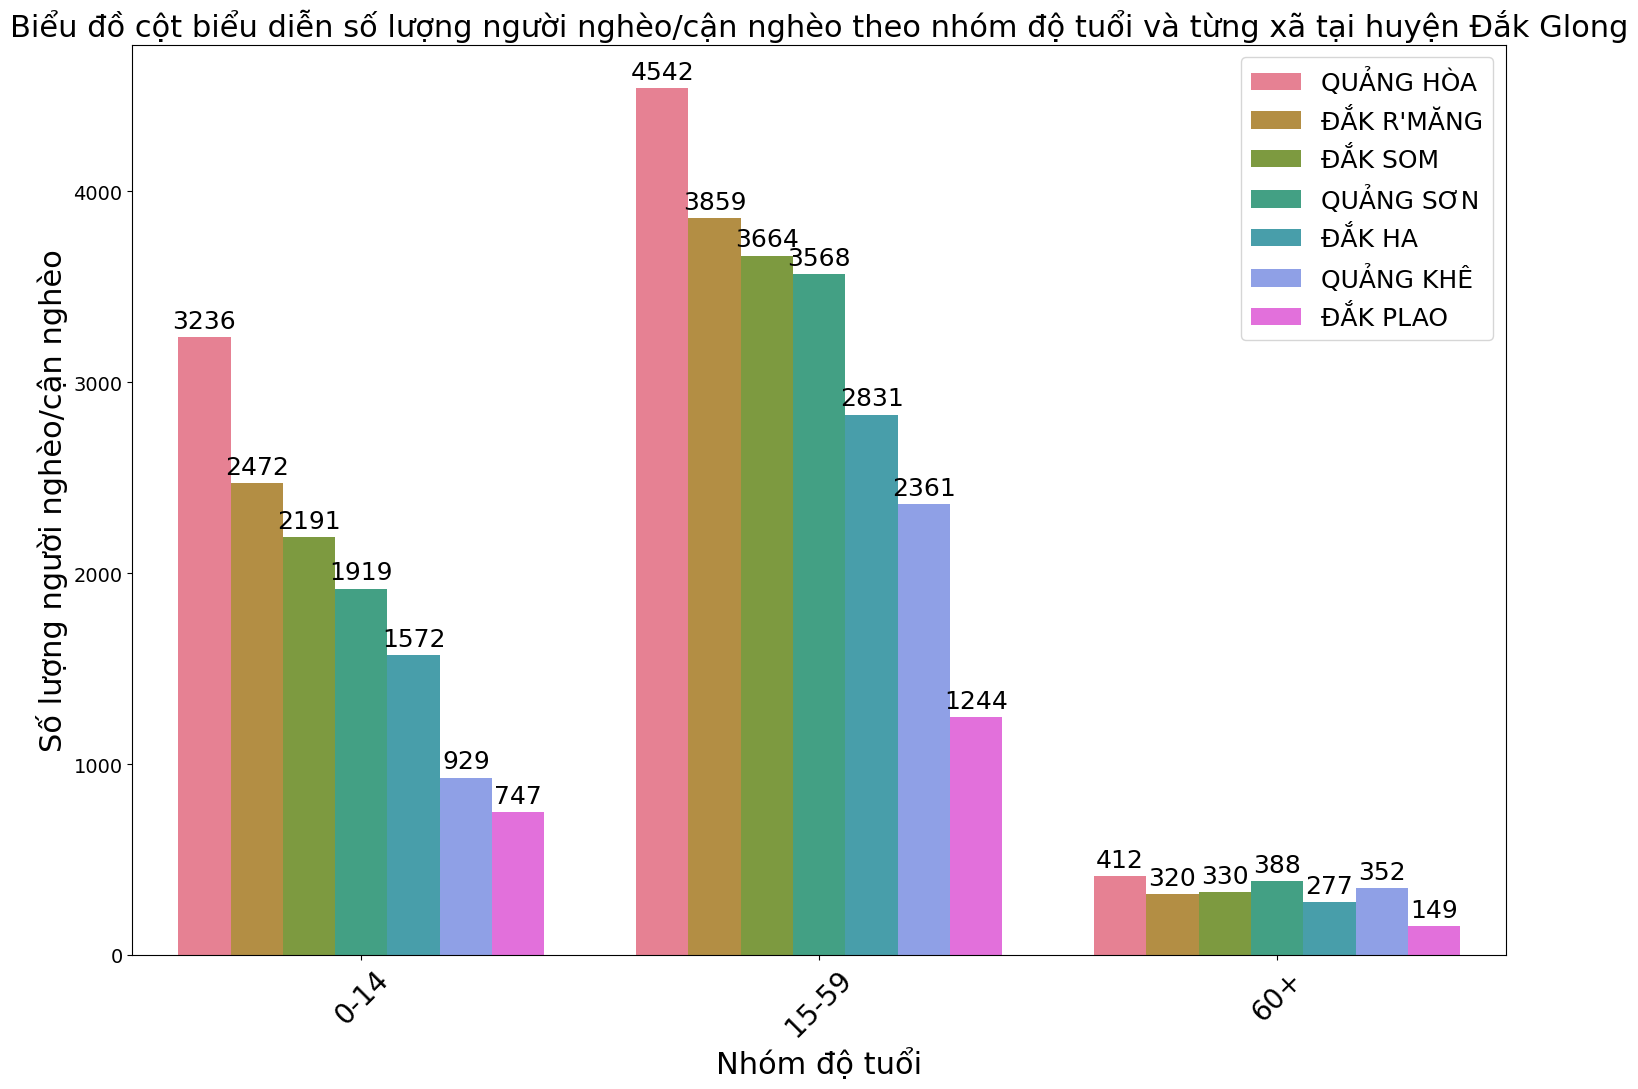

In [38]:


# Tạo bảng màu riêng cho từng xã
palette = sns.color_palette("husl", len(age_group_distribution_by_commune['XA'].unique()))

# Tạo biểu đồ phân phối số lượng người nghèo/cận nghèo theo nhóm độ tuổi cho từng xã
fig, ax = plt.subplots(figsize=(15, 11))
sns.barplot(x='Group', y='So_luong', hue='XA', data=age_group_distribution_by_commune, palette=palette, ax=ax)

# Cập nhật kích thước chữ của legend
ax.legend(prop={'size': 18})  # Thay đổi kích thước chữ của legend (hoặc điều chỉnh giá trị theo nhu cầu của bạn)

# Đặt tiêu đề và nhãn trục
ax.set_title('Biểu đồ cột biểu diễn số lượng người nghèo/cận nghèo theo nhóm độ tuổi và từng xã tại huyện Đắk Glong', fontsize=22)  # Tăng kích thước chữ tiêu đề
ax.set_xlabel('Nhóm độ tuổi', fontsize=22)  # Tăng kích thước chữ nhãn trục x
ax.set_ylabel('Số lượng người nghèo/cận nghèo', fontsize=22)  # Tăng kích thước chữ nhãn trục y

# Hiển thị giá trị trên mỗi cột
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=18, padding=3)  # Tăng kích thước chữ và thêm khoảng cách

# Đặt kích thước chữ cho các nhãn trục
ax.tick_params(axis='x', labelsize=14)  # Tăng kích thước chữ của nhãn trục x
ax.tick_params(axis='y', labelsize=14)  # Tăng kích thước chữ của nhãn trục y

# Xoay nhãn trục x để dễ đọc hơn
plt.xticks(rotation=45, fontsize=20)  # Tăng kích thước chữ nhãn trục x

plt.tight_layout()
plt.show()


> Huyện Tuy Đức

In [39]:
# Định nghĩa các khoảng độ tuổi
bins = [0, 14, 59, 100]  # Sử dụng 100 để bao gồm tất cả các giá trị tuổi từ 60 đến 100
labels = ['0-14', '15-59', '60+']

# Thêm cột 'Group' cho các khoảng độ tuổi
df_huyen_tuy_duc['Group'] = pd.cut(df_huyen_tuy_duc['TUOI'], bins=bins, labels=labels, right=True)

# Tính số lượng người nghèo/cận nghèo theo nhóm độ tuổi cho từng xã
age_group_distribution_by_commune = df_huyen_tuy_duc.groupby(['XA', 'Group']).size().reset_index(name='So_luong')

# Sắp xếp theo số lượng người nghèo/cận nghèo giảm dần
age_group_distribution_by_commune = age_group_distribution_by_commune.sort_values(by='So_luong', ascending=False)

# In bảng thống kê
print("Bảng thống kê số lượng người nghèo/cận nghèo theo nhóm độ tuổi cho từng xã:")
print(age_group_distribution_by_commune)


Bảng thống kê số lượng người nghèo/cận nghèo theo nhóm độ tuổi cho từng xã:
            XA  Group  So_luong
1   QUẢNG TRỰC  15-59      4820
10    ĐẮ R'TÍH  15-59      3288
7    QUẢNG TÂN  15-59      2906
0   QUẢNG TRỰC   0-14      2850
9     ĐẮ R'TÍH   0-14      1689
4    QUẢNG TÂM  15-59      1515
6    QUẢNG TÂN   0-14      1272
13  ĐẮK BÚK SO  15-59      1174
3    QUẢNG TÂM   0-14       652
12  ĐẮK BÚK SO   0-14       578
8    QUẢNG TÂN    60+       368
2   QUẢNG TRỰC    60+       360
11    ĐẮ R'TÍH    60+       330
14  ĐẮK BÚK SO    60+       209
5    QUẢNG TÂM    60+       134
15     ĐẮK NGO   0-14         1
16     ĐẮK NGO  15-59         0
17     ĐẮK NGO    60+         0


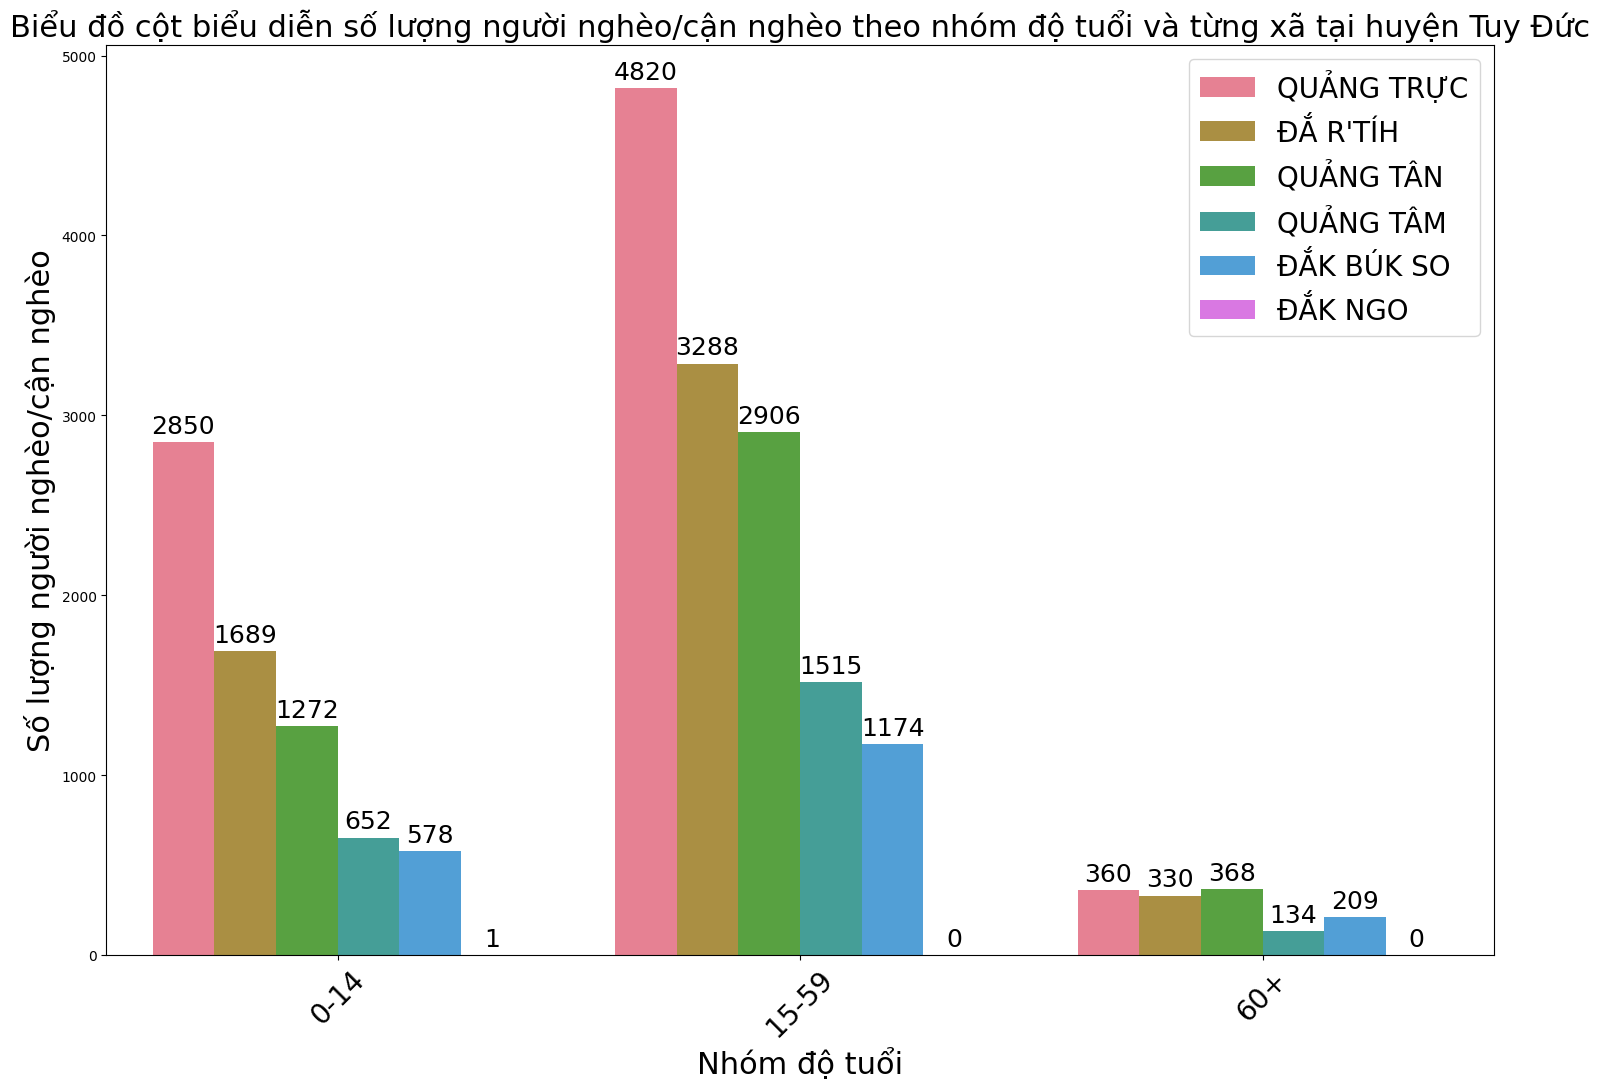

In [40]:

# Giả sử bạn đã có dữ liệu trong biến 'age_group_distribution_by_commune'
# Tạo bảng màu riêng cho từng xã
palette = sns.color_palette("husl", len(age_group_distribution_by_commune['XA'].unique()))

# Tạo biểu đồ phân phối số lượng người nghèo/cận nghèo theo nhóm độ tuổi cho từng xã
fig, ax = plt.subplots(figsize=(15, 11))
sns.barplot(x='Group', y='So_luong', hue='XA', data=age_group_distribution_by_commune, palette=palette, ax=ax)
# Cập nhật kích thước chữ của legend
ax.legend(prop={'size': 20})
# Đặt tiêu đề và nhãn trục
ax.set_title('Biểu đồ cột biểu diễn số lượng người nghèo/cận nghèo theo nhóm độ tuổi và từng xã tại huyện Tuy Đức', fontsize=22)
ax.set_xlabel('Nhóm độ tuổi', fontsize=22)
ax.set_ylabel('Số lượng người nghèo/cận nghèo', fontsize=22)

# Hiển thị giá trị trên mỗi cột
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=18, color='black', padding=3)

plt.xticks(rotation=45, fontsize=20)
plt.tight_layout()
plt.show()


> Cư Jut

In [41]:
# Định nghĩa các khoảng độ tuổi
bins = [0, 14, 59, float('inf')]  # Sử dụng float('inf') để bao gồm tất cả các giá trị tuổi 60 trở lên
labels = ['0-14', '15-59', '60+']

# Thêm cột 'Group' cho các khoảng độ tuổi
df_huyen_cu_jut['Group'] = pd.cut(df_huyen_cu_jut['TUOI'], bins=bins, labels=labels, right=True)

# Tính số lượng người nghèo/cận nghèo theo nhóm độ tuổi cho từng xã
age_group_distribution_by_commune = df_huyen_cu_jut.groupby(['XA', 'Group']).size().reset_index(name='So_luong')

# In bảng thống kê
print("Bảng thống kê số lượng người nghèo/cận nghèo theo nhóm độ tuổi cho từng xã:")
print(age_group_distribution_by_commune)

Bảng thống kê số lượng người nghèo/cận nghèo theo nhóm độ tuổi cho từng xã:
            XA  Group  So_luong
0     CƯ K'NIA   0-14       770
1     CƯ K'NIA  15-59      1288
2     CƯ K'NIA    60+       174
3        EA PÔ   0-14       234
4        EA PÔ  15-59       620
5        EA PÔ    60+       147
6     EAT'LING   0-14       420
7     EAT'LING  15-59       835
8     EAT'LING    60+       143
9     NAM DONG   0-14       350
10    NAM DONG  15-59       829
11    NAM DONG    60+       171
12    TRÚC SƠN   0-14        57
13    TRÚC SƠN  15-59       131
14    TRÚC SƠN    60+        58
15   TÂM THẮNG   0-14       531
16   TÂM THẮNG  15-59      1153
17   TÂM THẮNG    60+       215
18  ĐẮK D'RÔNG   0-14       697
19  ĐẮK D'RÔNG  15-59      1258
20  ĐẮK D'RÔNG    60+       180
21     ĐẮK WIL   0-14       445
22     ĐẮK WIL  15-59       962
23     ĐẮK WIL    60+       136


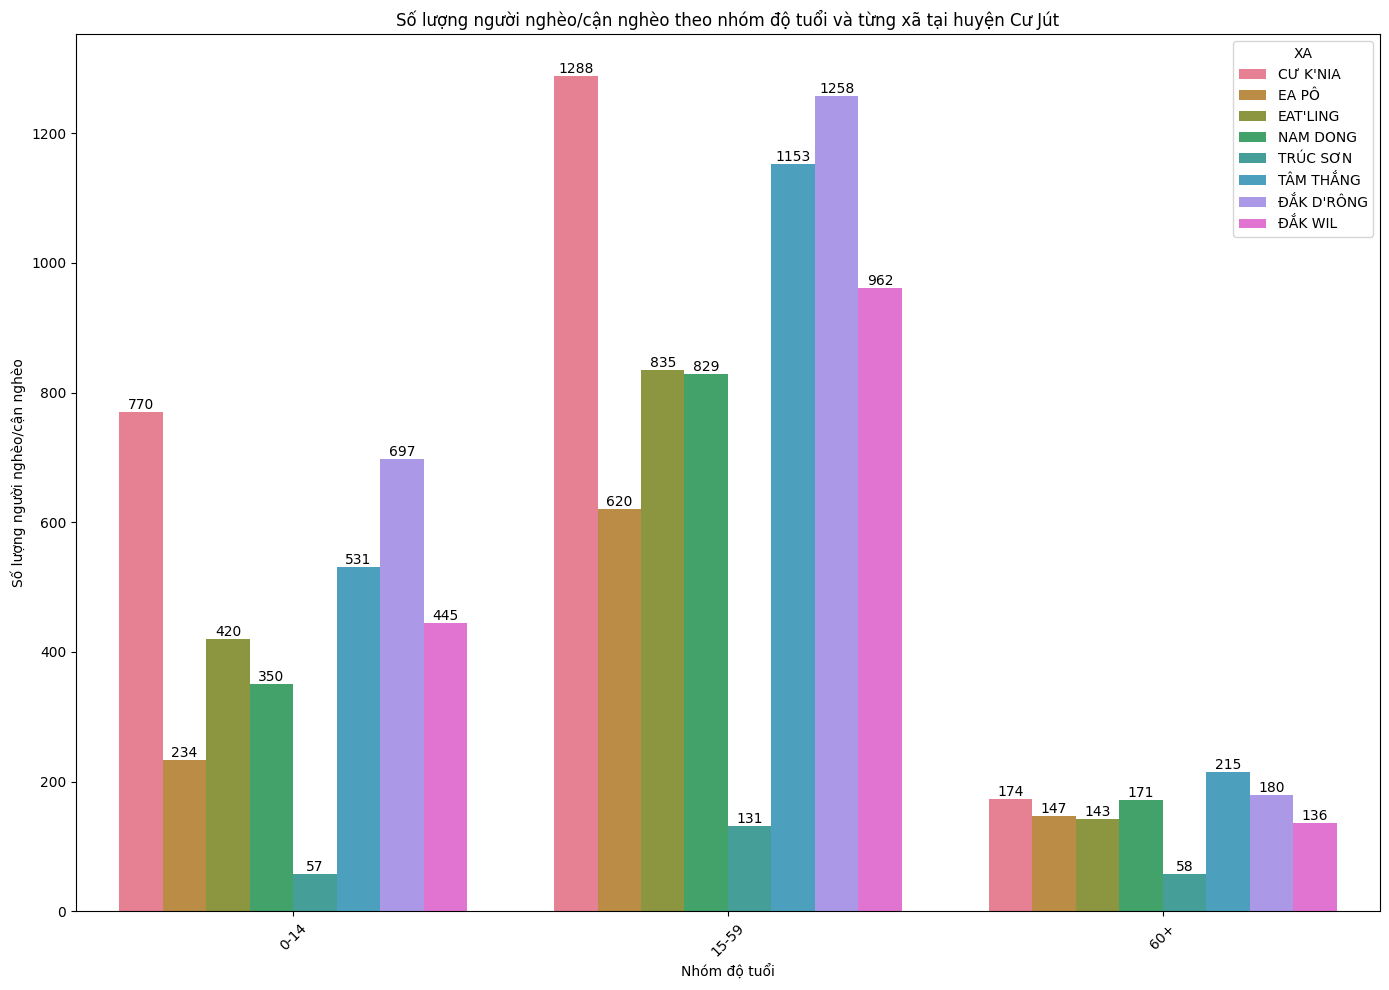

In [42]:

# Tạo bảng màu riêng cho từng xã
palette = sns.color_palette("husl", len(age_group_distribution_by_commune['XA'].unique()))

# Tạo biểu đồ phân phối số lượng người nghèo/cận nghèo theo nhóm độ tuổi cho từng xã
fig, ax = plt.subplots(figsize=(14, 10))
sns.barplot(x='Group', y='So_luong', hue='XA', data=age_group_distribution_by_commune, palette=palette, ax=ax)

# Đặt tiêu đề và nhãn trục
ax.set_title('Số lượng người nghèo/cận nghèo theo nhóm độ tuổi và từng xã tại huyện Cư Jút')
ax.set_xlabel('Nhóm độ tuổi')
ax.set_ylabel('Số lượng người nghèo/cận nghèo')

# Hiển thị giá trị trên mỗi cột
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> Đắk RLấp

In [43]:
# Định nghĩa các khoảng độ tuổi
bins = [0, 14, 59, 100]  # Sử dụng 100 để bao gồm tất cả các giá trị tuổi từ 60 đến 100
labels = ['0-14', '15-59', '60+']

# Thêm cột 'Group' cho các khoảng độ tuổi
df_huyen_dak_rlap['Group'] = pd.cut(df_huyen_dak_rlap['TUOI'], bins=bins, labels=labels, right=True)

# Tính số lượng người nghèo/cận nghèo theo nhóm độ tuổi cho từng xã
age_group_distribution_by_commune_dak_rlap = df_huyen_dak_rlap.groupby(['XA', 'Group']).size().reset_index(name='So_luong')

# Sắp xếp theo số lượng người nghèo/cận nghèo giảm dần
age_group_distribution_by_commune_dak_rlap = age_group_distribution_by_commune_dak_rlap.sort_values(by='So_luong', ascending=False)

# In bảng thống kê
print("Bảng thống kê số lượng người nghèo/cận nghèo theo nhóm độ tuổi cho từng xã tại huyện Đắk R'lấp:")
print(age_group_distribution_by_commune_dak_rlap)

Bảng thống kê số lượng người nghèo/cận nghèo theo nhóm độ tuổi cho từng xã tại huyện Đắk R'lấp:
             XA  Group  So_luong
22       ĐĂK RU  15-59       544
10  NGHĨA THẮNG  15-59       431
31      ĐẮK WER  15-59       338
25      ĐĂK SIN  15-59       306
16     NHÂN ĐẠO  15-59       253
21       ĐĂK RU   0-14       244
19    QUẢNG TÍN  15-59       208
9   NGHĨA THẮNG   0-14       201
4    KIẾN THÀNH  15-59       185
30      ĐẮK WER   0-14       165
23       ĐĂK RU    60+       139
13      NHÂN CƠ  15-59       118
24      ĐĂK SIN   0-14       115
15     NHÂN ĐẠO   0-14       109
1     HƯNG BÌNH  15-59        97
18    QUẢNG TÍN   0-14        91
26      ĐĂK SIN    60+        73
11  NGHĨA THẮNG    60+        72
3    KIẾN THÀNH   0-14        67
12      NHÂN CƠ   0-14        52
32      ĐẮK WER    60+        50
17     NHÂN ĐẠO    60+        48
0     HƯNG BÌNH   0-14        47
20    QUẢNG TÍN    60+        40
7      KIẾN ĐỨC  15-59        37
28    ĐẠO NGHĨA  15-59        33
14      NHÂN 

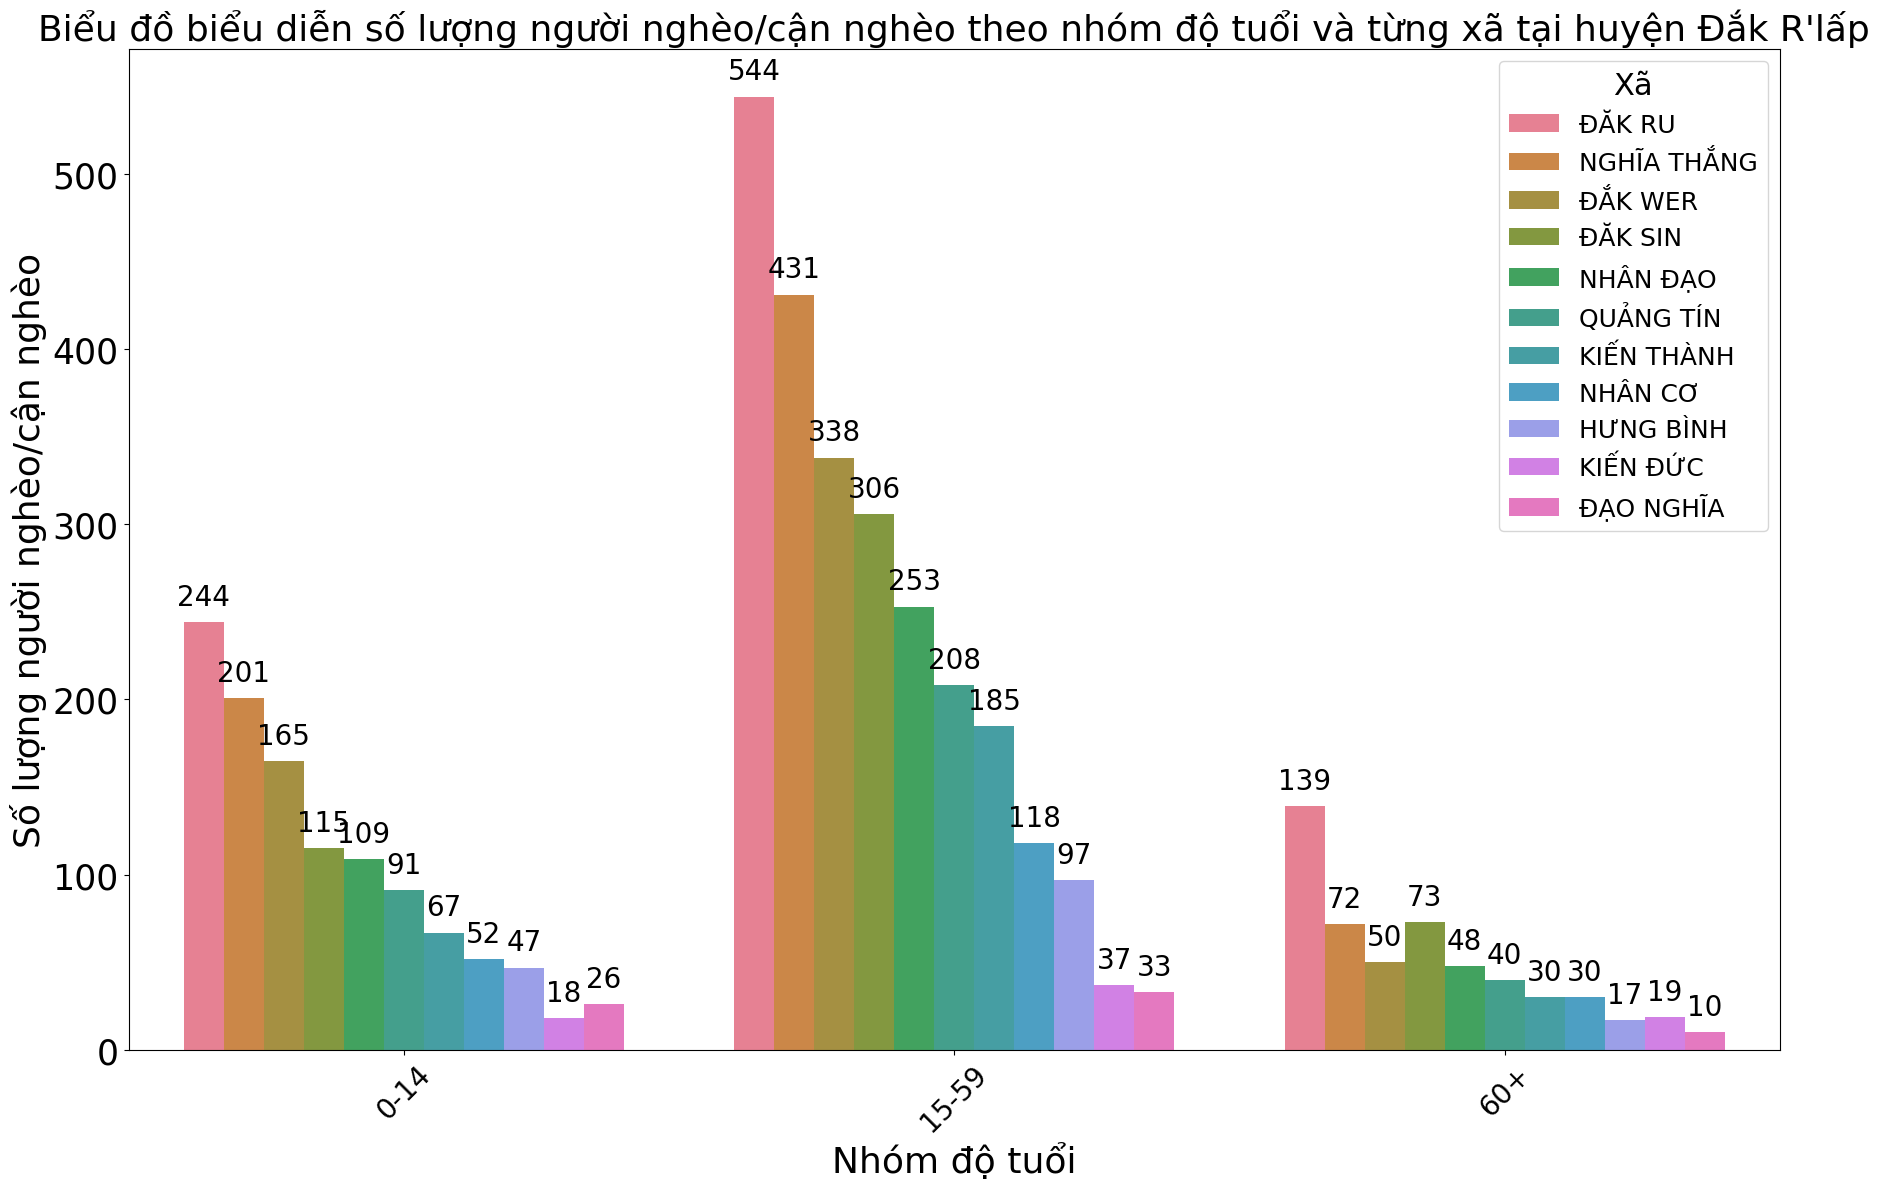

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử bạn đã có dữ liệu trong biến 'age_group_distribution_by_commune_dak_rlap'
# Tạo bảng màu riêng cho từng xã
palette = sns.color_palette("husl", len(age_group_distribution_by_commune_dak_rlap['XA'].unique()))

# Tạo biểu đồ phân phối số lượng người nghèo/cận nghèo theo nhóm độ tuổi cho từng xã
fig, ax = plt.subplots(figsize=(18, 12))  # Tăng kích thước hình ảnh để làm cho cột lớn hơn
sns.barplot(x='Group', y='So_luong', hue='XA', data=age_group_distribution_by_commune_dak_rlap, palette=palette, ax=ax, width=0.8)  # Điều chỉnh độ rộng của cột

# Cập nhật kích thước chữ của legend
ax.legend(prop={'size': 18}, title='Xã', title_fontsize='22')

# Đặt tiêu đề và nhãn trục với kích thước chữ lớn hơn
ax.set_title('Biểu đồ biểu diễn số lượng người nghèo/cận nghèo theo nhóm độ tuổi và từng xã tại huyện Đắk R\'lấp', fontsize=26)  # Tăng kích thước chữ tiêu đề
ax.set_xlabel('Nhóm độ tuổi', fontsize=26)  # Tăng kích thước chữ nhãn trục x
ax.set_ylabel('Số lượng người nghèo/cận nghèo', fontsize=26)  # Tăng kích thước chữ nhãn trục y

# Tăng kích thước chữ cho nhãn trục x và y
ax.tick_params(axis='x', labelsize=25)  # Tăng kích thước chữ cho nhãn trục x
ax.tick_params(axis='y', labelsize=25)  # Tăng kích thước chữ cho nhãn trục y

# Hiển thị giá trị trên mỗi cột với kích thước chữ lớn hơn và điều chỉnh vị trí
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=20, padding=8)  # Tăng kích thước chữ nhãn và thêm khoảng cách

# Điều chỉnh kích thước chữ và xoay nhãn trục x
plt.xticks(rotation=45, fontsize=20)
plt.tight_layout()
plt.show()


#### Quan sát biểu đồ ta thấy:
- Phần lớn số lượng nam nữ phân bố là như nhau ở các xã của huyện Cư Jut
- Dân cư của xã Cư K'NIA là đông dân nhất
- Dân cư của xã Trúc Sơn là ít dân nhất

> Huyện Đắk Rlấp

In [45]:

# Lọc dữ liệu chỉ bao gồm những người thuộc hộ nghèo/cận nghèo
df_ngheo_canngheo = df_huyen_dak_rlap[df_huyen_dak_rlap['PHAN_LOAI_HO'].isin([1, 2])]

# Tính số lượng người thuộc hộ nghèo và cận nghèo từng xã
so_nguoi_ngheo = df_ngheo_canngheo[df_ngheo_canngheo['PHAN_LOAI_HO'] == 1].groupby('XA').size().reset_index(name='So_luong_ngheo')
so_nguoi_canngheo = df_ngheo_canngheo[df_ngheo_canngheo['PHAN_LOAI_HO'] == 2].groupby('XA').size().reset_index(name='So_luong_can_ngheo')

# Tính độ tuổi trung bình của từng xã
do_tuoi_trung_binh = df_huyen_dak_rlap.groupby('XA')['TUOI'].mean().reset_index(name='Tuoi_trung_binh')

# Kết hợp ba bảng dữ liệu lại
data_merged = pd.merge(so_nguoi_ngheo, so_nguoi_canngheo, on='XA', how='outer')
data_merged = pd.merge(data_merged, do_tuoi_trung_binh, on='XA', how='outer')

# Tính tổng số người nghèo và cận nghèo để sắp xếp
data_merged['Tong_so'] = data_merged['So_luong_ngheo'].fillna(0) + data_merged['So_luong_can_ngheo'].fillna(0)

# Sắp xếp giảm dần theo tổng số người nghèo và cận nghèo
data_merged_sorted = data_merged.sort_values(by='Tong_so', ascending=False)

print("\nKết Quả:")
print(data_merged_sorted)


Kết Quả:
             XA  So_luong_ngheo  So_luong_can_ngheo  Tuoi_trung_binh  Tong_so
7        ĐĂK RU           468.0               462.0        32.349195    930.0
3   NGHĨA THẮNG           291.0               413.0        29.143350    704.0
10      ĐẮK WER           246.0               308.0        28.749252    554.0
8       ĐĂK SIN           205.0               289.0        33.323255    494.0
5      NHÂN ĐẠO           142.0               269.0        30.563464    411.0
6     QUẢNG TÍN           339.0                 NaN        29.958702    339.0
1    KIẾN THÀNH             NaN               282.0        31.557700    282.0
4       NHÂN CƠ            85.0               115.0        32.143959    200.0
0     HƯNG BÌNH           161.0                 NaN        28.760096    161.0
2      KIẾN ĐỨC            74.0                 NaN        35.729730     74.0
9     ĐẠO NGHĨA            69.0                 NaN        29.108399     69.0


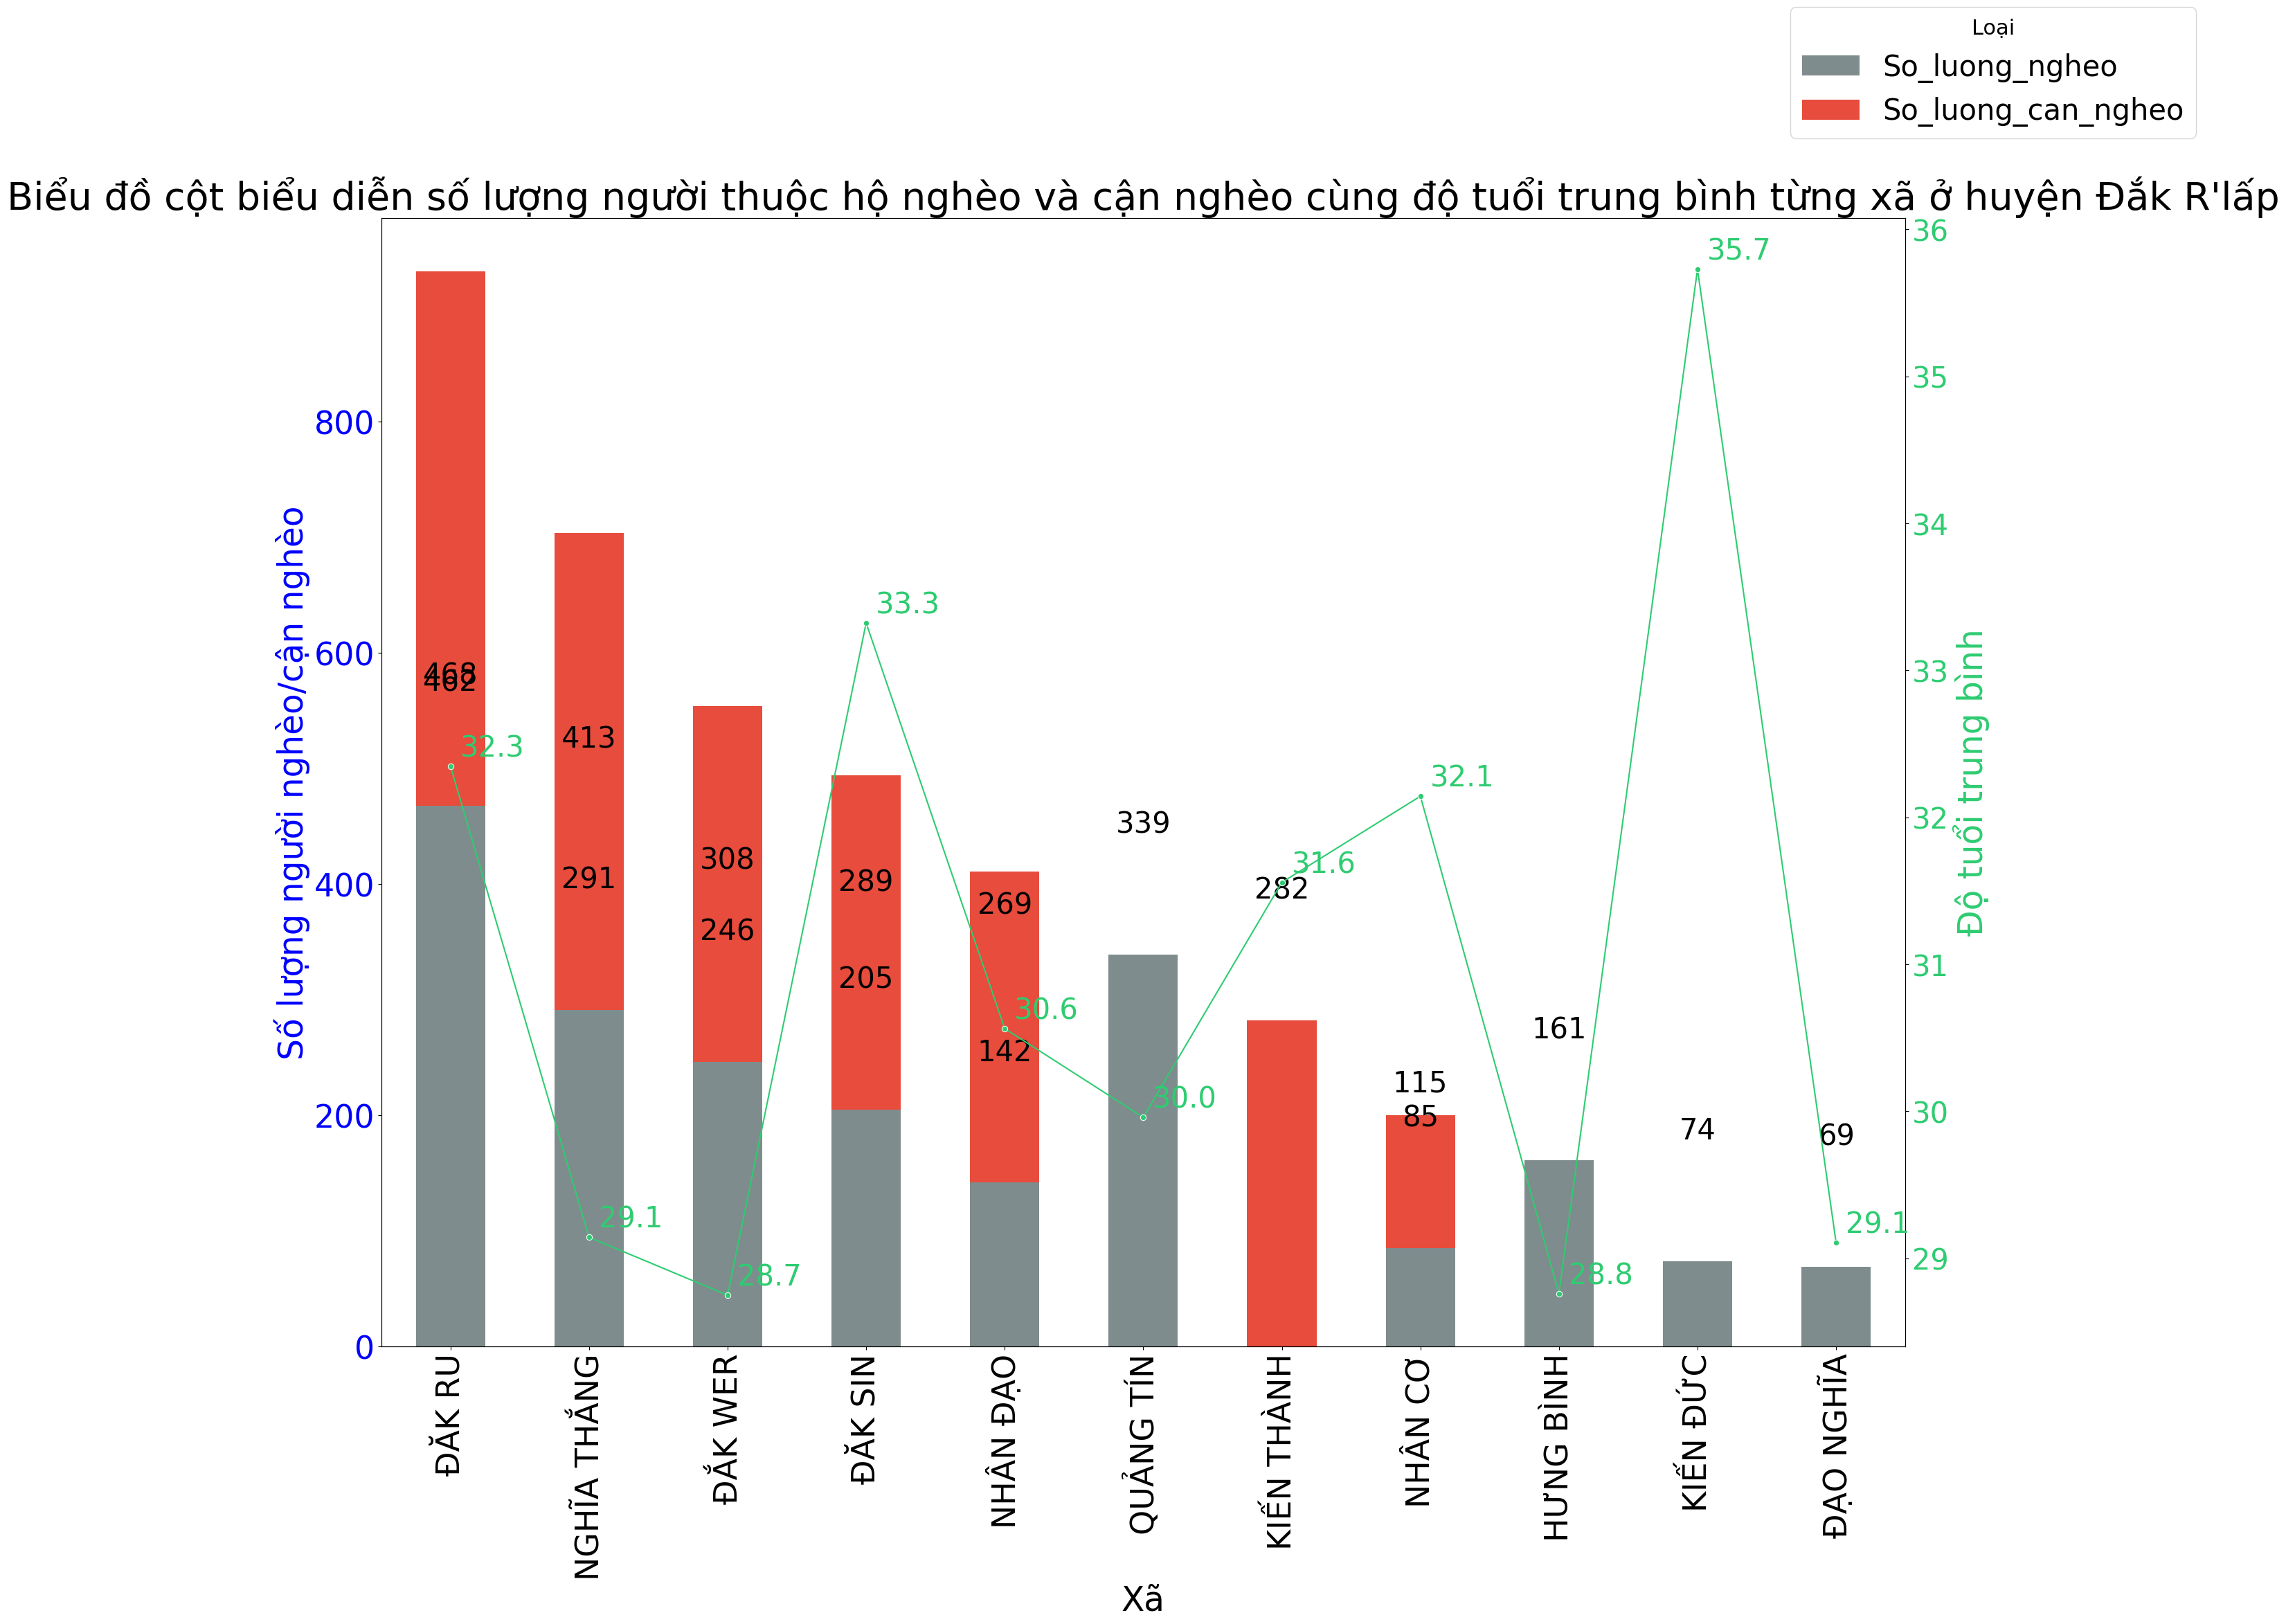

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử bạn đã có dữ liệu trong biến 'data_merged_sorted'
# Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(28, 24))  # Kích thước hình ảnh lớn hơn

# Biểu đồ cột cho số lượng người nghèo và cận nghèo
data_merged_sorted.set_index('XA')[['So_luong_ngheo', 'So_luong_can_ngheo']].plot(
    kind='bar', 
    stacked=True, 
    ax=ax1, 
    color=['#7f8c8d', '#e74c3c']  # Màu xám đậm và đỏ đậm
)
ax1.set_xlabel('Xã', fontsize=35)  # Tăng kích thước chữ cho nhãn trục x
ax1.set_ylabel('Số lượng người nghèo/cận nghèo', color='b', fontsize=35)  # Tăng kích thước chữ cho nhãn trục y
ax1.tick_params(axis='y', labelcolor='b', labelsize=33)  # Tăng kích thước chữ cho nhãn trục y
ax1.tick_params(axis='x', labelsize=33)  # Tăng kích thước chữ cho nhãn trục x

# Hiển thị nhãn số lượng người nghèo và cận nghèo trên biểu đồ cột
for p in ax1.patches:
    height = p.get_height()
    if height > 0:
        ax1.annotate(
            format(height, '.0f'),
            (p.get_x() + p.get_width() / 2., height + 100),  # Đặt nhãn cao hơn đầu cột để không bị chồng
            ha='center', va='bottom',  # Đặt nhãn ở phía trên cột
            xytext=(0, 0),  # Không thêm khoảng cách nhãn
            textcoords='offset points', fontsize=30, color='black'  # Giảm kích thước chữ nhãn
        )

# Tạo trục thứ hai để vẽ đường biểu diễn cho độ tuổi trung bình
ax2 = ax1.twinx()
sns.lineplot(
    x='XA', 
    y='Tuoi_trung_binh', 
    data=data_merged_sorted, 
    ax=ax2, 
    color='#2ecc71',  # Màu xanh lá cây sáng
    marker='o'
)
ax2.set_ylabel('Độ tuổi trung bình', color='#2ecc71', fontsize=35)  # Tăng kích thước chữ cho nhãn trục y của biểu đồ đường
ax2.tick_params(axis='y', labelcolor='#2ecc71', labelsize=30)  # Tăng kích thước chữ cho nhãn trục y của biểu đồ đường

# Hiển thị nhãn độ tuổi trung bình trên biểu đồ đường
for line in ax2.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax2.annotate(
            f'{y:.1f}', 
            xy=(x, y), 
            xytext=(10, 10), 
            textcoords='offset points', 
            color='#2ecc71', 
            fontsize=30
        )

# Thêm legend vào trong biểu đồ
ax1.legend(loc='upper right', bbox_to_anchor=(1.2, 1.2), ncol=1, title='Loại', fontsize=30, title_fontsize='22')

# Thêm tiêu đề và điều chỉnh hiển thị
ax1.set_title('Biểu đồ cột biểu diễn số lượng người thuộc hộ nghèo và cận nghèo cùng độ tuổi trung bình từng xã ở huyện Đắk R\'lấp', fontsize=40)  # Tăng kích thước chữ cho tiêu đề
plt.xticks(rotation=45, fontsize=33)  # Tăng kích thước chữ cho nhãn trục x
plt.tight_layout()
plt.show()


In [47]:
# Lọc dữ liệu chỉ bao gồm những người thuộc hộ nghèo/cận nghèo
df_ngheo_canngheo = df_huyen_cu_jut[df_huyen_cu_jut['PHAN_LOAI_HO'].isin([1, 2])]

# Tính số lượng người thuộc hộ nghèo và cận nghèo từng xã
so_nguoi_ngheo = df_ngheo_canngheo[df_ngheo_canngheo['PHAN_LOAI_HO'] == 1].groupby('XA').size().reset_index(name='So_luong_ngheo')
so_nguoi_canngheo = df_ngheo_canngheo[df_ngheo_canngheo['PHAN_LOAI_HO'] == 2].groupby('XA').size().reset_index(name='So_luong_can_ngheo')

# Tính độ tuổi trung bình của từng xã
do_tuoi_trung_binh = df_huyen_cu_jut.groupby('XA')['TUOI'].mean().reset_index(name='Tuoi_trung_binh')

# Kết hợp ba bảng dữ liệu lại
data_merged = pd.merge(so_nguoi_ngheo, so_nguoi_canngheo, on='XA', how='outer')
data_merged = pd.merge(data_merged, do_tuoi_trung_binh, on='XA', how='outer')

print("\nKết Quả:")
print(data_merged)



Kết Quả:
           XA  So_luong_ngheo  So_luong_can_ngheo  Tuoi_trung_binh
0    CƯ K'NIA            1022                1210        26.750448
1       EA PÔ             647                 354        33.662338
2    EAT'LING             511                 887        28.728183
3    NAM DONG             719                 631        32.031852
4    TRÚC SƠN             136                 110        37.890244
5   TÂM THẮNG             593                1306        30.220642
6  ĐẮK D'RÔNG            1228                 907        27.674473
7     ĐẮK WIL             675                 868        29.350616


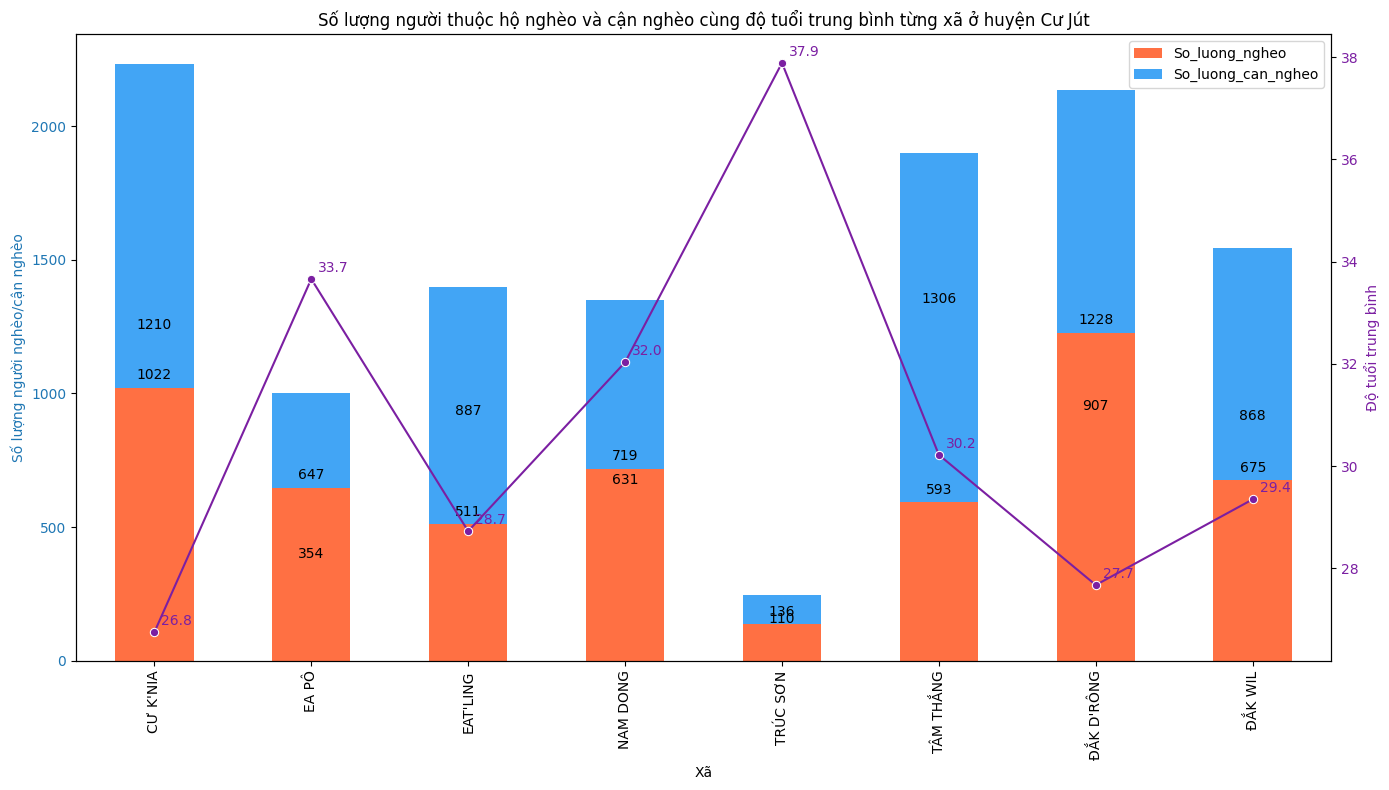

In [48]:
fig, ax1 = plt.subplots(figsize=(14, 8))

# Biểu đồ cột cho số lượng người nghèo và cận nghèo
data_merged.set_index('XA')[['So_luong_ngheo', 'So_luong_can_ngheo']].plot(kind='bar', stacked=True, ax=ax1, color=['#ff7043', '#42a5f5'])  # Màu cam và xanh dương
ax1.set_xlabel('Xã')
ax1.set_ylabel('Số lượng người nghèo/cận nghèo', color='#1f77b4')
ax1.tick_params(axis='y', labelcolor='#1f77b4')

# Hiển thị nhãn số lượng người nghèo và cận nghèo trên biểu đồ cột
for p in ax1.patches:
    height = p.get_height()
    if height > 0:
        ax1.annotate(format(height, '.0f'),
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points')

# Tạo trục thứ hai để vẽ đường biểu diễn cho độ tuổi trung bình
ax2 = ax1.twinx()
sns.lineplot(x='XA', y='Tuoi_trung_binh', data=data_merged, ax=ax2, color='#7b1fa2', marker='o')  # Màu tím
ax2.set_ylabel('Độ tuổi trung bình', color='#7b1fa2')
ax2.tick_params(axis='y', labelcolor='#7b1fa2')

# Hiển thị nhãn độ tuổi trung bình trên biểu đồ đường
for line in ax2.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax2.annotate(f'{y:.1f}', xy=(x, y), xytext=(5, 5), textcoords='offset points', color='#7b1fa2')

# Thêm tiêu đề và hiển thị biểu đồ
plt.title('Số lượng người thuộc hộ nghèo và cận nghèo cùng độ tuổi trung bình từng xã ở huyện Cư Jút')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


> Dân tộc


In [49]:
df_tong_hop.columns

Index(['STT_HO', 'HO_TEN_CHU_HO', 'HO_TEN_THANH_VIEN', 'QUANHE_CHUHO',
       'NGAY_SINH', 'GIOI_TINH', 'SO_CCCD', 'TINH', 'HUYEN', 'XA', 'DANTOC',
       'PHAN_LOAI_HO', 'TUOI', 'Group'],
      dtype='object')

> Số lượng người lao động trong cách ngành

In [50]:
df_laodong=pd.read_excel("../data_processed/SoLuongNguoiLaoDong.xlsx")

In [51]:
df_laodong

Tên Ngành  Số Lượng Người
0                 Nông nghiệp, lâm nghiệp và thủy sản          287532
1                                         Khai khoáng            1789
2                       Công nghiệp chế biến, chế tạo             858
3   Sản xuất và phân phối điện, khí đốt, nƣớc nóng...            1322
4   Cung cấp nƣớc; hoạt động quản lý và xử lý rác ...             502
5                                            Xây dựng            8820
6   Bán buôn và bán lẻ; sửa chữa ô tô, mô tô, xe m...           32771
7                                   Vận tải, kho bãi             4474
8                          Dịch vụ lƣu trú và ăn uống            1181
9                           Thông tin và truyền thông             881
10         Hoạt động tài chính, ngân hàng và bảo hiểm            1466
11                  Hoạt động kinh doanh bất động sản             505
12        Hoạt động chuyên môn, khoa học và công nghệ             342
13             Hoạt động hành chính và dịch vụ hỗ trợ             313

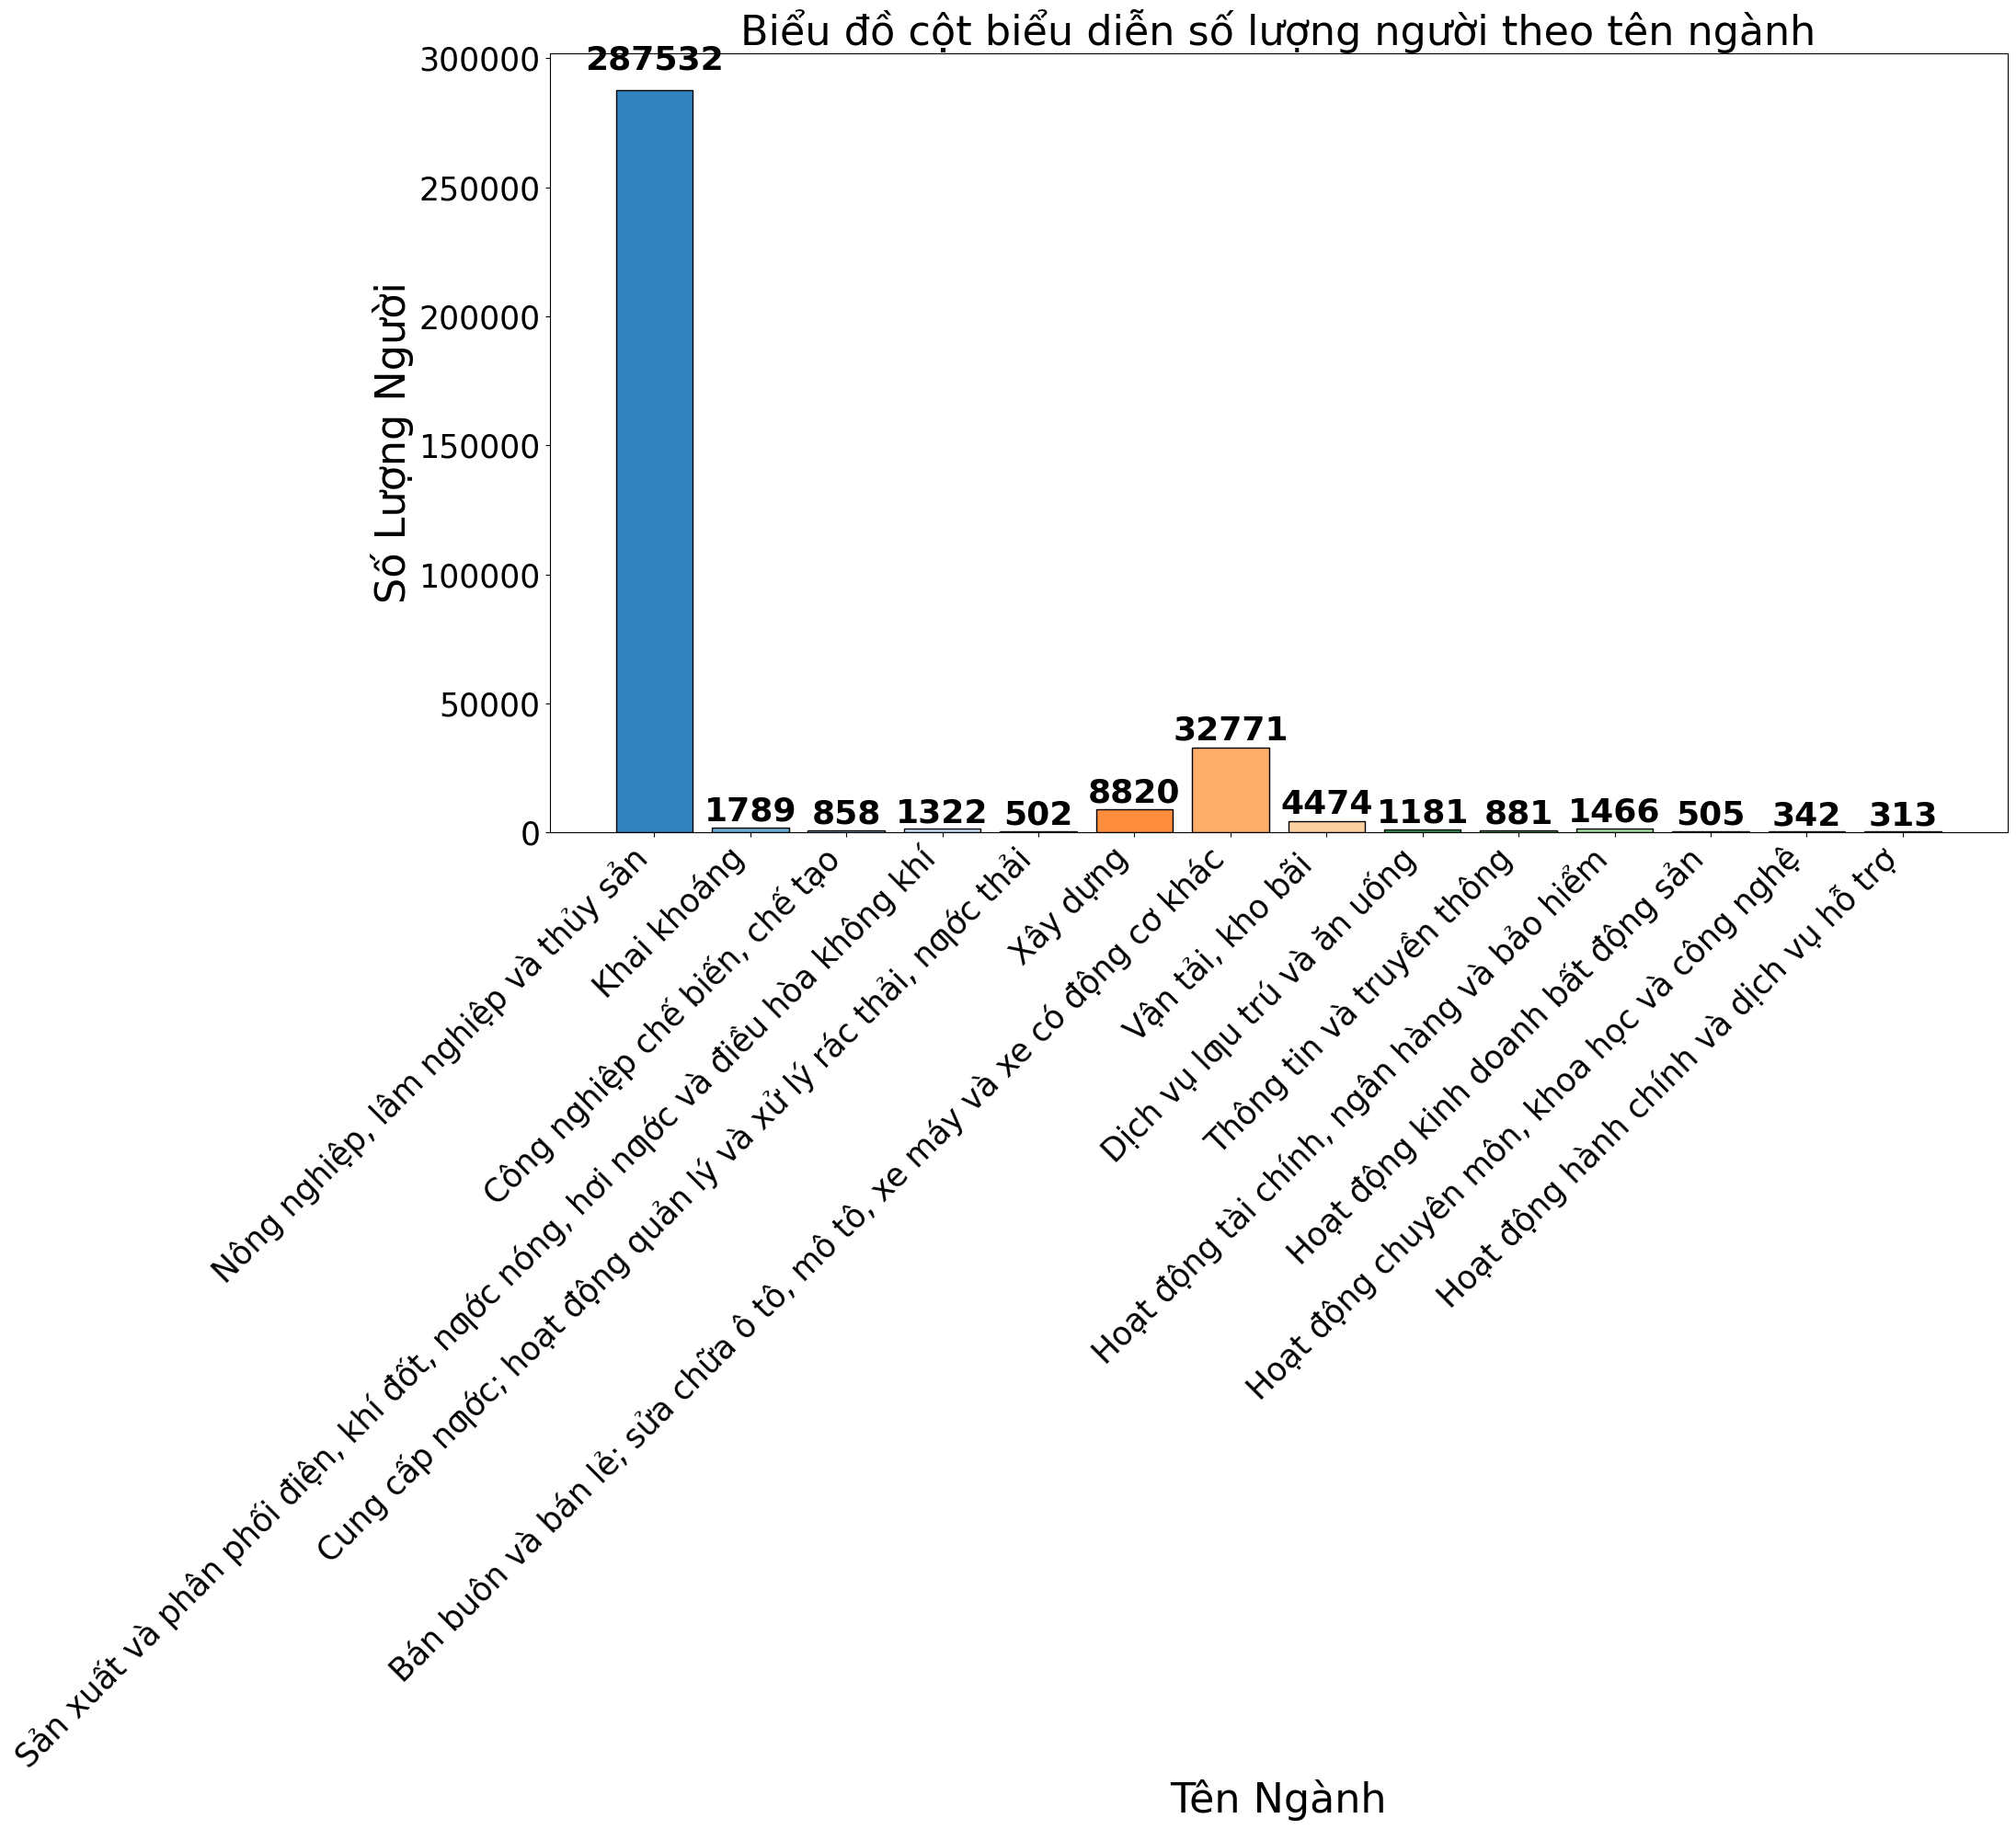

In [52]:
import matplotlib.pyplot as plt

# Tạo danh sách màu sắc với 13 màu khác nhau
colors = plt.cm.tab20c.colors[:13]  # Sử dụng colormap tab20c và chọn 13 màu

# Tạo figure và vẽ biểu đồ cột
plt.figure(figsize=(22, 20))  # Tăng kích thước của figure để có thêm không gian
bars = plt.bar(df_laodong['Tên Ngành'], df_laodong['Số Lượng Người'], color=colors, edgecolor='black', width=0.8)  # Tăng chiều rộng của các cột lên 0.8

# Thêm nhãn trên đầu của mỗi cột với kích thước chữ nhỏ hơn và khoảng cách rõ ràng
for bar in bars:
    yval = bar.get_height()
    # Đặt nhãn trên đỉnh của cột với khoảng cách rõ ràng hơn
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02 * yval, 
             int(yval), ha='center', va='bottom', fontsize=26, weight='bold')

# Cập nhật nhãn trục x và y
plt.xlabel('Tên Ngành', fontsize=32)  # Giảm kích thước font chữ trục x
plt.ylabel('Số Lượng Người', fontsize=32)  # Giảm kích thước font chữ trục y
plt.title('Biểu đồ cột biểu diễn số lượng người theo tên ngành', fontsize=32)  # Giảm kích thước tiêu đề một chút
plt.xticks(rotation=45, ha='right', fontsize=25)  # Giảm kích thước font chữ nhãn trục x
plt.yticks(fontsize=25)  # Giảm kích thước font chữ nhãn trục y

# Điều chỉnh khoảng cách bên ngoài của biểu đồ
plt.subplots_adjust(right=0.85)  # Điều chỉnh khoảng cách bên phải

# Căn chỉnh bố cục để không bị cắt
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


In [53]:
df_thu_nhap_bq=pd.read_excel("../data_processed/Thunhậpbìnhquân.xlsx")

In [54]:
df_thu_nhap_bq

Tên Ngành  Thu Nhập Bình Quân
0                 Nông nghiệp, lâm nghiệp và thủy sản              4058.6
1                                         Khai khoáng              8447.4
2                       Công nghiệp chế biến, chế tạo              7077.3
3   Sản xuất và phân phối điện, khí đốt, nƣớc nóng...             10108.6
4   Cung cấp nƣớc; hoạt động quản lý và xử lý rác ...              7644.9
5                                            Xây dựng              7542.7
6   Bán buôn và bán lẻ; sửa chữa ô tô, mô tô, xe m...              6204.4
7                                   Vận tải, kho bãi               7372.6
8                          Dịch vụ lƣu trú và ăn uống              5257.4
9                           Thông tin và truyền thông              9279.9
10         Hoạt động tài chính, ngân hàng và bảo hiểm              7358.3
11                  Hoạt động kinh doanh bất động sản             12118.1
12        Hoạt động chuyên môn, khoa học và công nghệ              3678.2
13             Hoạt động hành chính và dịch vụ hỗ trợ              5053.6

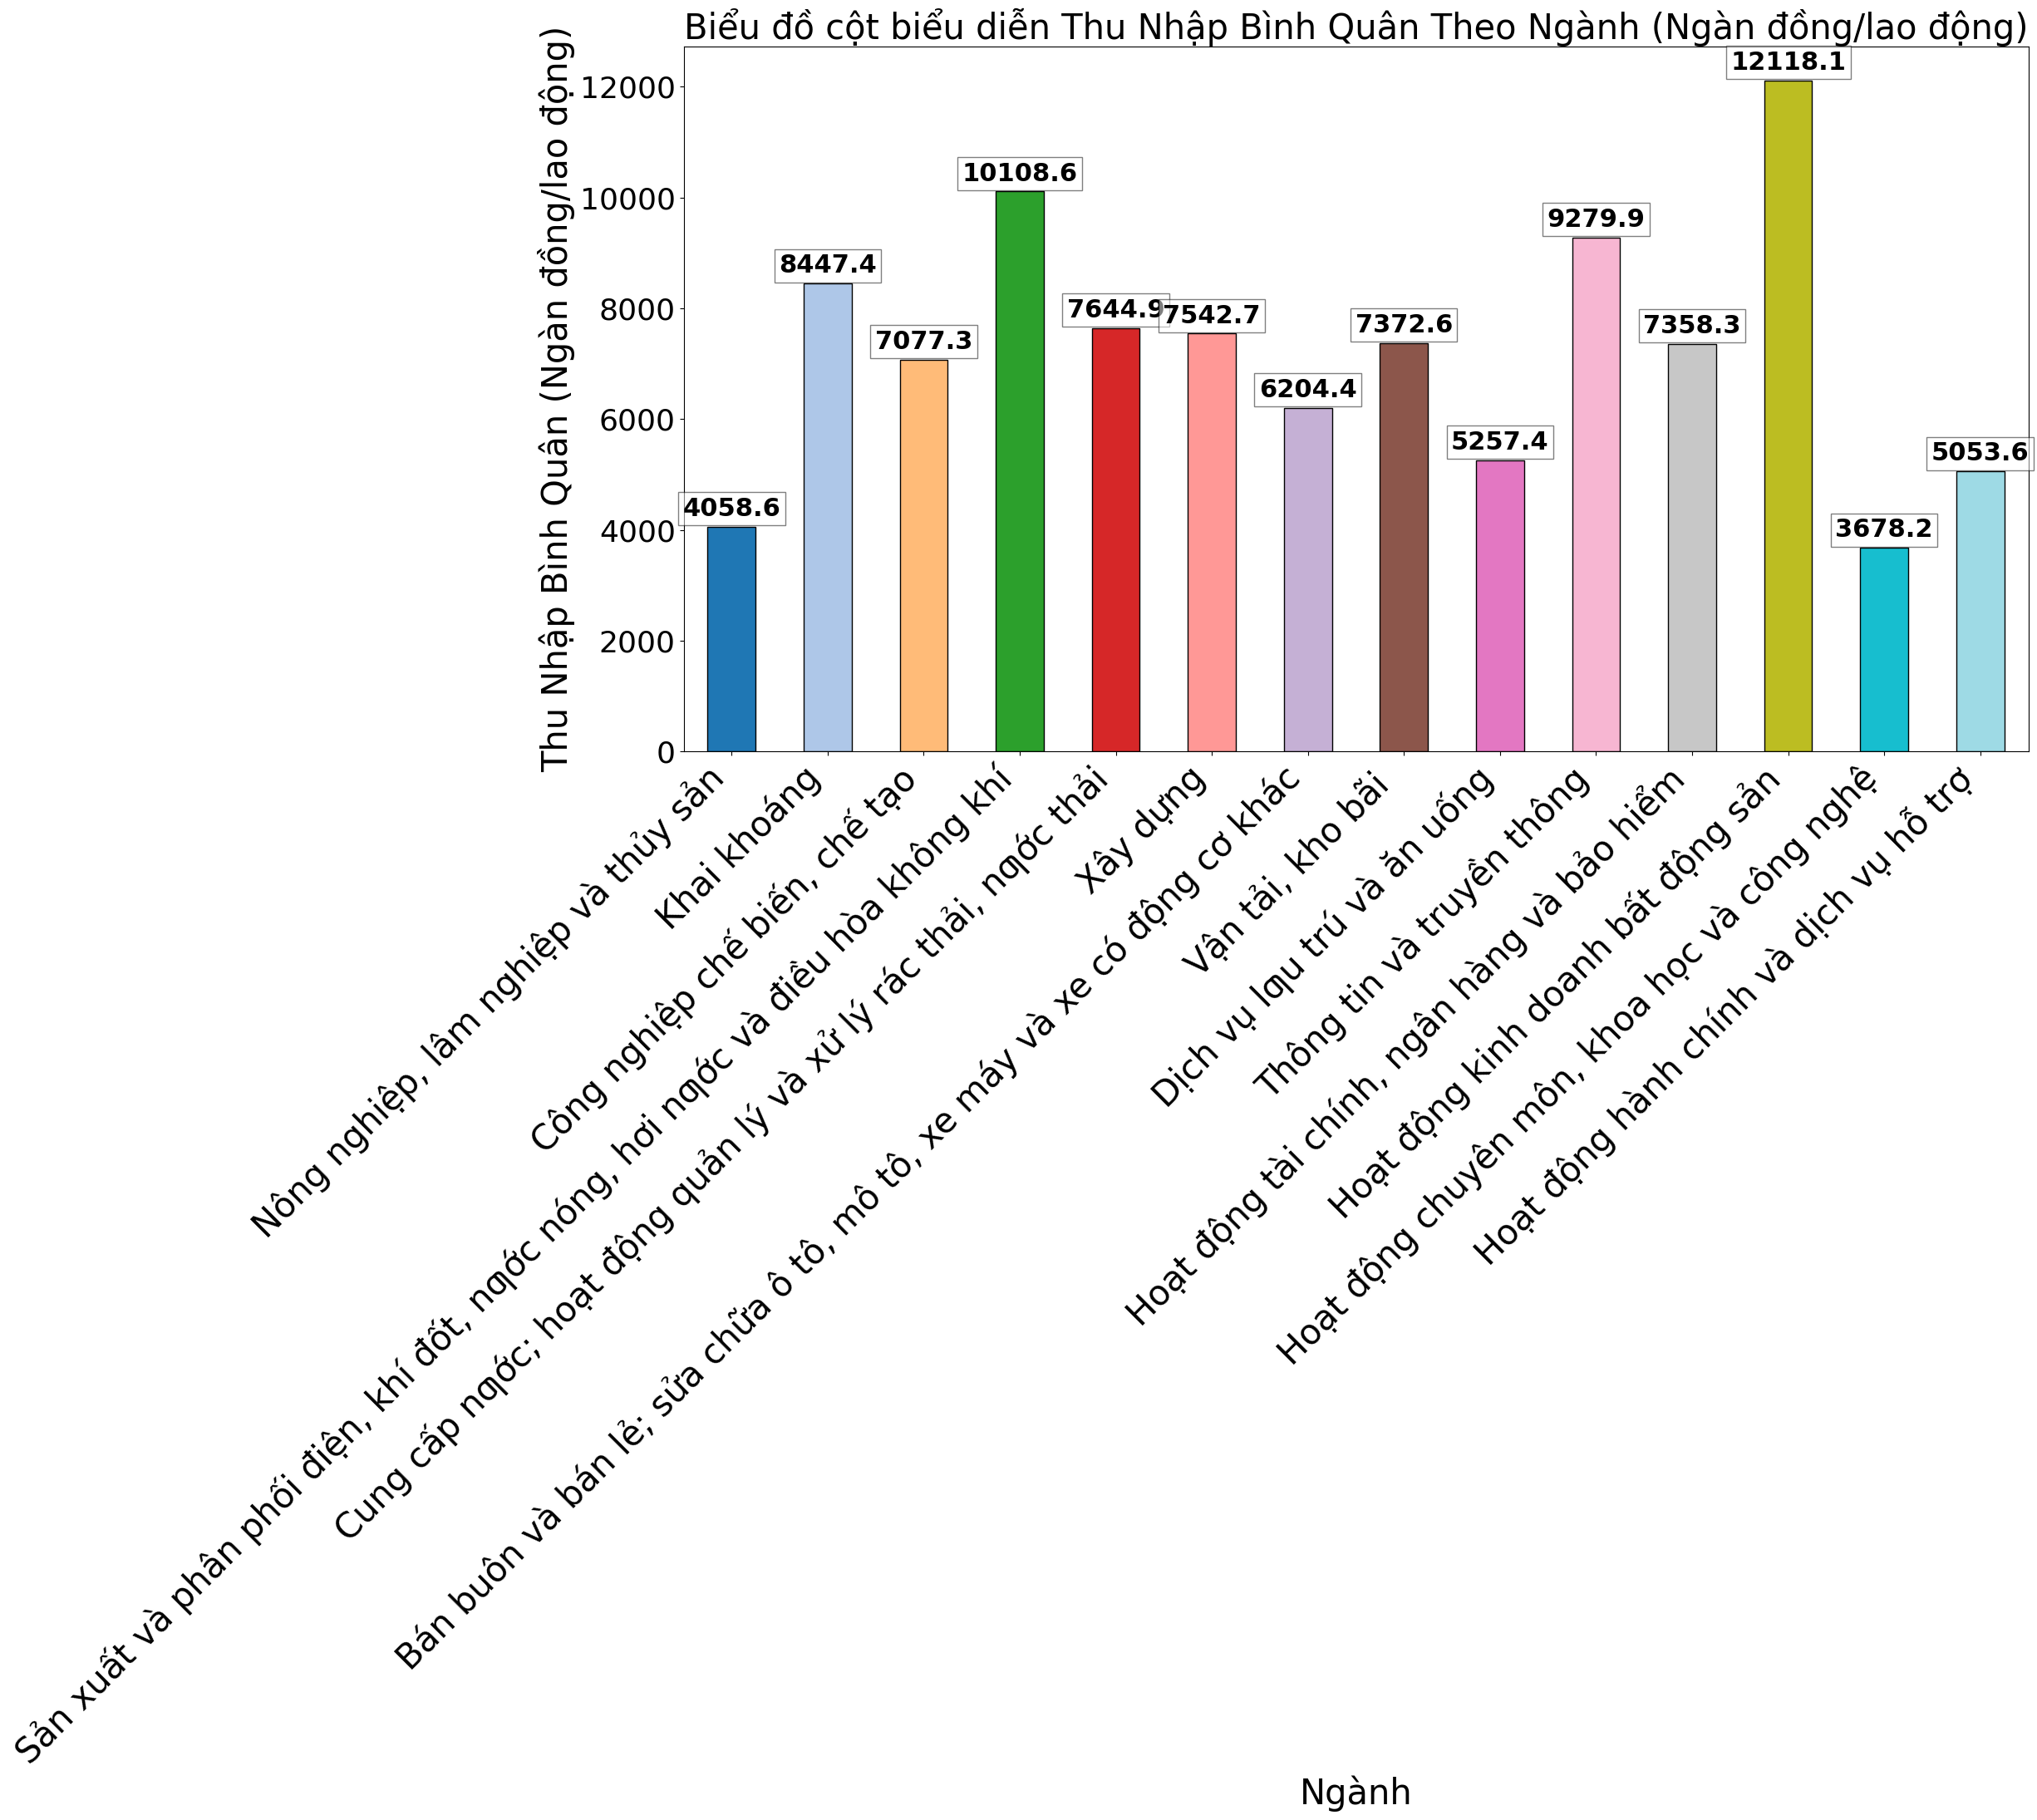

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Tạo figure và axes với kích thước lớn hơn
fig, ax = plt.subplots(figsize=(24, 22))  # Tăng kích thước của figure để làm biểu đồ lớn hơn

# Chọn màu sắc cho từng cột (số lượng màu sắc phải bằng số ngành)
colors = plt.cm.tab20(np.linspace(0, 1, len(df_thu_nhap_bq)))

# Vẽ biểu đồ cột với các màu sắc khác nhau
bars = df_thu_nhap_bq.set_index('Tên Ngành')['Thu Nhập Bình Quân'].plot(kind='bar', color=colors, ax=ax, edgecolor='black')

# Đặt tiêu đề và nhãn trục
ax.set_title('Biểu đồ cột biểu diễn Thu Nhập Bình Quân Theo Ngành (Ngàn đồng/lao động)', fontsize=30)
ax.set_xlabel('Ngành', fontsize=30)
ax.set_ylabel('Thu Nhập Bình Quân (Ngàn đồng/lao động)', fontsize=30)

# Xoay nhãn trục x để dễ đọc và tăng kích thước chữ
plt.xticks(rotation=45, ha='right', fontsize=30)  # Thay đổi fontsize tại đây

# Hiển thị giá trị trên mỗi cột
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    # Thêm khoảng cách bbox để tránh giá trị bị cắt
    ax.annotate(f'{height:.1f}', 
                (x, height), 
                ha='center', va='bottom', 
                xytext=(0, 5),  # Tăng khoảng cách giữa giá trị và cột
                textcoords='offset points', 
                fontsize=22, 
                weight='bold', 
                bbox=dict(facecolor='white', alpha=0.5))  # Bố cục đẹp hơn với nền trắng mờ
plt.yticks(fontsize=26)  # Tăng kích thước phông chữ của nhãn trục y

# Loại bỏ chú thích
# ax.legend(handles, labels, title='Ngành', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Căn chỉnh bố cục để không bị cắt
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


>Phân bố dân tộc theo từng xã

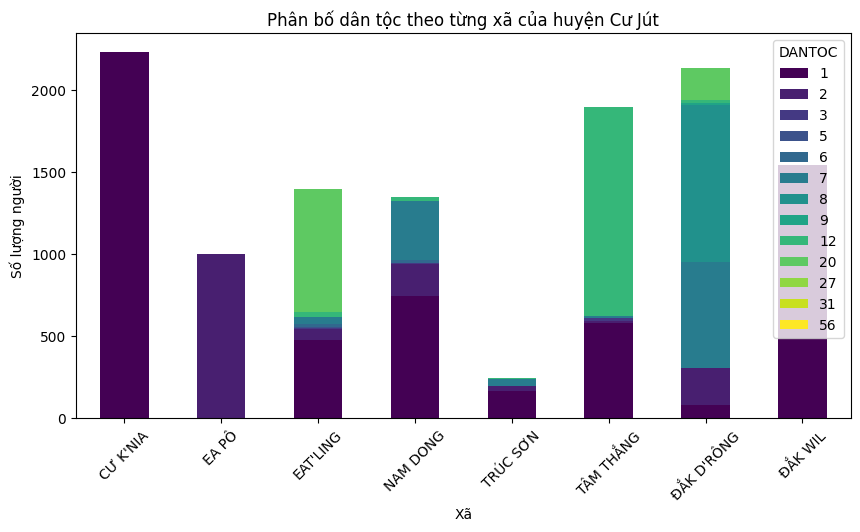

In [56]:
# Nhóm theo xã và dân tộc, sau đó đếm số lượng
dan_toc_theo_xa = df_huyen_cu_jut.groupby(['XA', 'DANTOC']).size().unstack().fillna(0)

# Vẽ biểu đồ với màu sắc khác nhau
dan_toc_theo_xa.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='viridis')

plt.xlabel('Xã')
plt.ylabel('Số lượng người')
plt.title('Phân bố dân tộc theo từng xã của huyện Cư Jút')
plt.xticks(rotation=45)
plt.show()


#### Quan sát biểu đồ ta thấy:
+ Phân bố dân tộc chủ yếu đa dạng
+ Phần lớn thì dân tộc số 1, số 6 chiếm ưu thế

> Phân bố tuổi trung bình theo giới tính

C:\Users\hdang\AppData\Local\Temp\ipykernel_16776\1884477157.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_huyen_cu_jut['NGAY_SINH'] = pd.to_datetime(df_huyen_cu_jut['NGAY_SINH'], errors='coerce')


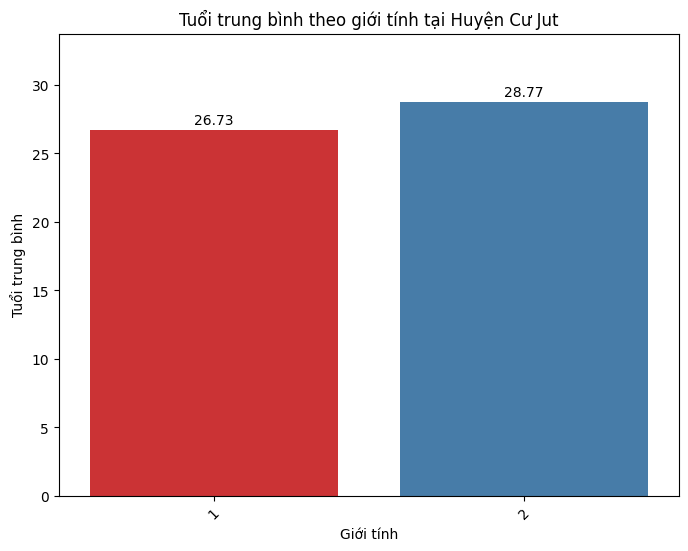

In [57]:
# Chuyển đổi 'NGAY_SINH' sang định dạng datetime
df_huyen_cu_jut['NGAY_SINH'] = pd.to_datetime(df_huyen_cu_jut['NGAY_SINH'], errors='coerce')

# Tính tuổi
today = pd.Timestamp('now')
df_huyen_cu_jut['Tuổi'] = (today - df_huyen_cu_jut['NGAY_SINH']).dt.days // 365

# Tạo biến nhóm theo giới tính và tính tuổi trung bình
df_age_gender = df_huyen_cu_jut.groupby('GIOI_TINH')['Tuổi'].mean().reset_index()

# Vẽ biểu đồ cột thể hiện tuổi trung bình theo giới tính
plt.figure(figsize=(8, 6))
sns.barplot(data=df_age_gender, x='GIOI_TINH', y='Tuổi', palette='Set1')

# Thêm chú thích và chỉnh sửa các thông số
plt.title('Tuổi trung bình theo giới tính tại Huyện Cư Jut')
plt.xlabel('Giới tính')
plt.ylabel('Tuổi trung bình')
plt.xticks(rotation=45)
plt.ylim(0, df_age_gender['Tuổi'].max() + 5)  # Điều chỉnh giới hạn trục y

# Thêm chú thích giới tính vào biểu đồ
for i, v in enumerate(df_age_gender['Tuổi']):
    plt.text(i, v + 0.2, str(round(v, 2)), ha='center', va='bottom')

# Hiển thị biểu đồ
plt.show()

##### Quan sát biểu đồ ta thấy
- Độ tuổi trung bình của nam là khoảng 27 tuổi
- Độ tuổi trung bình của nữ là khoảng 30 tuổi
- Độ tuổi trung bình của nữ cao hơn so với nam có thể phản ánh sự đa dạng trong cấu trúc dân số.
- Sự khác biệt này có thể do phân bố công việc, nhu cầu hỗ trợ gia đình, hoặc yếu tố văn hóa địa phương.

### 2.2. Phân tích suy luận

>  Phân bố giới tính và phân loại nghèo/cận nghèo

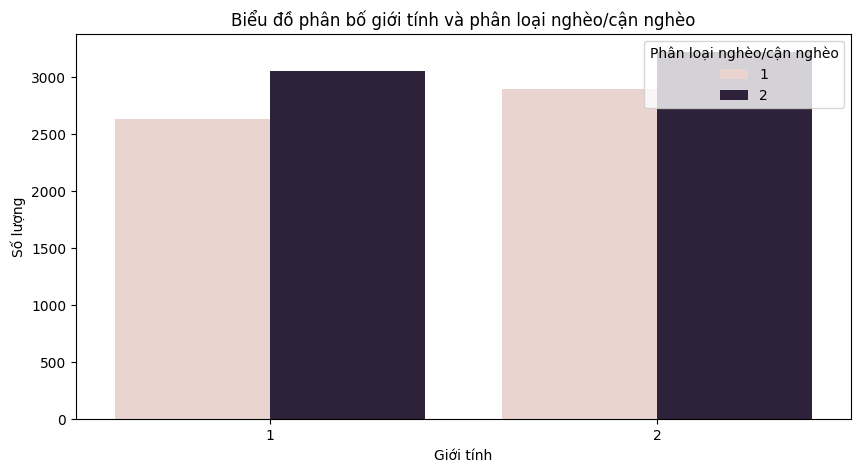

In [58]:
plt.figure(figsize=(10, 5))
sns.countplot(x='GIOI_TINH', hue='PHAN_LOAI_HO', data=df_huyen_cu_jut)
plt.title('Biểu đồ phân bố giới tính và phân loại nghèo/cận nghèo')
plt.xlabel('Giới tính')
plt.ylabel('Số lượng')
plt.legend(title='Phân loại nghèo/cận nghèo', loc='upper right')
plt.show()

##### Quan sát biểu đồ ta thấy được:
- Ở huyện cư jut thì giới tính là nam có điều kiện kinh tế tốt hơn so với nữ
- Bởi vì, số lượng hộ nghèo và hộ cần nghèo của nam chiếm ít hơn
- Vì thế nếu nhà nước có những chính sách hỗ trợ thì nên ưu tiên hỗ trợ cho nữ nhiều hơn


> Phân bố dân tộc và phân loại nghèo/cận nghèo

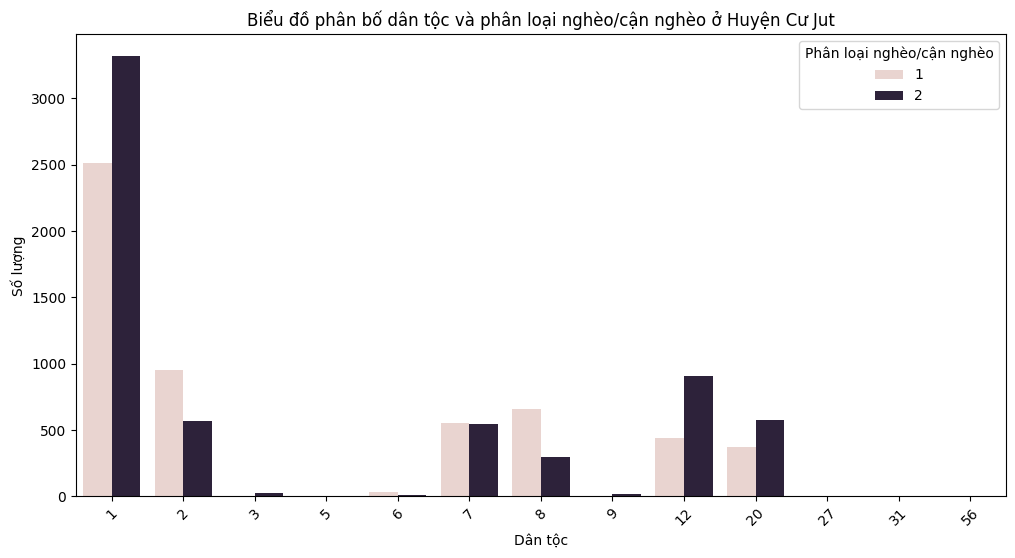

In [59]:
plt.figure(figsize=(12, 6))
sns.countplot(x='DANTOC', hue='PHAN_LOAI_HO', data=df_huyen_cu_jut)
plt.title('Biểu đồ phân bố dân tộc và phân loại nghèo/cận nghèo ở Huyện Cư Jut')
plt.xlabel('Dân tộc')
plt.ylabel('Số lượng')
plt.legend(title='Phân loại nghèo/cận nghèo', loc='upper right')
plt.xticks(rotation=45)
plt.show()

##### Quan sát biểu đồ ta thấy :
- Dân tộc số 1 là nhiều người thuộc hộ nghèo và cận nghèo nhất
- Dân tộc số 5 là ít người thuộc hộ nghèo và hộ cận nghèo nhất
- Từ đó cho thấy nếu nhà nước có những chính sách hỗ trợ người nghèo/cận nghèo thì nên ưu tiên hỗ trợ cho dân tộc số 1 trước


> Phân bố tuổi của các thành viên trong hộ gia đình 

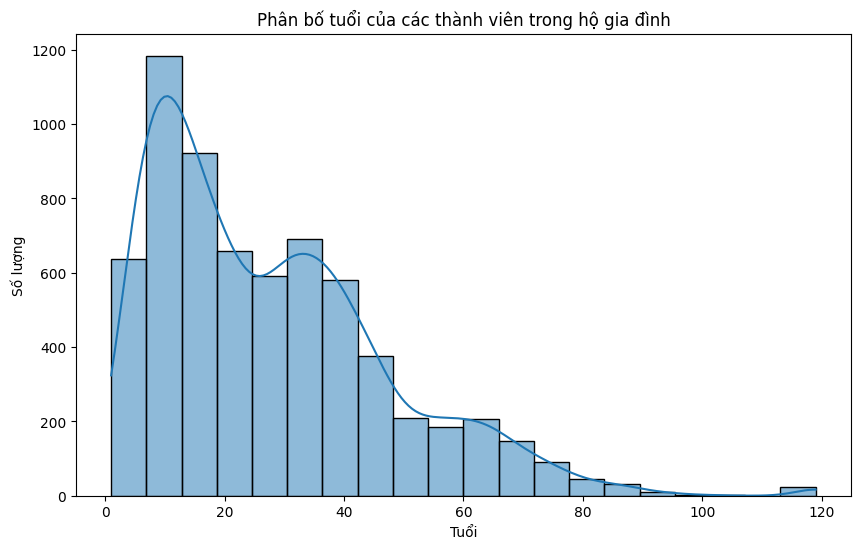

In [60]:
# Chuyển đổi cột ngày sinh thành kiểu datetime
df_huyen_cu_jut['NGAY_SINH'] = pd.to_datetime(df_huyen_cu_jut['NGAY_SINH'], errors='coerce')

# Tính tuổi của mỗi thành viên
today = pd.Timestamp('now')
df_huyen_cu_jut['Tuoi'] = (today - df_huyen_cu_jut['NGAY_SINH']).dt.days // 365

# Biểu đồ phân bố tuổi
plt.figure(figsize=(10, 6))
sns.histplot(data=df_huyen_cu_jut, x='Tuoi', bins=20, kde=True)
plt.title('Phân bố tuổi của các thành viên trong hộ gia đình')
plt.xlabel('Tuổi')
plt.ylabel('Số lượng')
plt.show()


> Quan sát biểu đồ ta thấy
- Phân bố đa dạng ở nhiều độ tuổi khác nhau
- Phần lớn tập chung ở 10 - 19  tuổi
- Tư đó cho thấy số lượng trẻ vị thành niên ở các hộ gia đình rất nhiều cho nên nhà nước cần ưu tiên các chính sách hỗ trợ thêm cho trẻ vị thành niên

> Phân bố mối quan hệ trong hộ gia đình

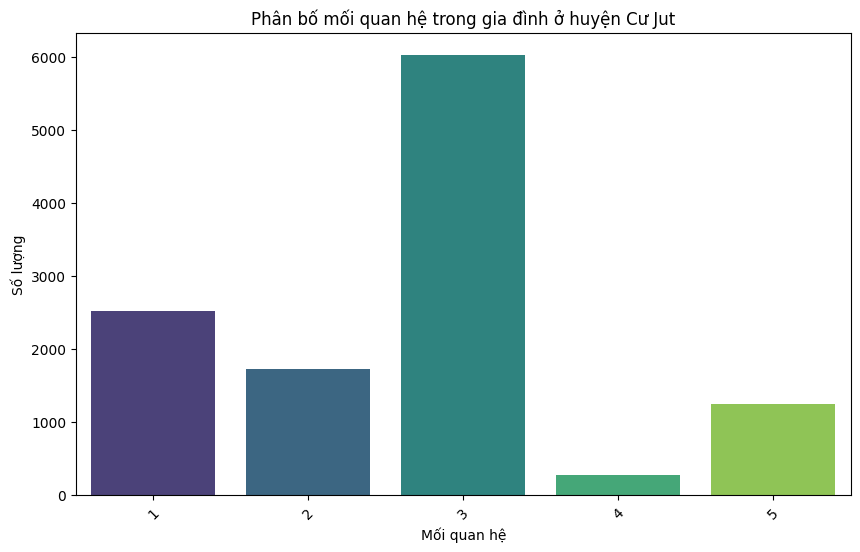

In [61]:
moi_quan_he = df_huyen_cu_jut['QUANHE_CHUHO'].value_counts()

# Vẽ biểu đồ cột thể hiện phân phối mối quan hệ trong gia đình
plt.figure(figsize=(10, 6))
sns.barplot(x=moi_quan_he.index, y=moi_quan_he.values, palette='viridis')
plt.title('Phân bố mối quan hệ trong gia đình ở huyện Cư Jut')
plt.xlabel('Mối quan hệ')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.show()

##### Quan sát biểu đồ ta thấy được
- Quan hệ số 3 chiếm ưu thế 
- Quan hệ số 4 là thấp nhất 

> Phân bố nghèo/cận nghèo theo từng xã trong huyện Cư Jut

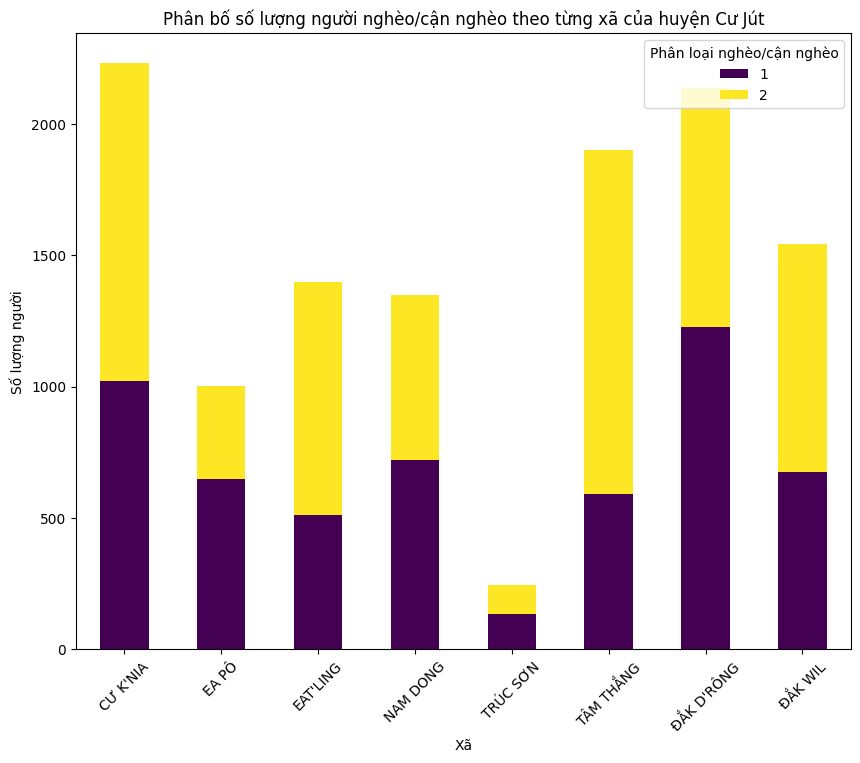

In [62]:
# Nhóm theo xã và phân loại nghèo/cận nghèo, sau đó đếm số lượng
phan_loai_nguoi_theo_xa = df_huyen_cu_jut[df_huyen_cu_jut['PHAN_LOAI_HO'].isin([1, 2])].groupby(['XA', 'PHAN_LOAI_HO']).size().unstack().fillna(0)

# Vẽ biểu đồ cột stacked
phan_loai_nguoi_theo_xa.plot(kind='bar', stacked=True, figsize=(10, 8), colormap='viridis')

plt.xlabel('Xã')
plt.ylabel('Số lượng người')
plt.title('Phân bố số lượng người nghèo/cận nghèo theo từng xã của huyện Cư Jút')
plt.xticks(rotation=45)
plt.legend(title='Phân loại nghèo/cận nghèo', loc='upper right')
plt.show()


##### Quan sát biểu đồ ta thấy được:
- Số lượng người nghèo và cận nghèo ở xã Cư K'NIA là nhiều nhất
- Số lượng người nghèo và cận nghèo ở xã Trúc Sơn là ít nhất
- Số lượng người nghèo tập trung nhiều ở xã Đăks D'Rông.Bởi vì toàn bộ xã đó toàn là người nghèo
- Từ đó nhà nước nên có những chính sách hỗ trợ người nghèo/cận nghèo ở những xã như: Cư K'NIA và xã ĐẮK D'Rông nên ưu tiên hỗ trợ họ trước

> Phân bố theo nhóm tuổi

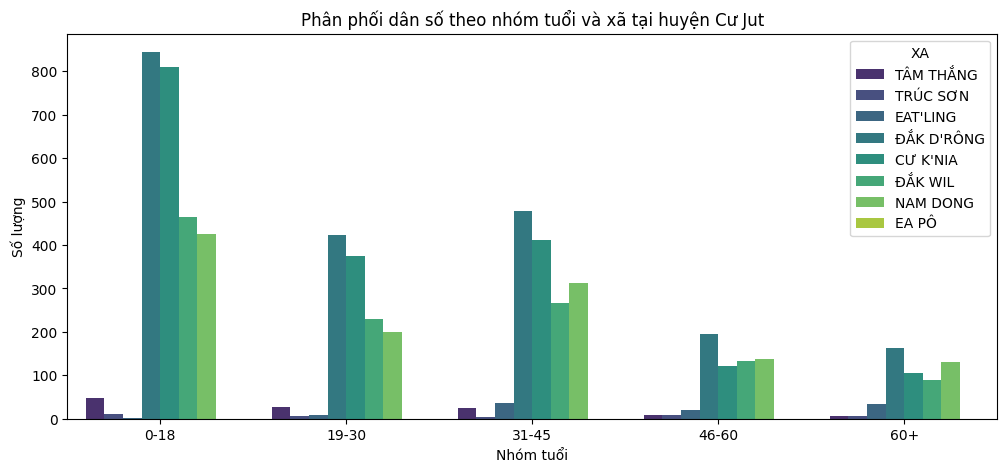

In [63]:
bins = [0, 18, 30, 45, 60, 100]
labels = ['0-18', '19-30', '31-45', '46-60', '60+']
df_huyen_cu_jut['Nhóm tuổi'] = pd.cut(df_huyen_cu_jut['Tuoi'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 5))
sns.countplot(data=df_huyen_cu_jut, x='Nhóm tuổi', hue='XA', palette='viridis')

plt.title('Phân phối dân số theo nhóm tuổi và xã tại huyện Cư Jut')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Số lượng')

plt.show()


> Quan sát biểu đồ ta thấy:
- Phần lớn dân số phân bố dều ở các nhóm tuổi nhưng tập chung chủ yếu ở xã Tâm Thắng và Xã EAT'LING
- Dân số thuộc nhóm tuổi vị thành niên chiếm số lượng dân số lớn nhất
- Dân số thuộc nhóm tuổi lao động ở đây cộng lại cũng chiếm số lượng lớn

> Dân Tộc

In [64]:
df_tong_hop.columns

Index(['STT_HO', 'HO_TEN_CHU_HO', 'HO_TEN_THANH_VIEN', 'QUANHE_CHUHO',
       'NGAY_SINH', 'GIOI_TINH', 'SO_CCCD', 'TINH', 'HUYEN', 'XA', 'DANTOC',
       'PHAN_LOAI_HO', 'TUOI', 'Group'],
      dtype='object')

In [65]:
# Chuyển đổi dữ liệu
df_dantoc_summary = df_tong_hop.groupby(['DANTOC', 'HUYEN', 'PHAN_LOAI_HO']).size().unstack(fill_value=0).reset_index()
df_dantoc_summary.columns.name = None
df_dantoc_summary.rename(columns={1: 'So_luong_ngheo', 2: 'So_luong_can_ngheo'}, inplace=True)

# Chuyển dữ liệu sang định dạng dài hơn để dễ sử dụng với seaborn
df_dantoc_melt = df_dantoc_summary.melt(id_vars=['DANTOC', 'HUYEN'], value_vars=['So_luong_ngheo', 'So_luong_can_ngheo'],
                                        var_name='Loai', value_name='So_luong')

# Lấy danh sách các huyện
huyen_list = df_dantoc_melt['HUYEN'].unique()

# Tạo thư mục để lưu hình ảnh nếu chưa có
output_dir = 'bieu_do_theo_huyen'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Tạo một danh sách các bảng màu sắc cho mỗi huyện
palette_list = sns.color_palette("tab20", len(huyen_list))

# Vẽ và lưu biểu đồ cho từng huyện
for i, huyen in enumerate(huyen_list):
    df_huyen = df_dantoc_melt[df_dantoc_melt['HUYEN'] == huyen]
    
    plt.figure(figsize=(12, 8))
    
    # Sử dụng bảng màu sắc cho từng huyện
    ax = sns.barplot(x='DANTOC', y='So_luong', hue='Loai', data=df_huyen, ci=None, palette=palette_list)
    
    # Thêm tiêu đề và nhãn trục
    plt.title(f'Phân bố số lượng người nghèo và cận nghèo theo dân tộc - {huyen}', fontsize=18)
    plt.xlabel('Dân tộc', fontsize=14)
    plt.ylabel('Số lượng người', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    
    # Thêm nhãn số lượng trên đầu các cột
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(format(height, '.0f'),
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center',
                        xytext=(0, 10),
                        textcoords='offset points',
                        fontsize=10,
                        color='black')
    
    # Lưu hình ảnh
    plt.tight_layout()
    plt.savefig(f'{output_dir}/{huyen}.png', dpi=300)
    plt.close()

print("Đã lưu tất cả các biểu đồ.")

# In danh sách số liệu của từng huyện
print("\nDanh sách số liệu từng huyện:")
for huyen in huyen_list:
    df_huyen = df_dantoc_melt[df_dantoc_melt['HUYEN'] == huyen]
    print(f"\nHuyện: {huyen}")
    print(df_huyen)

C:\Users\hdang\AppData\Local\Temp\ipykernel_16776\3697080849.py:28: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax = sns.barplot(x='DANTOC', y='So_luong', hue='Loai', data=df_huyen, ci=None, palette=palette_list)
C:\Users\hdang\AppData\Local\Temp\ipykernel_16776\3697080849.py:28: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax = sns.barplot(x='DANTOC', y='So_luong', hue='Loai', data=df_huyen, ci=None, palette=palette_list)
C:\Users\hdang\AppData\Local\Temp\ipykernel_16776\3697080849.py:28: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax = sns.barplot(x='DANTOC', y='So_luong', hue='Loai', data=df_huyen, ci=None, palette=palette_list)
C:\Users\hdang\AppData\Local\Temp\ipykernel_16776\3697080849.py:28: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax = sns.barplot(x='DANTOC', y='So_luong'

Đã lưu tất cả các biểu đồ.

Danh sách số liệu từng huyện:

Huyện: CƯ JUT
          DANTOC   HUYEN                Loai  So_luong
0             56  CƯ JUT      So_luong_ngheo         0
21           Dao  CƯ JUT      So_luong_ngheo         0
35    Gié-Triêng  CƯ JUT      So_luong_ngheo         1
37   HMông (Mèo)  CƯ JUT      So_luong_ngheo       660
52         Khmer  CƯ JUT      So_luong_ngheo         2
60   Kinh (Việt)  CƯ JUT      So_luong_ngheo      2516
69        M'Nông  CƯ JUT      So_luong_ngheo       373
77         Mường  CƯ JUT      So_luong_ngheo        31
91          Nùng  CƯ JUT      So_luong_ngheo       550
111        Ta Ôi  CƯ JUT      So_luong_ngheo         0
112         Thái  CƯ JUT      So_luong_ngheo         3
125          Tày  CƯ JUT      So_luong_ngheo       955
141         Ê-đê  CƯ JUT      So_luong_ngheo       440
147           56  CƯ JUT  So_luong_can_ngheo         1
168          Dao  CƯ JUT  So_luong_can_ngheo        17
182   Gié-Triêng  CƯ JUT  So_luong_can_ngheo   

> Huyện Đắk Glong

In [66]:

df_dantoc_summary = df_tong_hop.groupby(['DANTOC', 'HUYEN','XA', 'PHAN_LOAI_HO']).size().unstack(fill_value=0).reset_index()
df_dantoc_summary.columns.name = None
df_dantoc_summary.rename(columns={1: 'So_luong_ngheo', 2: 'So_luong_can_ngheo'}, inplace=True)
# Chuyển dữ liệu sang định dạng dài hơn để dễ sử dụng với seaborn
df_dantoc_melt = df_dantoc_summary.melt(id_vars=['DANTOC', 'HUYEN', 'XA'], value_vars=['So_luong_ngheo', 'So_luong_can_ngheo'],
                                        var_name='Loai', value_name='So_luong')

# Lọc dữ liệu cho huyện Đắk Glong
df_dak_glong = df_dantoc_melt[df_dantoc_melt['HUYEN'] == 'ĐẮK GLONG']

# Lấy danh sách các xã trong huyện Đắk Glong
xa_list = df_dak_glong['XA'].unique()

# Tạo thư mục để lưu hình ảnh nếu chưa có
output_dir = 'biểu đồ_theo_xa_dak_glong'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Vẽ và lưu biểu đồ cho từng xã
for xa in xa_list:
    df_xa = df_dak_glong[df_dak_glong['XA'] == xa]
    
    plt.figure(figsize=(12, 8))
    
    # Vẽ biểu đồ cột cho từng xã
    ax = sns.barplot(x='DANTOC', y='So_luong', hue='Loai', data=df_xa, palette='viridis', ci=None)
    
    # Thêm tiêu đề và nhãn trục
    plt.title(f'Phân bố số lượng người nghèo và cận nghèo theo dân tộc - {xa}', fontsize=18)
    plt.xlabel('Dân tộc', fontsize=14)
    plt.ylabel('Số lượng người', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)  # Đổi góc nghiêng nhãn trục x để dễ đọc
    plt.yticks(fontsize=12)
    
    # Thêm nhãn số lượng trên đầu các cột
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(format(height, '.0f'),
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center',
                        xytext=(0, 10),  # Tăng khoảng cách giữa nhãn và cột
                        textcoords='offset points',
                        fontsize=10,
                        color='black')  # Đặt màu chữ cho nhãn
    
    # Lưu hình ảnh
    plt.tight_layout()
    plt.savefig(f'{output_dir}/{xa}.png', dpi=300)
    plt.close()

print("Đã lưu tất cả các biểu đồ.")

# In danh sách số liệu của từng xã
print("\nDanh sách số liệu từng xã:")
for xa in xa_list:
    df_xa = df_dak_glong[df_dak_glong['XA'] == xa]
    print(f"\nXã: {xa}")
    print(df_xa)


Đã lưu tất cả các biểu đồ.

Danh sách số liệu từng xã:

Xã: QUẢNG KHÊ
                            DANTOC      HUYEN         XA                Loai  \
3                               56  ĐẮK GLONG  QUẢNG KHÊ      So_luong_ngheo   
17                     Chăm (chàm)  ĐẮK GLONG  QUẢNG KHÊ      So_luong_ngheo   
54                             Dao  ĐẮK GLONG  QUẢNG KHÊ      So_luong_ngheo   
79                            Giáy  ĐẮK GLONG  QUẢNG KHÊ      So_luong_ngheo   
110                      Hoa (Hán)  ĐẮK GLONG  QUẢNG KHÊ      So_luong_ngheo   
138                          Khmer  ĐẮK GLONG  QUẢNG KHÊ      So_luong_ngheo   
183                    Kinh (Việt)  ĐẮK GLONG  QUẢNG KHÊ      So_luong_ngheo   
242                         M'Nông  ĐẮK GLONG  QUẢNG KHÊ      So_luong_ngheo   
284                          Mường  ĐẮK GLONG  QUẢNG KHÊ      So_luong_ngheo   
311                             Mạ  ĐẮK GLONG  QUẢNG KHÊ      So_luong_ngheo   
342                           Nùng  ĐẮK GLONG  QUẢ

In [67]:
df_xa_cu=pd.read_excel("../data_origin/HUYỆN CƯ JUT.xlsx",sheet_name='Cư Knia')

In [68]:
df_xa_cu.shape

(2248, 20)

In [69]:
df_xa_cu.tail(5)

Năm rà soát  STT_HO    LOẠI HỘ      KHU VỰC        MÃ THÔN  \
2243       2022.0     NaN        NEW  COUNTRYSIDE  thon12-cuknia   
2244       2022.0     NaN        NEW  COUNTRYSIDE  thon12-cuknia   
2245          NaN     NaN       Tổng          NaN            NaN   
2246          NaN     NaN   HỘ NGHÈO          NaN            NaN   
2247          NaN     NaN  CẬN NGHÈO          NaN            NaN   

      HO_TEN_CHU_HO HO_TEN_THANH_VIEN       SO_CCCD QUANHE_CHUHO  Năm sinh  \
2243  HOÀNG VĂN LỰU     HOÀNG YẾN NHI  067314006518        CHILD    2014.0   
2244  HOÀNG VĂN LỰU     HOÀNG TỐ UYÊN  067316003780        CHILD    2016.0   
2245           2245               NaN           NaN          NaN       NaN   
2246           1027               NaN           NaN          NaN       NaN   
2247           1218               NaN           NaN          NaN       NaN   

      Tháng sinh NGAY_SINH DAN TOC GIOI_TINH PHAN_LOAI_HO      TINH   HUYEN  \
2243        11.0        28     TAY    FEMALE    NEAR_POOR  ĐẮK NÔNG  CƯ JUT   
2244         7.0        10     TAY      MALE    NEAR_POOR  ĐẮK NÔNG  CƯ JUT   
2245         NaN       NaN     NaN       NaN          NaN       NaN     NaN   
2246         NaN       NaN     NaN       NaN          NaN       NaN     NaN   
2247         NaN       NaN     NaN       NaN          NaN       NaN     NaN   

            XA THÔN TỔ ẤP NGAY_SINH.1  
2243  CƯ K'NIA    Thôn 12  28/11/2014  
2244  CƯ K'NIA    Thôn 12  10/07/2016  
2245       NaN        NaN         NaN  
2246       NaN        NaN         NaN  
2247       NaN        NaN         NaN

In [70]:
df_cujut=pd.read_excel("../data_origin/HUYỆN CƯ JUT.xlsx")

In [71]:
df_cujut[df_cujut['XA']=="CƯ K'NIA"].shape

(2245, 26)

> Cư Jut


In [72]:
df_huyen_cu_jut[df_huyen_cu_jut['XA']=="CƯ K'NIA"].shape

(2232, 19)

In [73]:

# Chuyển đổi dữ liệu
df_dantoc_summary = df_tong_hop.groupby(['DANTOC', 'HUYEN', 'XA', 'PHAN_LOAI_HO']).size().unstack(fill_value=0).reset_index()
df_dantoc_summary.columns.name = None
df_dantoc_summary.rename(columns={1: 'So_luong_ngheo', 2: 'So_luong_can_ngheo'}, inplace=True)

# Chuyển dữ liệu sang định dạng dài hơn để dễ sử dụng với seaborn
df_dantoc_melt = df_dantoc_summary.melt(id_vars=['DANTOC', 'HUYEN', 'XA'], value_vars=['So_luong_ngheo', 'So_luong_can_ngheo'],
                                        var_name='Loai', value_name='So_luong')

# Lọc dữ liệu cho huyện Cư Jút
df_cu_jut = df_dantoc_melt[df_dantoc_melt['HUYEN'] == 'CƯ JUT']

# Lấy danh sách các xã trong huyện Cư Jút
xa_list = df_cu_jut['XA'].unique()

# Tạo thư mục để lưu hình ảnh nếu chưa có
output_dir = 'bieu_do_theo_xa_cu_jut'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Vẽ và lưu biểu đồ cho từng xã
for xa in xa_list:
    df_xa = df_cu_jut[df_cu_jut['XA'] == xa]
    
    plt.figure(figsize=(12, 8))
    
    # Vẽ biểu đồ cột cho từng xã
    ax = sns.barplot(x='DANTOC', y='So_luong', hue='Loai', data=df_xa, palette='viridis', ci=None)
    
    # Thêm tiêu đề và nhãn trục
    plt.title(f'Phân bố số lượng người nghèo và cận nghèo theo dân tộc - {xa}', fontsize=18)
    plt.xlabel('Dân tộc', fontsize=14)
    plt.ylabel('Số lượng người', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)  # Đổi góc nghiêng nhãn trục x để dễ đọc
    plt.yticks(fontsize=12)
    
    # Thêm nhãn số lượng trên đầu các cột
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(format(height, '.0f'),
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center',
                        xytext=(0, 10),  # Tăng khoảng cách giữa nhãn và cột
                        textcoords='offset points',
                        fontsize=10,
                        color='black')  # Đặt màu chữ cho nhãn
    
    # Lưu hình ảnh
    plt.tight_layout()
    plt.savefig(f'{output_dir}/{xa}.png', dpi=300)
    plt.close()

print("Đã lưu tất cả các biểu đồ.")

# In danh sách số liệu của từng xã
print("\nDanh sách số liệu từng xã:")
for xa in xa_list:
    df_xa = df_cu_jut[df_cu_jut['XA'] == xa]
    print(f"\nXã: {xa}")
    print(df_xa)

Đã lưu tất cả các biểu đồ.

Danh sách số liệu từng xã:

Xã: EAT'LING
           DANTOC   HUYEN        XA                Loai  So_luong
0              56  CƯ JUT  EAT'LING      So_luong_ngheo         0
129         Khmer  CƯ JUT  EAT'LING      So_luong_ngheo         2
151   Kinh (Việt)  CƯ JUT  EAT'LING      So_luong_ngheo       141
219        M'Nông  CƯ JUT  EAT'LING      So_luong_ngheo       317
264         Mường  CƯ JUT  EAT'LING      So_luong_ngheo        12
321          Nùng  CƯ JUT  EAT'LING      So_luong_ngheo        11
394          Thái  CƯ JUT  EAT'LING      So_luong_ngheo         1
443           Tày  CƯ JUT  EAT'LING      So_luong_ngheo        22
505          Ê-đê  CƯ JUT  EAT'LING      So_luong_ngheo         5
535            56  CƯ JUT  EAT'LING  So_luong_can_ngheo         1
664         Khmer  CƯ JUT  EAT'LING  So_luong_can_ngheo         5
686   Kinh (Việt)  CƯ JUT  EAT'LING  So_luong_can_ngheo       336
754        M'Nông  CƯ JUT  EAT'LING  So_luong_can_ngheo       432
799    

In [74]:
# Chuyển đổi dữ liệu
df_dantoc_summary = df_tong_hop.groupby(['DANTOC', 'HUYEN', 'XA', 'PHAN_LOAI_HO']).size().unstack(fill_value=0).reset_index()
df_dantoc_summary.columns.name = None
df_dantoc_summary.rename(columns={1: 'So_luong_ngheo', 2: 'So_luong_can_ngheo'}, inplace=True)

# Chuyển dữ liệu sang định dạng dài hơn để dễ sử dụng với seaborn
df_dantoc_melt = df_dantoc_summary.melt(id_vars=['DANTOC', 'HUYEN', 'XA'], value_vars=['So_luong_ngheo', 'So_luong_can_ngheo'],
                                        var_name='Loai', value_name='So_luong')

# Lọc dữ liệu cho huyện Đắk R'Lấp
df_dak_rlap = df_dantoc_melt[df_dantoc_melt['HUYEN'] == "ĐẮK RLẤP"]

# Lấy danh sách các xã trong huyện Đắk R'Lấp
xa_list = df_dak_rlap['XA'].unique()

# Tạo thư mục để lưu hình ảnh nếu chưa có
output_dir = 'bieu_do_theo_xa_dak_rlap'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Vẽ và lưu biểu đồ cho từng xã
for xa in xa_list:
    df_xa = df_dak_rlap[df_dak_rlap['XA'] == xa]
    
    plt.figure(figsize=(12, 8))
    
    # Vẽ biểu đồ cột cho từng xã
    ax = sns.barplot(x='DANTOC', y='So_luong', hue='Loai', data=df_xa, palette='viridis', ci=None)
    
    # Thêm tiêu đề và nhãn trục
    plt.title(f'Phân bố số lượng người nghèo và cận nghèo theo dân tộc - {xa}', fontsize=18)
    plt.xlabel('Dân tộc', fontsize=14)
    plt.ylabel('Số lượng người', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)  # Đổi góc nghiêng nhãn trục x để dễ đọc
    plt.yticks(fontsize=12)
    
    # Thêm nhãn số lượng trên đầu các cột
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(format(height, '.0f'),
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center',
                        xytext=(0, 10),  # Tăng khoảng cách giữa nhãn và cột
                        textcoords='offset points',
                        fontsize=10,
                        color='black')  # Đặt màu chữ cho nhãn
    
    # Lưu hình ảnh
    plt.tight_layout()
    plt.savefig(f'{output_dir}/{xa}.png', dpi=300)
    plt.close()

print("Đã lưu tất cả các biểu đồ cho huyện Đắk R'Lấp.")

# In danh sách số liệu của từng xã
print("\nDanh sách số liệu từng xã:")
for xa in xa_list:
    df_xa = df_dak_rlap[df_dak_rlap['XA'] == xa]
    print(f"\nXã: {xa}")
    print(df_xa)

Đã lưu tất cả các biểu đồ cho huyện Đắk R'Lấp.

Danh sách số liệu từng xã:

Xã: ĐẠO NGHĨA
           DANTOC     HUYEN         XA                Loai  So_luong
7              56  ĐẮK RLẤP  ĐẠO NGHĨA      So_luong_ngheo         6
198   Kinh (Việt)  ĐẮK RLẤP  ĐẠO NGHĨA      So_luong_ngheo        58
498        Xtiêng  ĐẮK RLẤP  ĐẠO NGHĨA      So_luong_ngheo         5
542            56  ĐẮK RLẤP  ĐẠO NGHĨA  So_luong_can_ngheo         0
733   Kinh (Việt)  ĐẮK RLẤP  ĐẠO NGHĨA  So_luong_can_ngheo         0
1033       Xtiêng  ĐẮK RLẤP  ĐẠO NGHĨA  So_luong_can_ngheo         0

Xã: NGHĨA THẮNG
           DANTOC     HUYEN           XA                Loai  So_luong
25         Chơ Ro  ĐẮK RLẤP  NGHĨA THẮNG      So_luong_ngheo         0
33          Cơ-ho  ĐẮK RLẤP  NGHĨA THẮNG      So_luong_ngheo         0
116     Hoa (Hán)  ĐẮK RLẤP  NGHĨA THẮNG      So_luong_ngheo         0
144         Khmer  ĐẮK RLẤP  NGHĨA THẮNG      So_luong_ngheo         1
192   Kinh (Việt)  ĐẮK RLẤP  NGHĨA THẮNG      So_luong_

In [75]:
df_tong_hop.columns

Index(['STT_HO', 'HO_TEN_CHU_HO', 'HO_TEN_THANH_VIEN', 'QUANHE_CHUHO',
       'NGAY_SINH', 'GIOI_TINH', 'SO_CCCD', 'TINH', 'HUYEN', 'XA', 'DANTOC',
       'PHAN_LOAI_HO', 'TUOI', 'Group'],
      dtype='object')

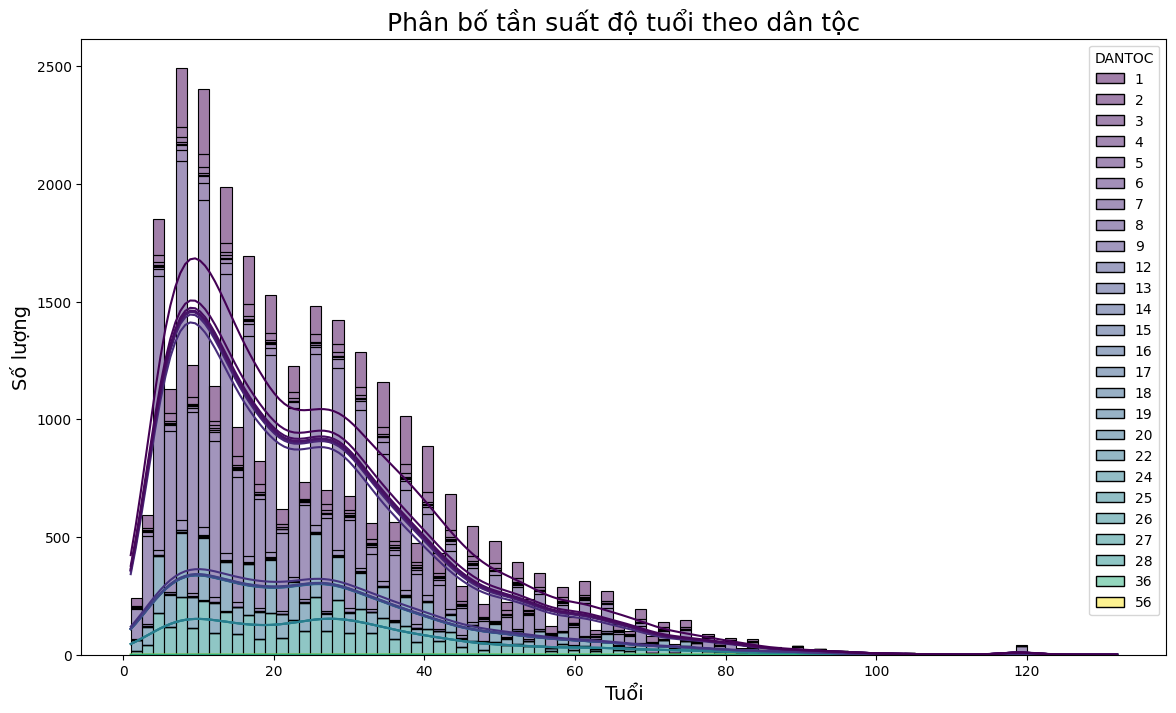

In [76]:
plt.figure(figsize=(14, 8))
sns.histplot(data=df_huyen_dak_glong, x='TUOI', hue='DANTOC', multiple='stack', palette='viridis', kde=True)
plt.title('Phân bố tần suất độ tuổi theo dân tộc', fontsize=18)
plt.xlabel('Tuổi', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)
plt.show()


C:\Users\hdang\AppData\Local\Temp\ipykernel_16776\3051481494.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dak_glong['Age_Group'] = pd.cut(df_dak_glong['TUOI'], bins=age_bins, labels=age_labels, right=True)
C:\Users\hdang\AppData\Local\Temp\ipykernel_16776\3051481494.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_dantoc_by_age_group = age_group_summary.groupby('Age_Group').apply(


        DANTOC Age_Group  Total_Poor_Nearpoor
0  HMông (Mèo)      1-14               7882.0
1       M'Nông      1-14               1508.0
2  Kinh (Việt)      1-14               1389.0
3  HMông (Mèo)     15-59              10909.0
4  Kinh (Việt)     15-59               2996.0
5       M'Nông     15-59               2951.0
6  HMông (Mèo)       60+                849.0
7           Mạ       60+                398.0
8  Kinh (Việt)       60+                378.0


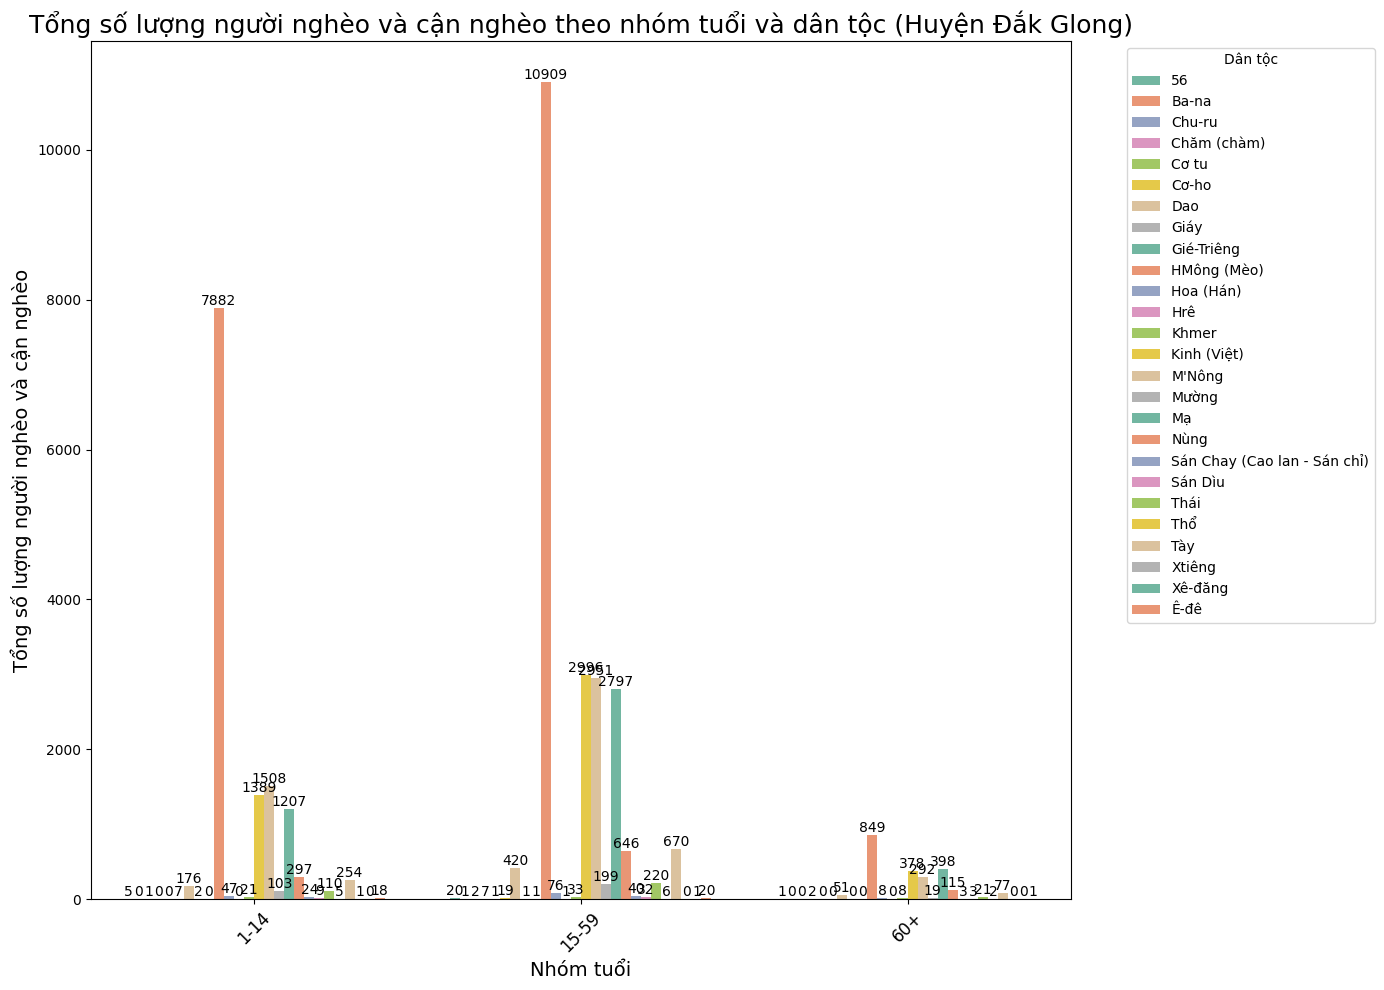

In [77]:
# Lọc dữ liệu cho huyện Đắk Glong
df_dak_glong = df_tong_hop[df_tong_hop['HUYEN'] == 'ĐẮK GLONG']

# Chia dữ liệu thành các nhóm tuổi mới
age_bins = [0, 14, 59, 100]
age_labels = ['1-14', '15-59', '60+']
df_dak_glong['Age_Group'] = pd.cut(df_dak_glong['TUOI'], bins=age_bins, labels=age_labels, right=True)

# Tính số lượng người nghèo và cận nghèo theo nhóm tuổi và dân tộc
age_group_distribution = df_dak_glong.groupby(['DANTOC', 'Age_Group', 'PHAN_LOAI_HO']).size().reset_index(name='So_luong')

# Chuyển đổi dữ liệu từ dạng dài sang dạng bảng cho dễ phân tích
age_group_summary = age_group_distribution.pivot_table(index=['DANTOC', 'Age_Group'], columns='PHAN_LOAI_HO', values='So_luong', fill_value=0).reset_index()
age_group_summary.columns.name = None
age_group_summary.rename(columns={1: 'So_luong_ngheo', 2: 'So_luong_can_ngheo'}, inplace=True)

# Tính tổng số lượng nghèo và cận nghèo cho mỗi dân tộc trong các nhóm tuổi
age_group_summary['Total_Poor_Nearpoor'] = age_group_summary['So_luong_ngheo'] + age_group_summary['So_luong_can_ngheo']

# Xác định top 3 dân tộc có tổng số lượng nghèo và cận nghèo cao nhất trong từng nhóm tuổi
top_dantoc_by_age_group = age_group_summary.groupby('Age_Group').apply(
    lambda x: x.nlargest(3, 'Total_Poor_Nearpoor')[['DANTOC', 'Age_Group', 'Total_Poor_Nearpoor']]
).reset_index(drop=True)

print(top_dantoc_by_age_group)

# Vẽ biểu đồ phân phối số lượng người nghèo/cận nghèo theo nhóm tuổi và dân tộc
plt.figure(figsize=(14, 10))
ax = sns.barplot(x='Age_Group', y='Total_Poor_Nearpoor', hue='DANTOC', data=age_group_summary, palette='Set2')
plt.title('Tổng số lượng người nghèo và cận nghèo theo nhóm tuổi và dân tộc (Huyện Đắk Glong)', fontsize=18)
plt.xlabel('Nhóm tuổi', fontsize=14)
plt.ylabel('Tổng số lượng người nghèo và cận nghèo', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Dân tộc', bbox_to_anchor=(1.05, 1), loc='upper left')

# Thêm nhãn số lượng trên đầu mỗi cột
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

C:\Users\hdang\AppData\Local\Temp\ipykernel_16776\5007957.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dak_rlap['Age_Group'] = pd.cut(df_dak_rlap['TUOI'], bins=age_bins, labels=age_labels, right=True)
C:\Users\hdang\AppData\Local\Temp\ipykernel_16776\5007957.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_dantoc_by_age_group = age_group_summary.groupby('Age_Group').apply(


        DANTOC Age_Group  Total_Poor_Nearpoor
0  Kinh (Việt)      1-14                685.0
1       M'Nông      1-14                314.0
2          Tày      1-14                 39.0
3  Kinh (Việt)     15-59               1632.0
4       M'Nông     15-59                612.0
5    Hoa (Hán)     15-59                100.0
6  Kinh (Việt)       60+                416.0
7       M'Nông       60+                 71.0
8    Hoa (Hán)       60+                 18.0


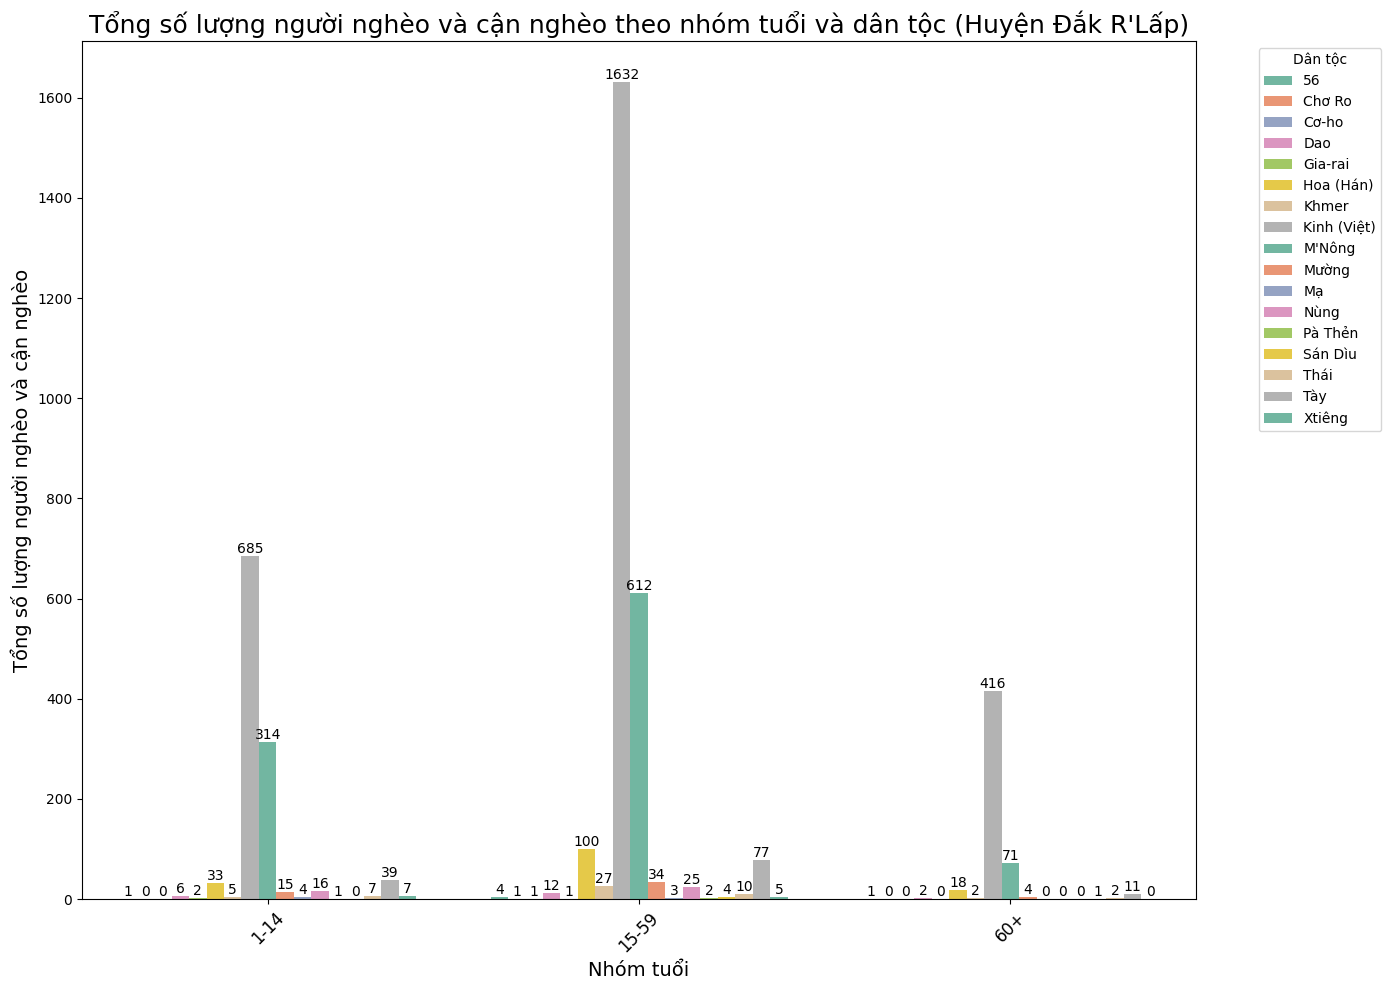

In [78]:
# Lọc dữ liệu cho huyện Đắk R'Lấp
df_dak_rlap = df_tong_hop[df_tong_hop['HUYEN'] == 'ĐẮK RLẤP']

# Chia dữ liệu thành các nhóm tuổi mới
age_bins = [0, 14, 59, 100]
age_labels = ['1-14', '15-59', '60+']
df_dak_rlap['Age_Group'] = pd.cut(df_dak_rlap['TUOI'], bins=age_bins, labels=age_labels, right=True)

# Tính số lượng người nghèo và cận nghèo theo nhóm tuổi và dân tộc
age_group_distribution = df_dak_rlap.groupby(['DANTOC', 'Age_Group', 'PHAN_LOAI_HO']).size().reset_index(name='So_luong')

# Chuyển đổi dữ liệu từ dạng dài sang dạng bảng cho dễ phân tích
age_group_summary = age_group_distribution.pivot_table(index=['DANTOC', 'Age_Group'], columns='PHAN_LOAI_HO', values='So_luong', fill_value=0).reset_index()
age_group_summary.columns.name = None
age_group_summary.rename(columns={1: 'So_luong_ngheo', 2: 'So_luong_can_ngheo'}, inplace=True)

# Tính tổng số lượng nghèo và cận nghèo cho mỗi dân tộc trong các nhóm tuổi
age_group_summary['Total_Poor_Nearpoor'] = age_group_summary['So_luong_ngheo'] + age_group_summary['So_luong_can_ngheo']

# Xác định top 3 dân tộc có tổng số lượng nghèo và cận nghèo cao nhất trong từng nhóm tuổi
top_dantoc_by_age_group = age_group_summary.groupby('Age_Group').apply(
    lambda x: x.nlargest(3, 'Total_Poor_Nearpoor')[['DANTOC', 'Age_Group', 'Total_Poor_Nearpoor']]
).reset_index(drop=True)

print(top_dantoc_by_age_group)

# Vẽ biểu đồ phân phối số lượng người nghèo/cận nghèo theo nhóm tuổi và dân tộc
plt.figure(figsize=(14, 10))
ax = sns.barplot(x='Age_Group', y='Total_Poor_Nearpoor', hue='DANTOC', data=age_group_summary, palette='Set2')
plt.title('Tổng số lượng người nghèo và cận nghèo theo nhóm tuổi và dân tộc (Huyện Đắk R\'Lấp)', fontsize=18)
plt.xlabel('Nhóm tuổi', fontsize=14)
plt.ylabel('Tổng số lượng người nghèo và cận nghèo', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Dân tộc', bbox_to_anchor=(1.05, 1), loc='upper left')

# Thêm nhãn số lượng trên đầu mỗi cột
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

> Dân tộc ở tỉnh Đắk Nông

In [79]:
df_tong_hop.columns

Index(['STT_HO', 'HO_TEN_CHU_HO', 'HO_TEN_THANH_VIEN', 'QUANHE_CHUHO',
       'NGAY_SINH', 'GIOI_TINH', 'SO_CCCD', 'TINH', 'HUYEN', 'XA', 'DANTOC',
       'PHAN_LOAI_HO', 'TUOI', 'Group'],
      dtype='object')

In [80]:
# Kiểm tra kiểu dữ liệu của các cột
print(df_tong_hop.dtypes)

STT_HO                 object
HO_TEN_CHU_HO          object
HO_TEN_THANH_VIEN      object
QUANHE_CHUHO          float64
NGAY_SINH              object
GIOI_TINH             float64
SO_CCCD                object
TINH                   object
HUYEN                  object
XA                     object
DANTOC                 object
PHAN_LOAI_HO            int64
TUOI                  float64
Group                category
dtype: object


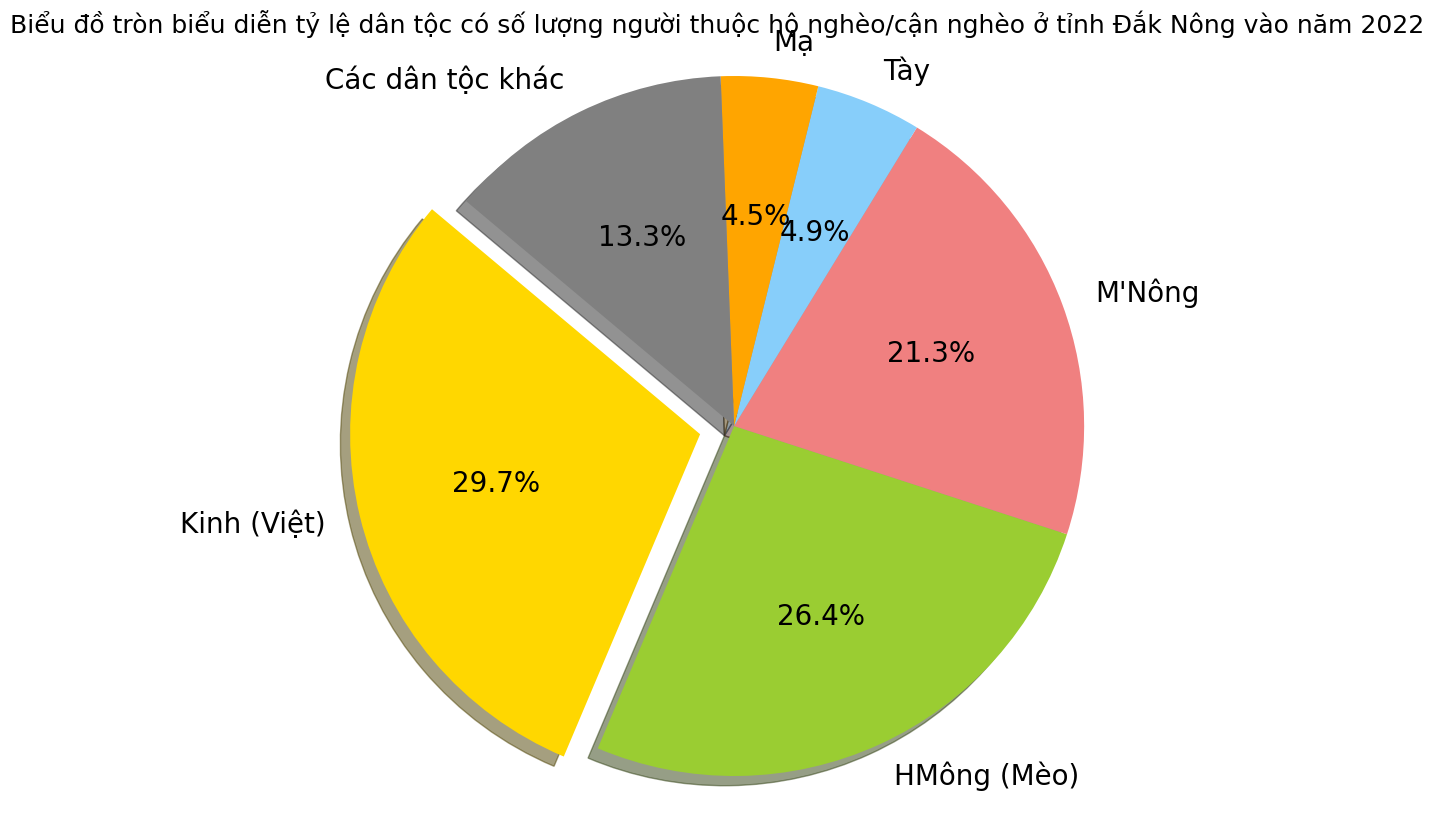

In [137]:
# Nhóm dữ liệu và đếm số lượng hộ nghèo và cận nghèo theo dân tộc
ethnicity_group = df_tong_hop.groupby(['DANTOC', 'PHAN_LOAI_HO']).size().unstack(fill_value=0)

# Đổi tên cột
ethnicity_group.columns = ['SLN_Nghèo', 'SLN_CậnNghèo']
ethnicity_group['Tổng số lượng'] = ethnicity_group.sum(axis=1)
sorted_ethnicity_group = ethnicity_group.sort_values(by='Tổng số lượng', ascending=False)
# Lấy dữ liệu top 5 dân tộc có số lượng người nghèo nhiều nhất
top_5_ethnicities = sorted_ethnicity_group.head(5)

# Tính tổng số lượng người nghèo của các dân tộc còn lại
other_ethnicities_count = sorted_ethnicity_group['Tổng số lượng'].sum() - top_5_ethnicities['Tổng số lượng'].sum()

# Giả sử bạn đã có dữ liệu trong biến 'pie_data'
# Tạo DataFrame cho biểu đồ tròn bao gồm top 5 và dân tộc khác
pie_data = top_5_ethnicities.copy()
pie_data.loc['Các dân tộc khác'] = [other_ethnicities_count, 0, other_ethnicities_count]

# Chuẩn bị dữ liệu cho biểu đồ tròn
labels = pie_data.index
sizes = pie_data['Tổng số lượng']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange', 'gray']
explode = (0.1, 0, 0, 0, 0, 0)  # Phân tách mảnh nhỏ nhất cho top 5

# Vẽ biểu đồ tròn
plt.figure(figsize=(12, 10))  # Tăng kích thước của biểu đồ
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140, 
        textprops={'fontsize': 20})  # Tăng kích thước chữ cho nhãn phần trăm
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.title('Biểu đồ tròn biểu diễn tỷ lệ dân tộc có số lượng người thuộc hộ nghèo/cận nghèo ở tỉnh Đắk Nông vào năm 2022', fontsize=18)  # Tăng kích thước chữ cho tiêu đề
plt.show()



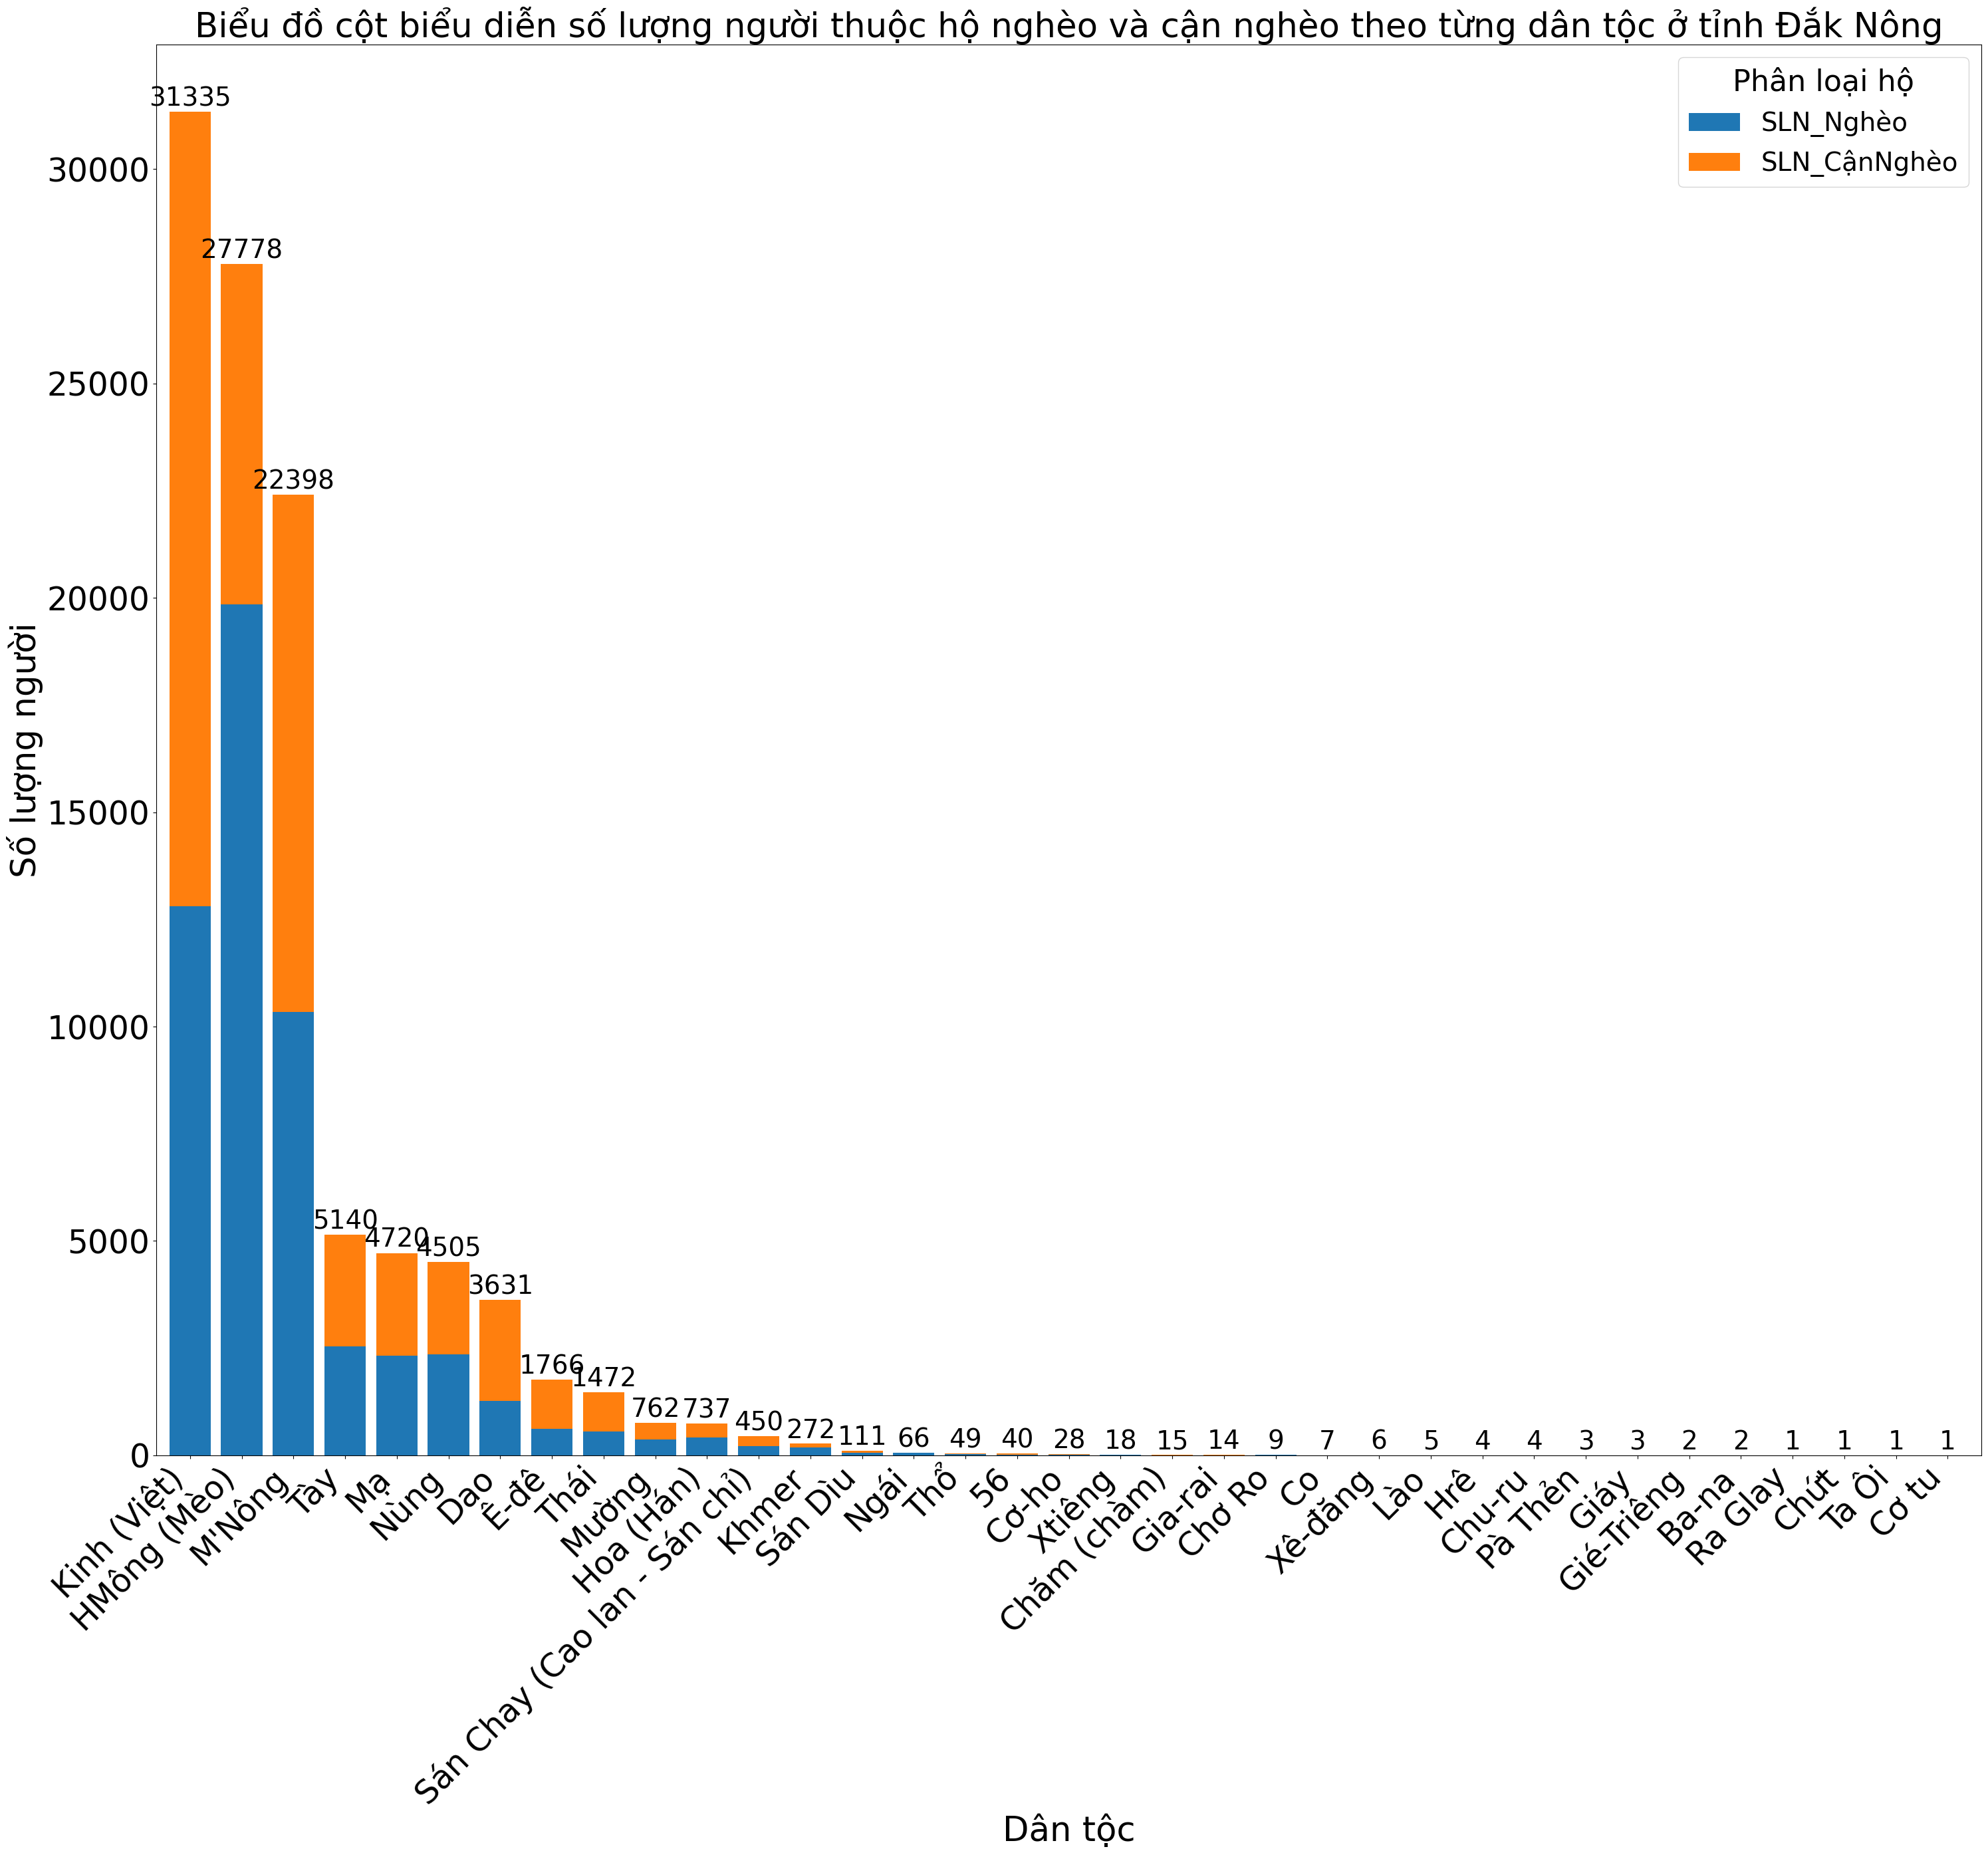

In [154]:
import matplotlib.pyplot as plt

# Giả sử bạn đã có dữ liệu trong biến 'sorted_ethnicity_group'
# Vẽ biểu đồ cột cho số lượng hộ nghèo và cận nghèo theo dân tộc
fig, ax = plt.subplots(figsize=(30, 28))  # Tăng kích thước của biểu đồ

# Tạo biểu đồ cột với chiều rộng của cột được điều chỉnh
sorted_ethnicity_group[['SLN_Nghèo', 'SLN_CậnNghèo']].plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], ax=ax, width=0.8)  # Điều chỉnh chiều rộng của cột

# Đặt tên cho các trục và tiêu đề biểu đồ
plt.xlabel('Dân tộc', fontsize=37)  # Tăng kích thước chữ cho nhãn trục X
plt.ylabel('Số lượng người', fontsize=37)  # Tăng kích thước chữ cho nhãn trục Y
plt.title('Biểu đồ cột biểu diễn số lượng người thuộc hộ nghèo và cận nghèo theo từng dân tộc ở tỉnh Đắk Nông', fontsize=37)  # Tăng kích thước chữ cho tiêu đề

# Hiển thị chú thích
plt.legend(title='Phân loại hộ', fontsize=28, title_fontsize='32')  # Tăng kích thước chữ cho chú thích

# Thêm nhãn tổng số lượng hộ nghèo và cận nghèo trên đầu mỗi cột
for i, total in enumerate(sorted_ethnicity_group['Tổng số lượng']):
    ax.text(i, total + 10, f'{int(total)}', ha='center', va='bottom', fontsize=28, color='black')  # Tăng kích thước chữ cho nhãn dữ liệu

# Căn chỉnh các nhãn cho dễ đọc
plt.xticks(rotation=45, ha='right', fontsize=35)  # Xoay nhãn trục X, căn chỉnh cho dễ đọc và tăng kích thước chữ
plt.yticks(fontsize=35)  # Tăng kích thước chữ cho nhãn trục Y

# Hiển thị biểu đồ
plt.tight_layout()  # Điều chỉnh để tránh cắt xén nhãn
plt.show()


> Đắk Glong

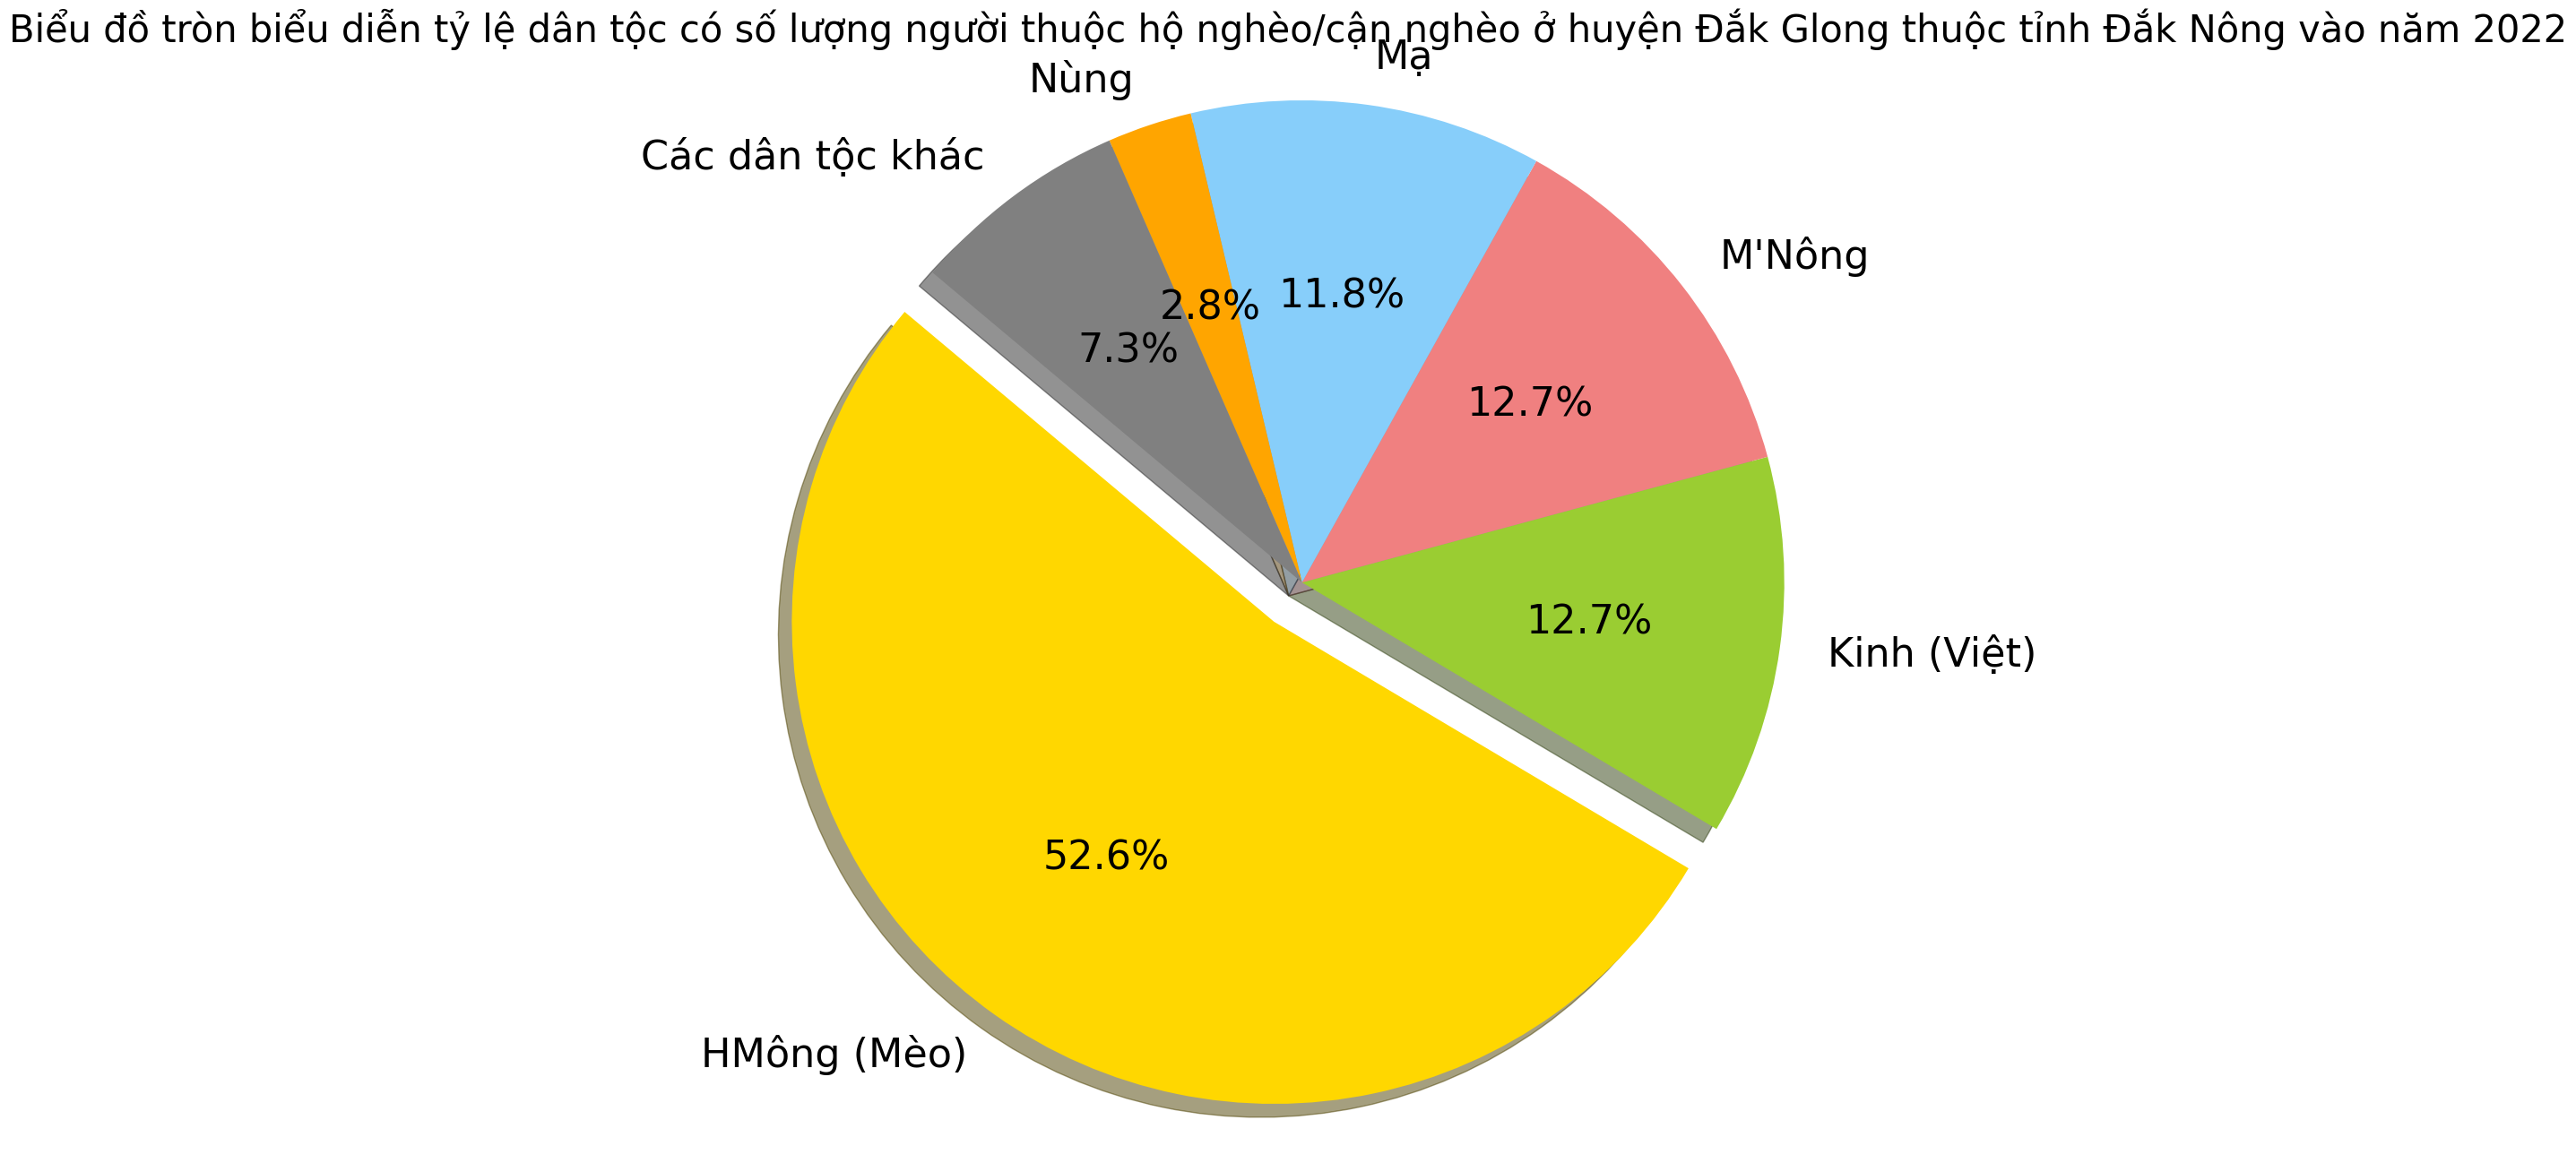

In [140]:
import matplotlib.pyplot as plt

# Nhóm dữ liệu và đếm số lượng hộ nghèo và cận nghèo theo dân tộc
ethnicity_group_dakglong = df_dak_glong.groupby(['DANTOC', 'PHAN_LOAI_HO']).size().unstack(fill_value=0)

# Đổi tên cột
ethnicity_group_dakglong.columns = ['SLN_Nghèo', 'SLN_CậnNghèo']
ethnicity_group_dakglong['Tổng số lượng'] = ethnicity_group_dakglong.sum(axis=1)
sorted_ethnicity_group_dakglong = ethnicity_group_dakglong.sort_values(by='Tổng số lượng', ascending=False)

# Lấy dữ liệu top 5 dân tộc có số lượng người nghèo nhiều nhất tại huyện Đắk Glong
top_5_ethnicities_dakglong = sorted_ethnicity_group_dakglong.head(5)

# Tính tổng số lượng người nghèo của các dân tộc còn lại
other_ethnicities_count_dakglong = sorted_ethnicity_group_dakglong['Tổng số lượng'].sum() - top_5_ethnicities_dakglong['Tổng số lượng'].sum()

# Tạo DataFrame cho biểu đồ tròn bao gồm top 5 và dân tộc khác
pie_data_dakglong = top_5_ethnicities_dakglong.copy()
pie_data_dakglong.loc['Các dân tộc khác'] = [other_ethnicities_count_dakglong, 0, other_ethnicities_count_dakglong]

# Chuẩn bị dữ liệu cho biểu đồ tròn
labels_dakglong = pie_data_dakglong.index
sizes_dakglong = pie_data_dakglong['Tổng số lượng']
colors_dakglong = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange', 'gray']
explode_dakglong = (0.1, 0, 0, 0, 0, 0)  # Phân tách mảnh nhỏ nhất cho top 5

# Vẽ biểu đồ tròn cho huyện Đắk Glong
plt.figure(figsize=(18, 16))  # Tăng kích thước của biểu đồ
plt.pie(
    sizes_dakglong, 
    explode=explode_dakglong, 
    labels=labels_dakglong, 
    colors=colors_dakglong, 
    autopct='%1.1f%%', 
    shadow=True, 
    startangle=140, 
    textprops={'fontsize':32}  # Tăng kích thước chữ cho nhãn phần trăm
)
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.title(
    'Biểu đồ tròn biểu diễn tỷ lệ dân tộc có số lượng người thuộc hộ nghèo/cận nghèo ở huyện Đắk Glong thuộc tỉnh Đắk Nông vào năm 2022', 
    fontsize=30  # Tăng kích thước chữ cho tiêu đề
)
plt.show()


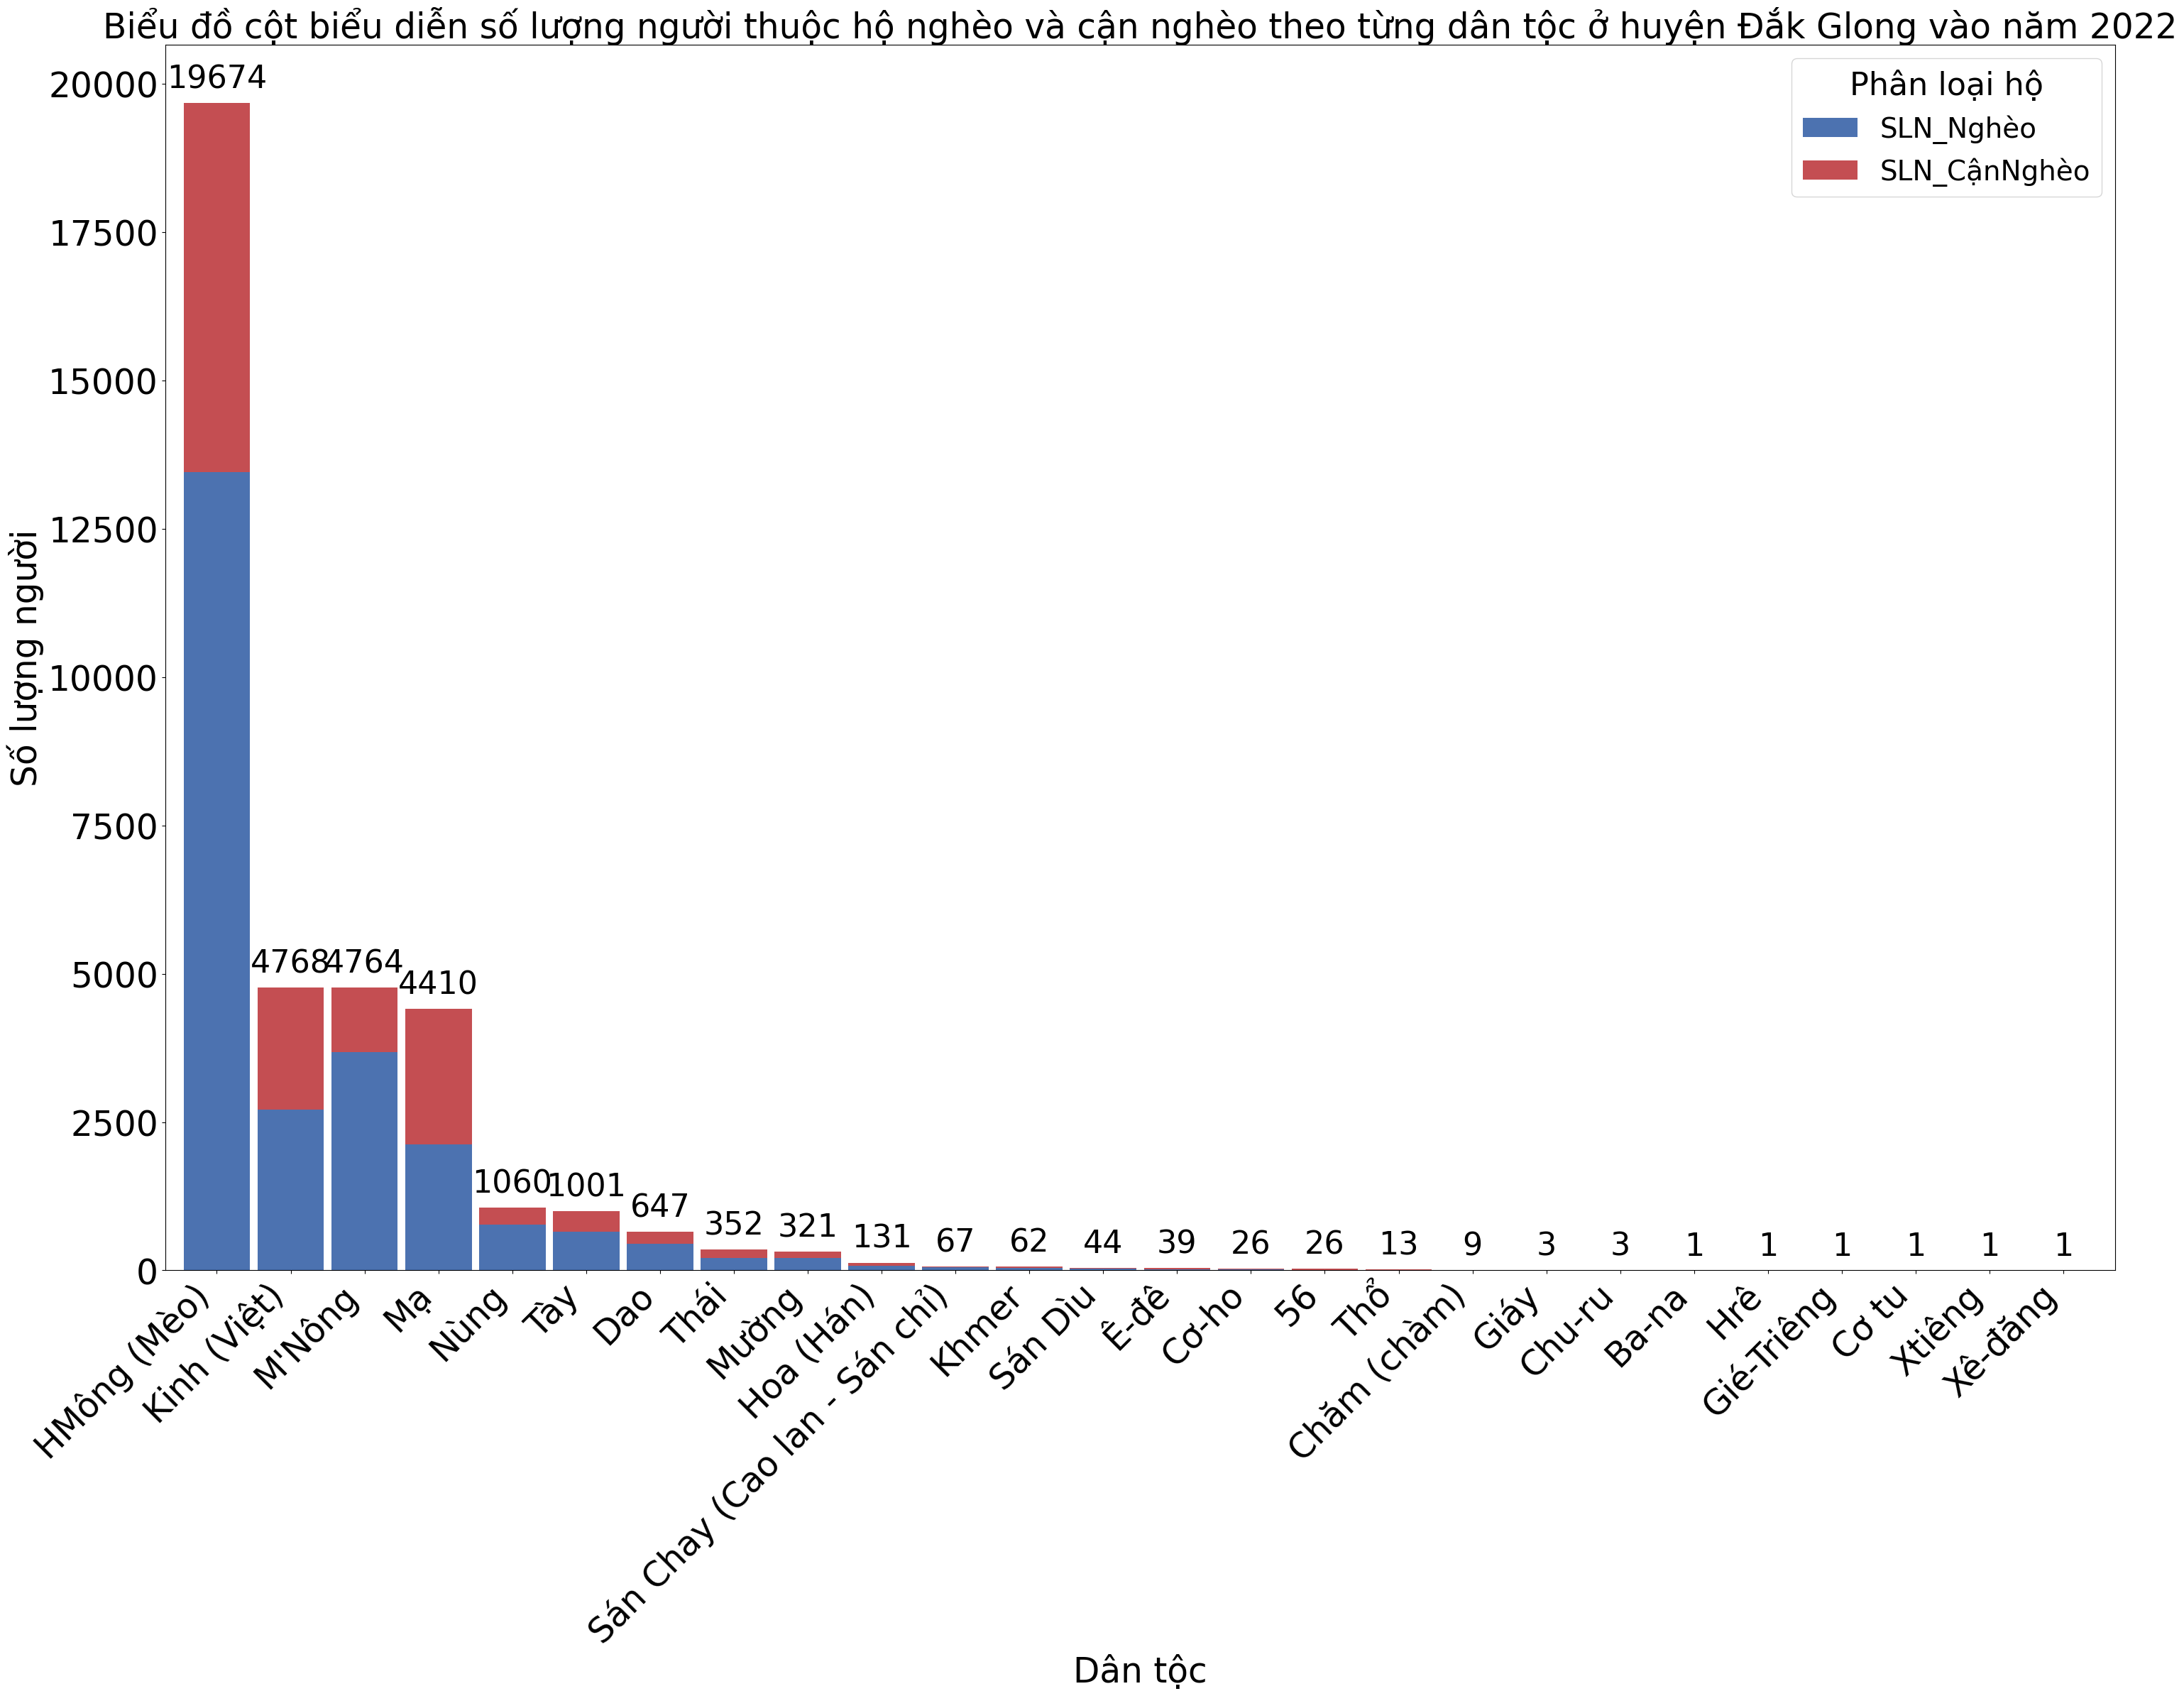

In [151]:
import matplotlib.pyplot as plt

# Giả sử bạn đã có dữ liệu trong biến 'sorted_ethnicity_group_dakglong'
fig, ax = plt.subplots(figsize=(30, 24))  # Tăng kích thước của biểu đồ

# Vẽ biểu đồ cột xếp chồng với màu sắc khác và điều chỉnh chiều rộng cột
sorted_ethnicity_group_dakglong[['SLN_Nghèo', 'SLN_CậnNghèo']].plot(
    kind='bar', 
    stacked=True, 
    color=['#4c72b0', '#c44e52'],  # Màu sắc khác
    ax=ax,
    width=0.9  # Điều chỉnh chiều rộng của cột
)

# Đặt tên cho các trục và tiêu đề biểu đồ
plt.xlabel('Dân tộc', fontsize=35)  # Tăng kích thước chữ cho nhãn trục X
plt.ylabel('Số lượng người', fontsize=35)  # Tăng kích thước chữ cho nhãn trục Y
plt.title('Biểu đồ cột biểu diễn số lượng người thuộc hộ nghèo và cận nghèo theo từng dân tộc ở huyện Đắk Glong vào năm 2022', fontsize=35)  # Tăng kích thước chữ cho tiêu đề

# Hiển thị chú thích
plt.legend(title='Phân loại hộ', fontsize=28, title_fontsize='32')  # Tăng kích thước chữ cho chú thích

# Thêm nhãn tổng số lượng hộ nghèo và cận nghèo trên đầu mỗi cột
for i, total in enumerate(sorted_ethnicity_group_dakglong['Tổng số lượng']):
    ax.text(i, total + 150, f'{int(total)}', ha='center', va='bottom', fontsize=32, color='black')  # Tăng kích thước chữ cho nhãn dữ liệu và điều chỉnh khoảng cách

# Căn chỉnh các nhãn cho dễ đọc
plt.xticks(rotation=45, ha='right', fontsize=35)  # Xoay nhãn trục X, căn chỉnh cho dễ đọc và tăng kích thước chữ
plt.yticks(fontsize=35)  # Tăng kích thước chữ cho nhãn trục Y

# Hiển thị biểu đồ
plt.tight_layout()  # Điều chỉnh để tránh cắt xén nhãn
plt.show()


> Tuy Đức

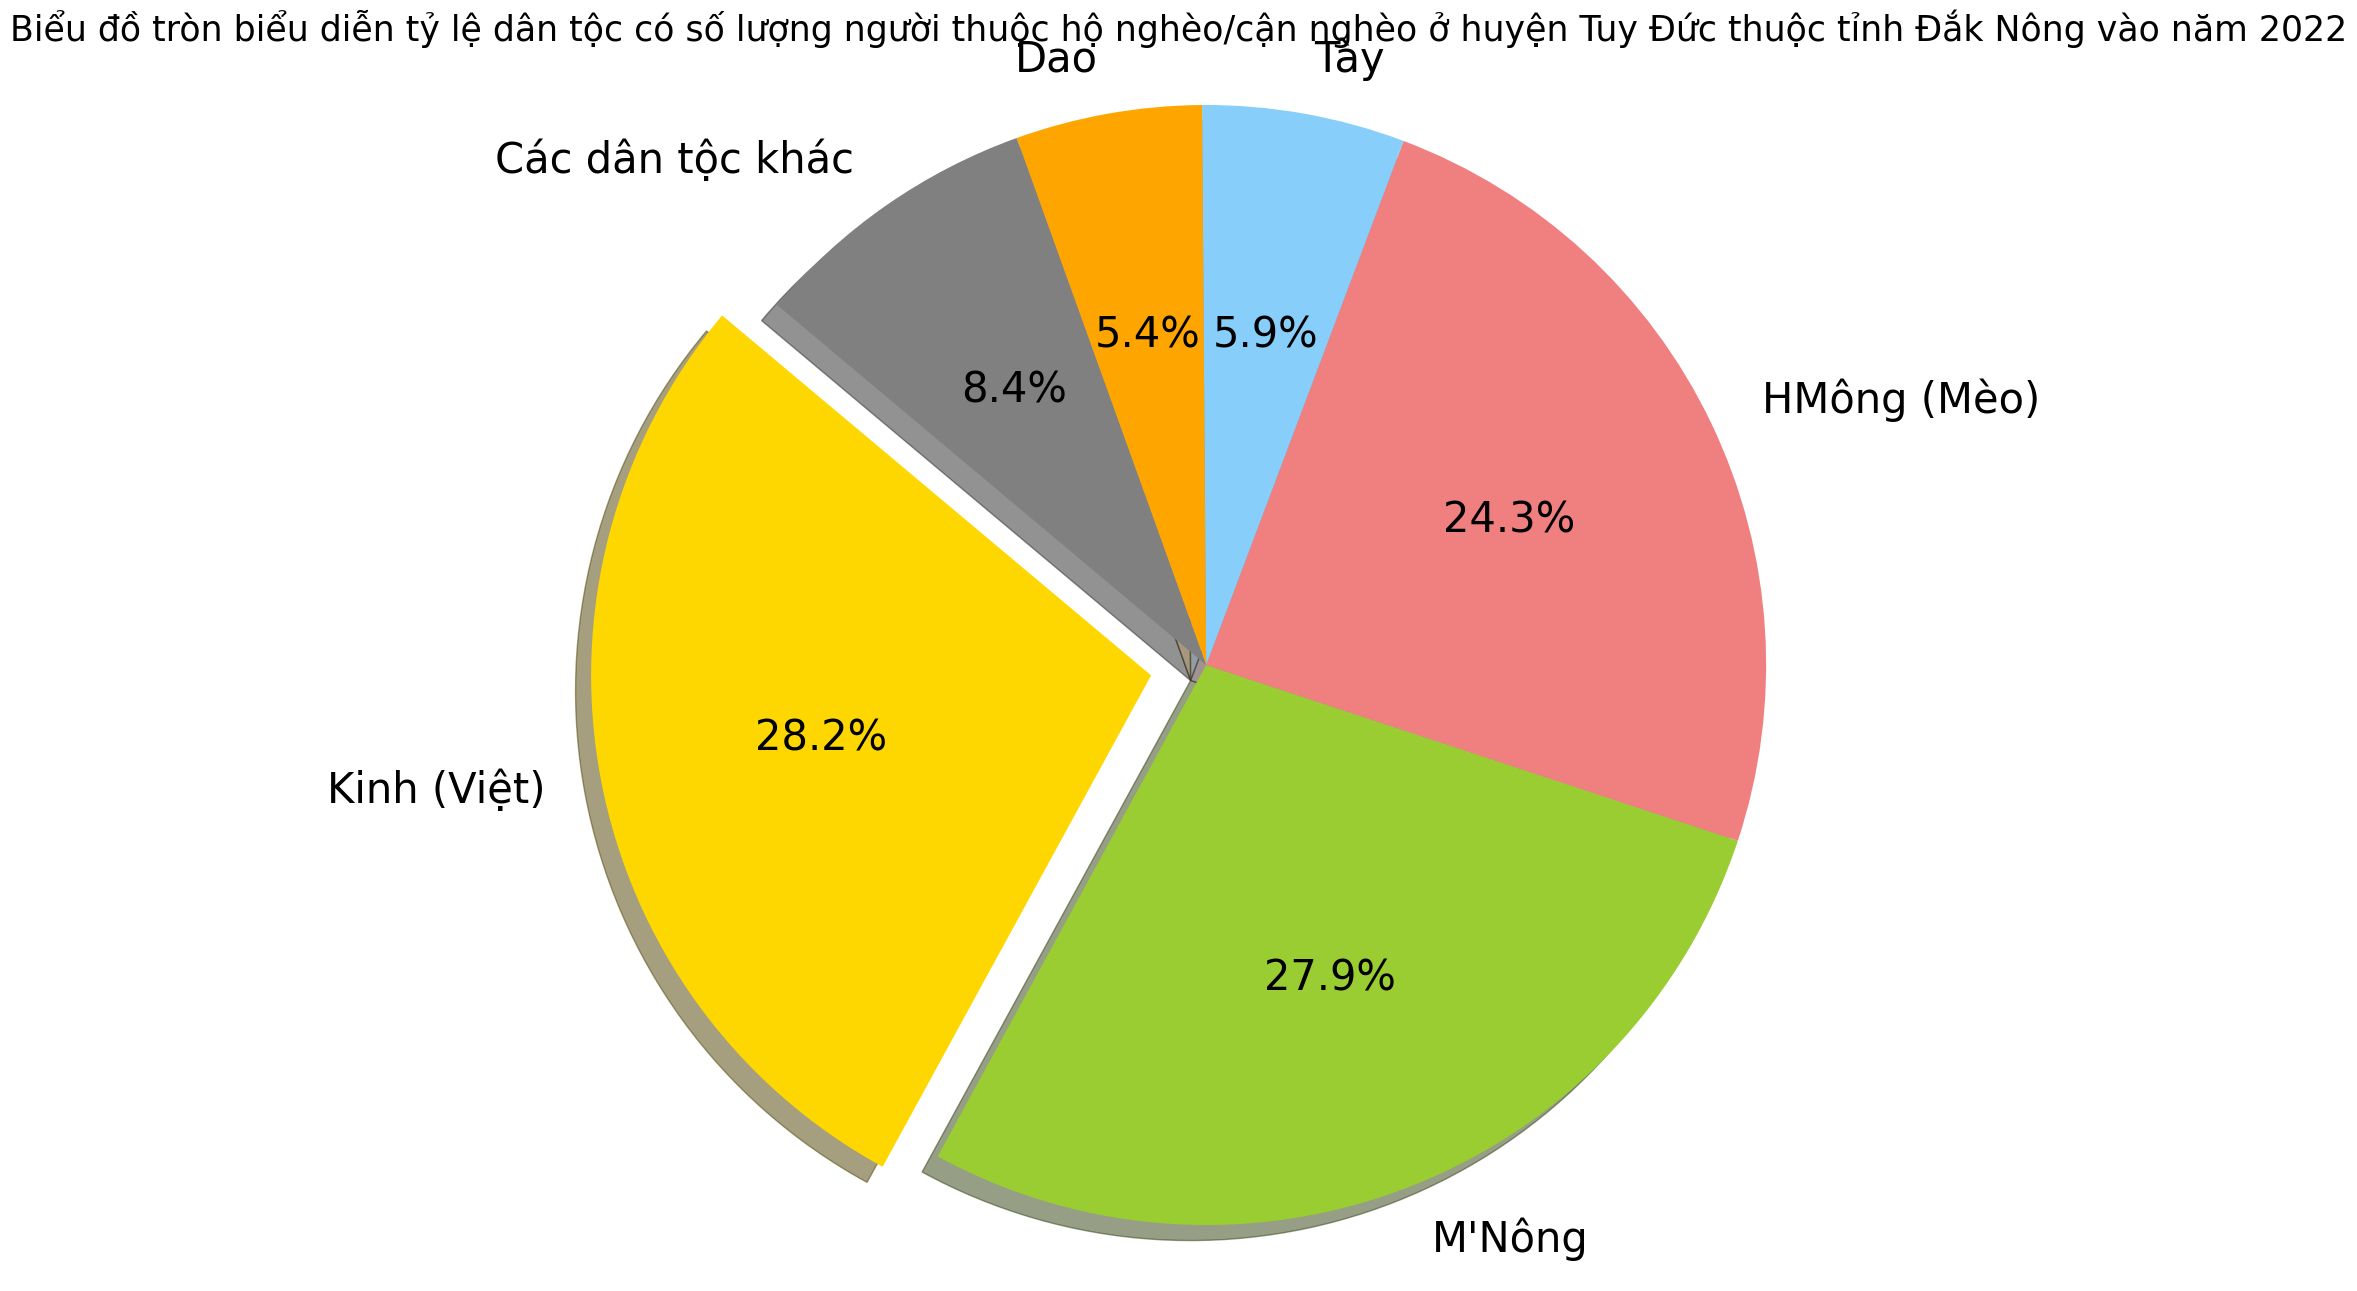

In [174]:
# Lọc dữ liệu cho huyện Tuy Đức
df_tuy_duc = df_tong_hop[df_tong_hop['HUYEN'] == 'TUY ĐỨC']

# Nhóm dữ liệu và đếm số lượng hộ nghèo và cận nghèo theo dân tộc
ethnicity_group_tuy_duc = df_tuy_duc.groupby(['DANTOC', 'PHAN_LOAI_HO']).size().unstack(fill_value=0)

# Đổi tên cột
ethnicity_group_tuy_duc.columns = ['SLN_Nghèo', 'SLN_CậnNghèo']
ethnicity_group_tuy_duc['Tổng số lượng'] = ethnicity_group_tuy_duc.sum(axis=1)

# Sắp xếp dữ liệu theo tổng số lượng
sorted_ethnicity_group_tuy_duc = ethnicity_group_tuy_duc.sort_values(by='Tổng số lượng', ascending=False)
# Lấy dữ liệu top 5 dân tộc có số lượng người nghèo nhiều nhất tại huyện Tuy Đức
top_5_ethnicities_tuy_duc = sorted_ethnicity_group_tuy_duc.head(5)

# Tính tổng số lượng người nghèo của các dân tộc còn lại
other_ethnicities_count_tuy_duc = sorted_ethnicity_group_tuy_duc['Tổng số lượng'].sum() - top_5_ethnicities_tuy_duc['Tổng số lượng'].sum()

# Tạo DataFrame cho biểu đồ tròn bao gồm top 5 và dân tộc khác
pie_data_tuy_duc = top_5_ethnicities_tuy_duc.copy()
pie_data_tuy_duc.loc['Các dân tộc khác'] = [other_ethnicities_count_tuy_duc, 0, other_ethnicities_count_tuy_duc]

# Giả sử `pie_data_tuy_duc` là dữ liệu của bạn
labels_tuy_duc = pie_data_tuy_duc.index
sizes_tuy_duc = pie_data_tuy_duc['Tổng số lượng']
colors_tuy_duc = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange', 'gray']
explode_tuy_duc = (0.1, 0, 0, 0, 0, 0)  # Phân tách mảnh nhỏ nhất cho top 5

# Tạo biểu đồ tròn

plt.figure(figsize=(20, 16))  # Tăng kích thước của biểu đồ
plt.pie(
    sizes_tuy_duc, 
    explode=explode_tuy_duc, 
    labels=labels_tuy_duc, 
    colors=colors_tuy_duc, 
    autopct='%1.1f%%', 
    shadow=True, 
    startangle=140,
    textprops={'fontsize': 30}  # Tăng kích thước chữ cho nhãn và tỷ lệ phần trăm
)

# Đảm bảo biểu đồ tròn
plt.axis('equal')  
plt.title(
    'Biểu đồ tròn biểu diễn tỷ lệ dân tộc có số lượng người thuộc hộ nghèo/cận nghèo ở huyện Tuy Đức thuộc tỉnh Đắk Nông vào năm 2022', 
    fontsize=25  # Tăng kích thước chữ cho tiêu đề
)

# Hiển thị biểu đồ
plt.show()




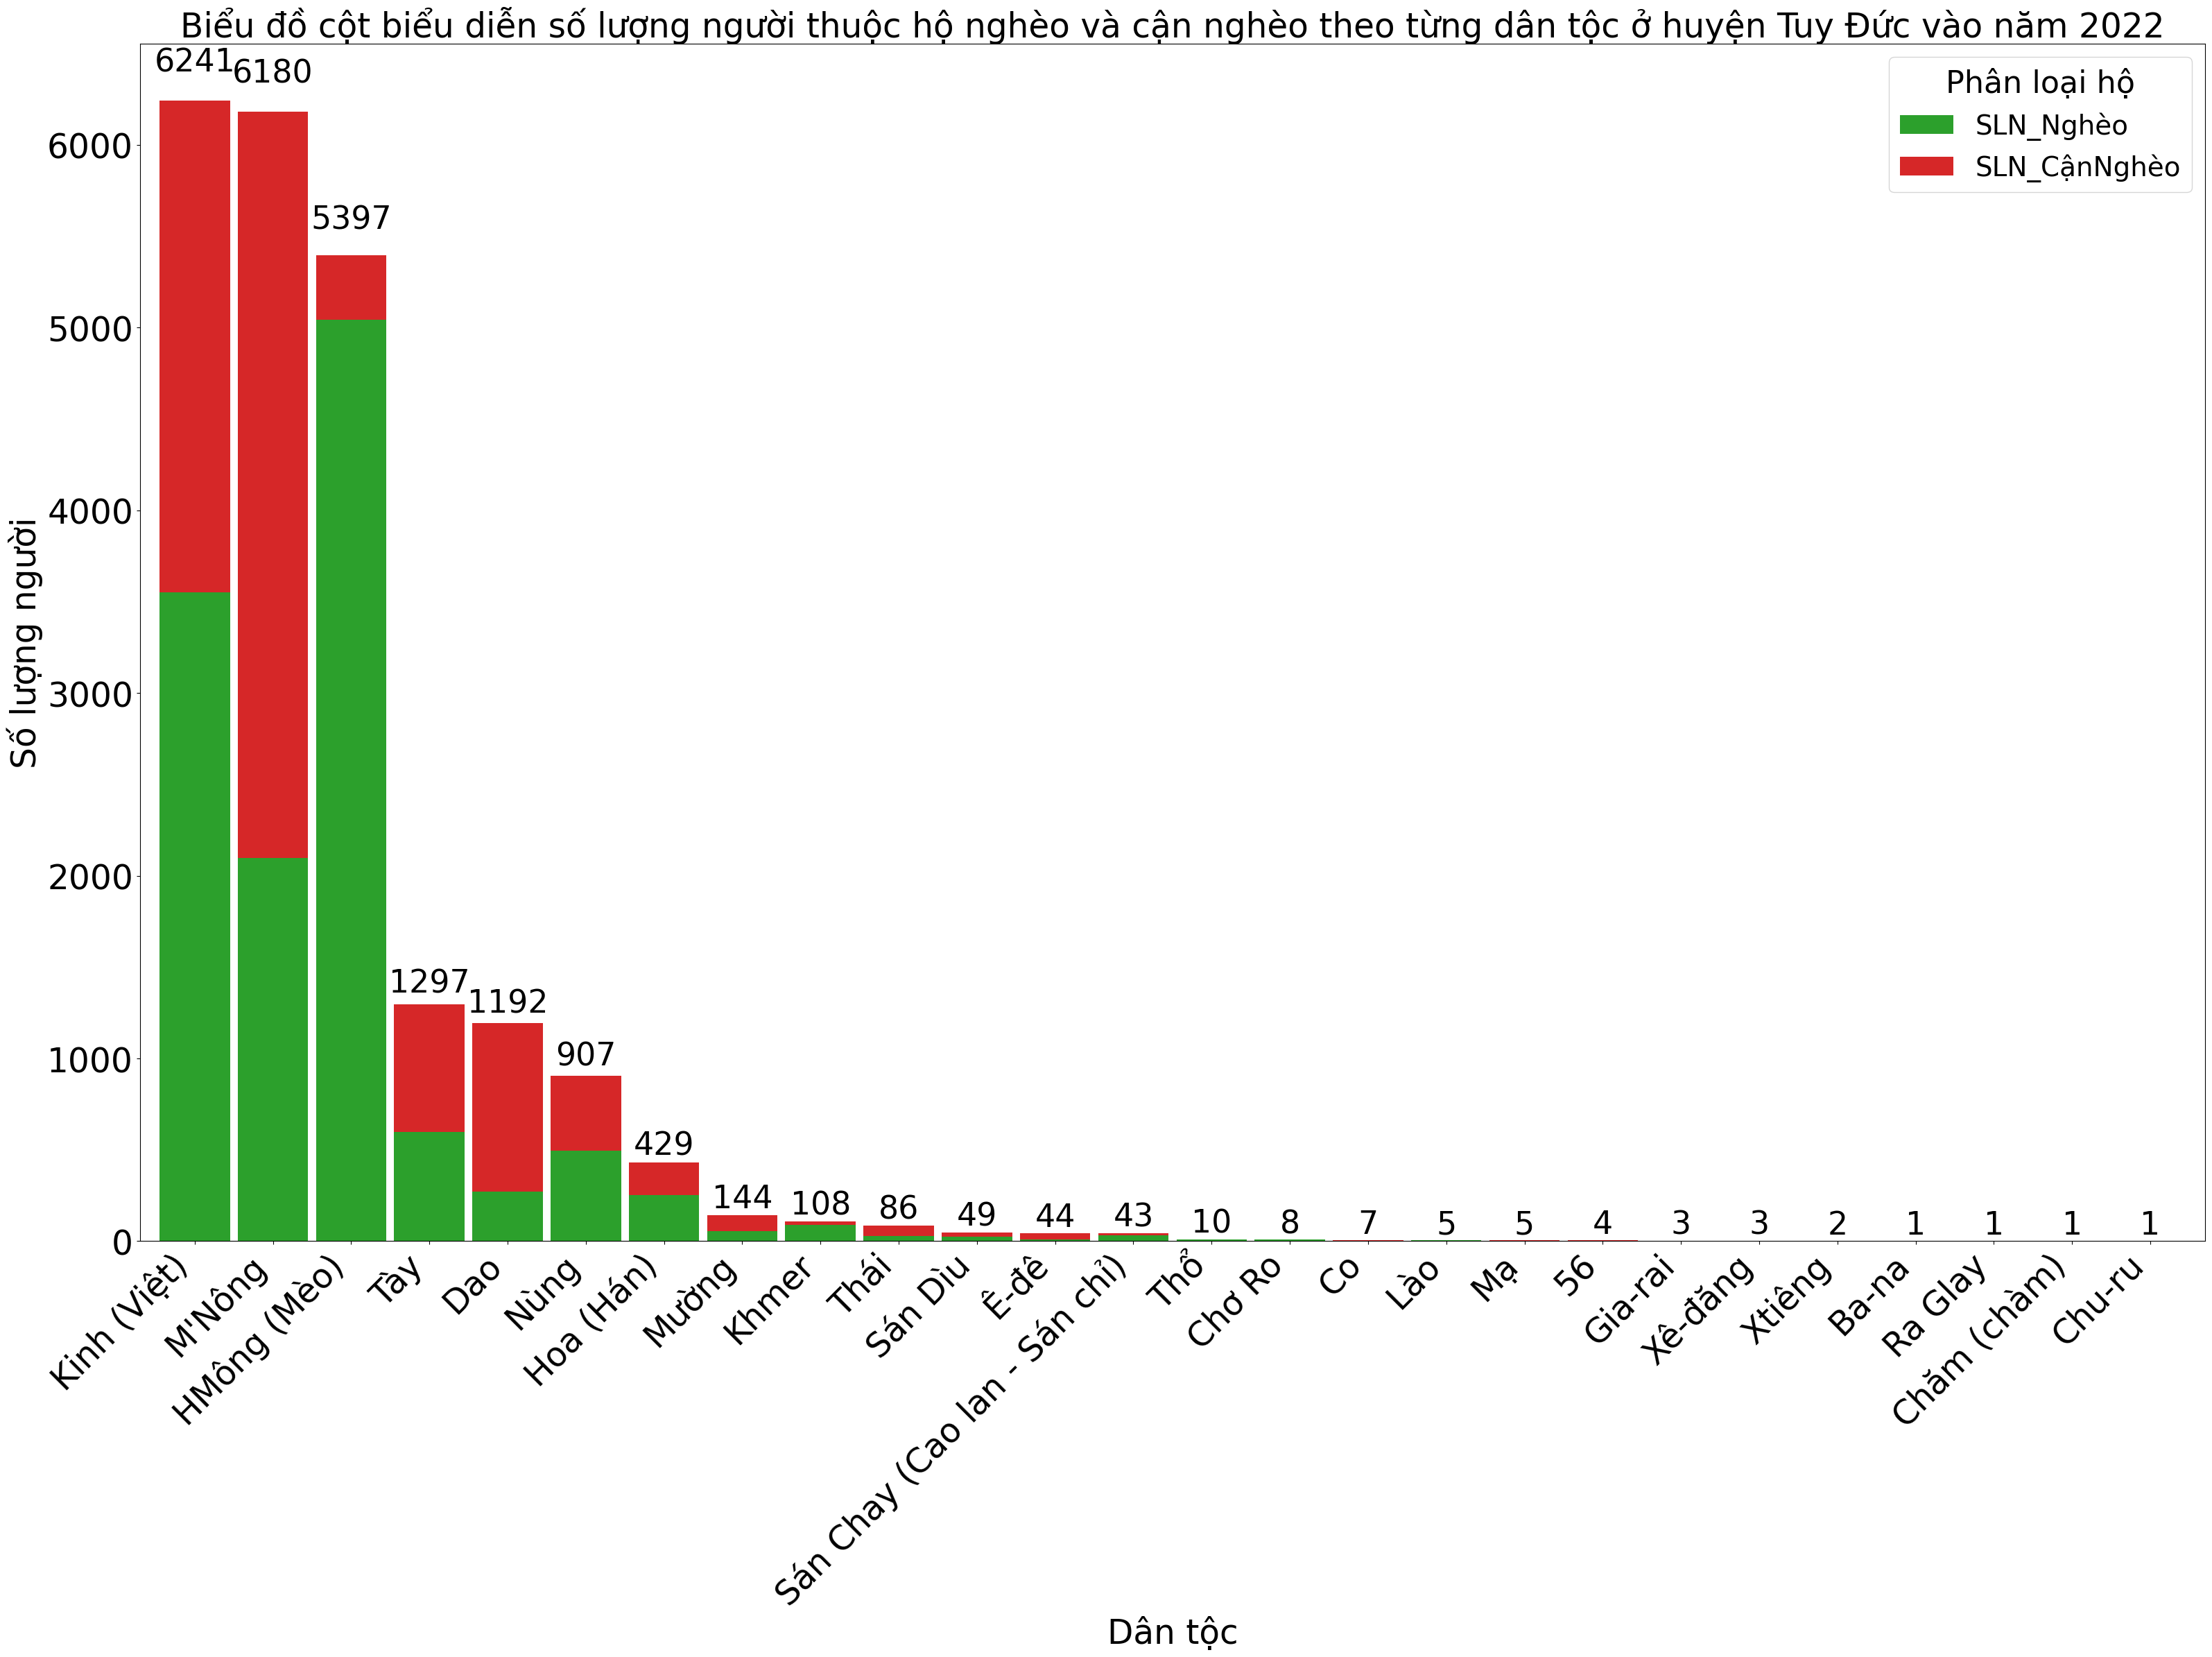

In [149]:
import matplotlib.pyplot as plt

# Giả sử `sorted_ethnicity_group_tuy_duc` là dữ liệu của bạn
fig, ax = plt.subplots(figsize=(32, 24))  # Tăng kích thước của biểu đồ để cột rộng hơn

# Vẽ biểu đồ cột xếp chồng với màu sắc khác và điều chỉnh chiều rộng cột
sorted_ethnicity_group_tuy_duc[['SLN_Nghèo', 'SLN_CậnNghèo']].plot(
    kind='bar', 
    stacked=True, 
    color=['#2ca02c', '#d62728'],  # Màu sắc khác
    width=0.9,  # Tăng độ rộng của các cột
    ax=ax
)

# Đặt tên cho các trục và tiêu đề biểu đồ
plt.xlabel('Dân tộc', fontsize=35)
plt.ylabel('Số lượng người', fontsize=35)
plt.title('Biểu đồ cột biểu diễn số lượng người thuộc hộ nghèo và cận nghèo theo từng dân tộc ở huyện Tuy Đức vào năm 2022', fontsize=35)

# Hiển thị chú thích
plt.legend(title='Phân loại hộ', fontsize=28, title_fontsize='32')

# Thêm nhãn tổng số lượng hộ nghèo và cận nghèo trên đầu mỗi cột với kích thước chữ lớn hơn
for i, total in enumerate(sorted_ethnicity_group_tuy_duc['Tổng số lượng']):
    ax.text(i, total + 0.02*total, f'{int(total)}', ha='center', va='bottom', fontsize=33, color='black')

# Căn chỉnh các nhãn cho dễ đọc
plt.xticks(rotation=45, ha='right', fontsize=35)  # Xoay nhãn trục X và căn chỉnh cho dễ đọc
plt.yticks(fontsize=35)

# Hiển thị biểu đồ
plt.tight_layout()  # Điều chỉnh để tránh cắt xén nhãn
plt.show()


> Đắk RLap

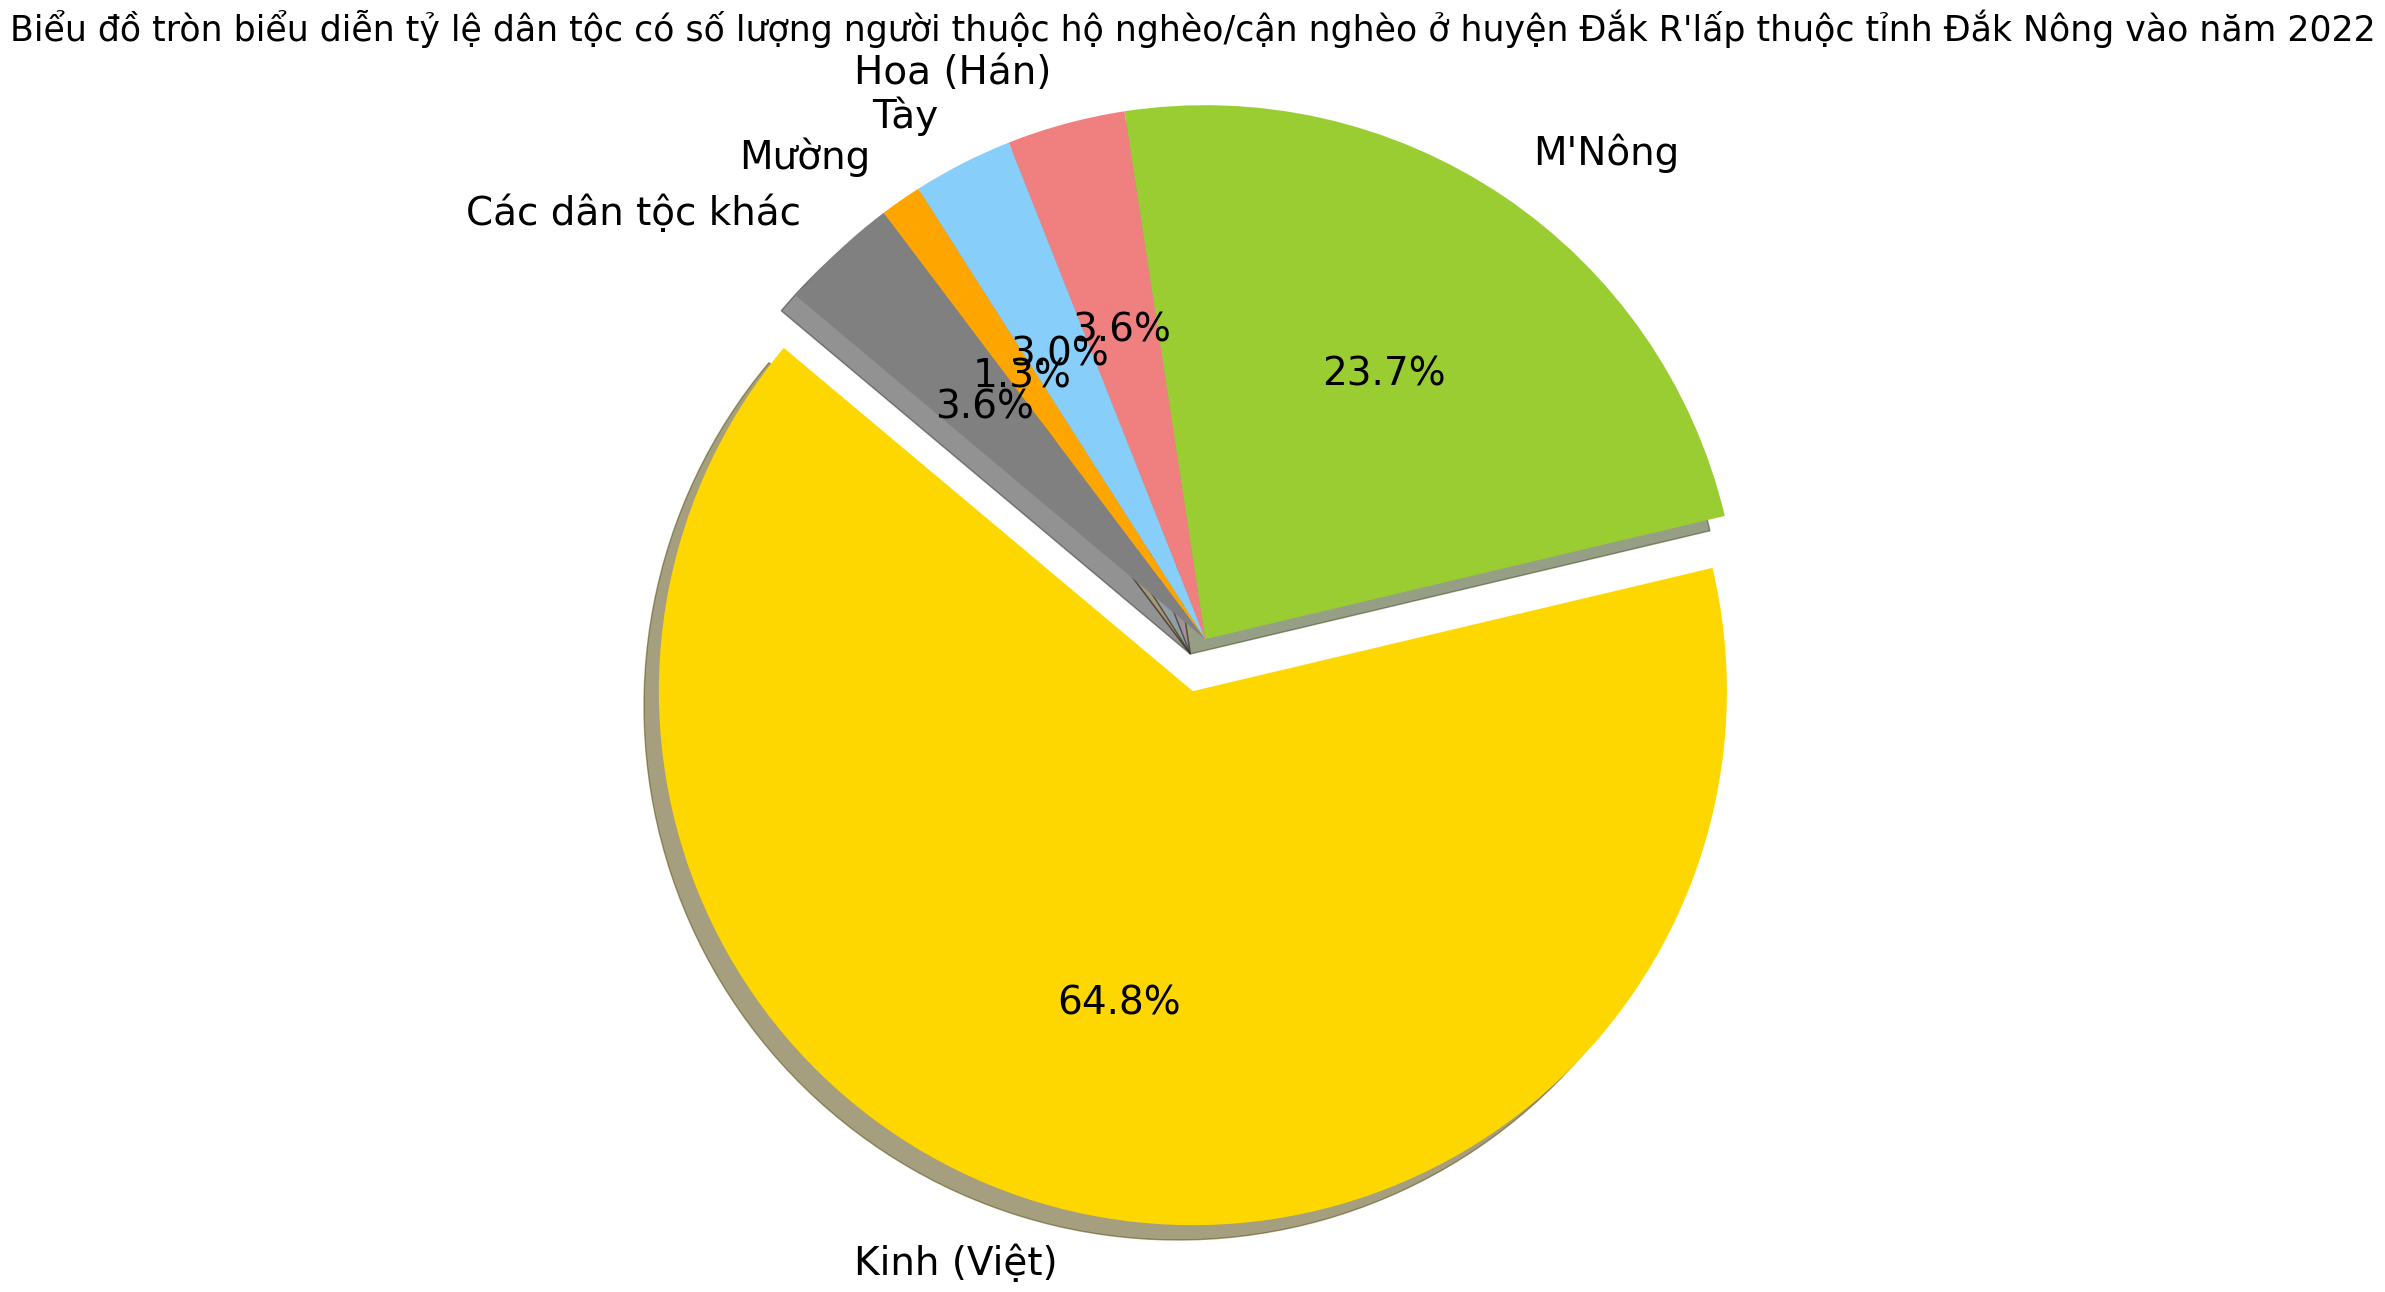

In [198]:
import matplotlib.pyplot as plt

# Lọc dữ liệu cho huyện Đắk R'lấp
df_dak_rlap = df_tong_hop[df_tong_hop['HUYEN'] == 'ĐẮK RLẤP']

# Nhóm dữ liệu và đếm số lượng hộ nghèo và cận nghèo theo dân tộc
ethnicity_group_dak_rlap = df_dak_rlap.groupby(['DANTOC', 'PHAN_LOAI_HO']).size().unstack(fill_value=0)

# Đổi tên cột
ethnicity_group_dak_rlap.columns = ['SLN_Nghèo', 'SLN_CậnNghèo']
ethnicity_group_dak_rlap['Tổng số lượng'] = ethnicity_group_dak_rlap.sum(axis=1)

# Sắp xếp dữ liệu theo tổng số lượng
sorted_ethnicity_group_dak_rlap = ethnicity_group_dak_rlap.sort_values(by='Tổng số lượng', ascending=False)

# Lấy dữ liệu top 5 dân tộc có số lượng người nghèo nhiều nhất tại huyện Đắk R'lấp
top_5_ethnicities_dak_rlap = sorted_ethnicity_group_dak_rlap.head(5)

# Tính tổng số lượng người nghèo của các dân tộc còn lại
other_ethnicities_count_dak_rlap = sorted_ethnicity_group_dak_rlap['Tổng số lượng'].sum() - top_5_ethnicities_dak_rlap['Tổng số lượng'].sum()

# Tạo DataFrame cho biểu đồ tròn bao gồm top 5 và dân tộc khác
pie_data_dak_rlap = top_5_ethnicities_dak_rlap.copy()
pie_data_dak_rlap.loc['Các dân tộc khác'] = [other_ethnicities_count_dak_rlap, 0, other_ethnicities_count_dak_rlap]

# Chuẩn bị dữ liệu cho biểu đồ tròn
labels_dak_rlap = pie_data_dak_rlap.index
sizes_dak_rlap = pie_data_dak_rlap['Tổng số lượng']
colors_dak_rlap = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange', 'gray']
explode_dak_rlap = (0.1, 0, 0, 0, 0, 0)  # Phân tách mảnh nhỏ nhất cho top 5

# Vẽ biểu đồ tròn
plt.figure(figsize=(24, 16))
plt.pie(
    sizes_dak_rlap, 
    explode=explode_dak_rlap, 
    labels=labels_dak_rlap, 
    colors=colors_dak_rlap, 
    autopct='%1.1f%%', 
    shadow=True, 
    startangle=140,
    textprops={'fontsize': 28}  # Tăng kích thước chữ cho nhãn
)
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.title('Biểu đồ tròn biểu diễn tỷ lệ dân tộc có số lượng người thuộc hộ nghèo/cận nghèo ở huyện Đắk R\'lấp thuộc tỉnh Đắk Nông vào năm 2022', fontsize=25)
plt.show()


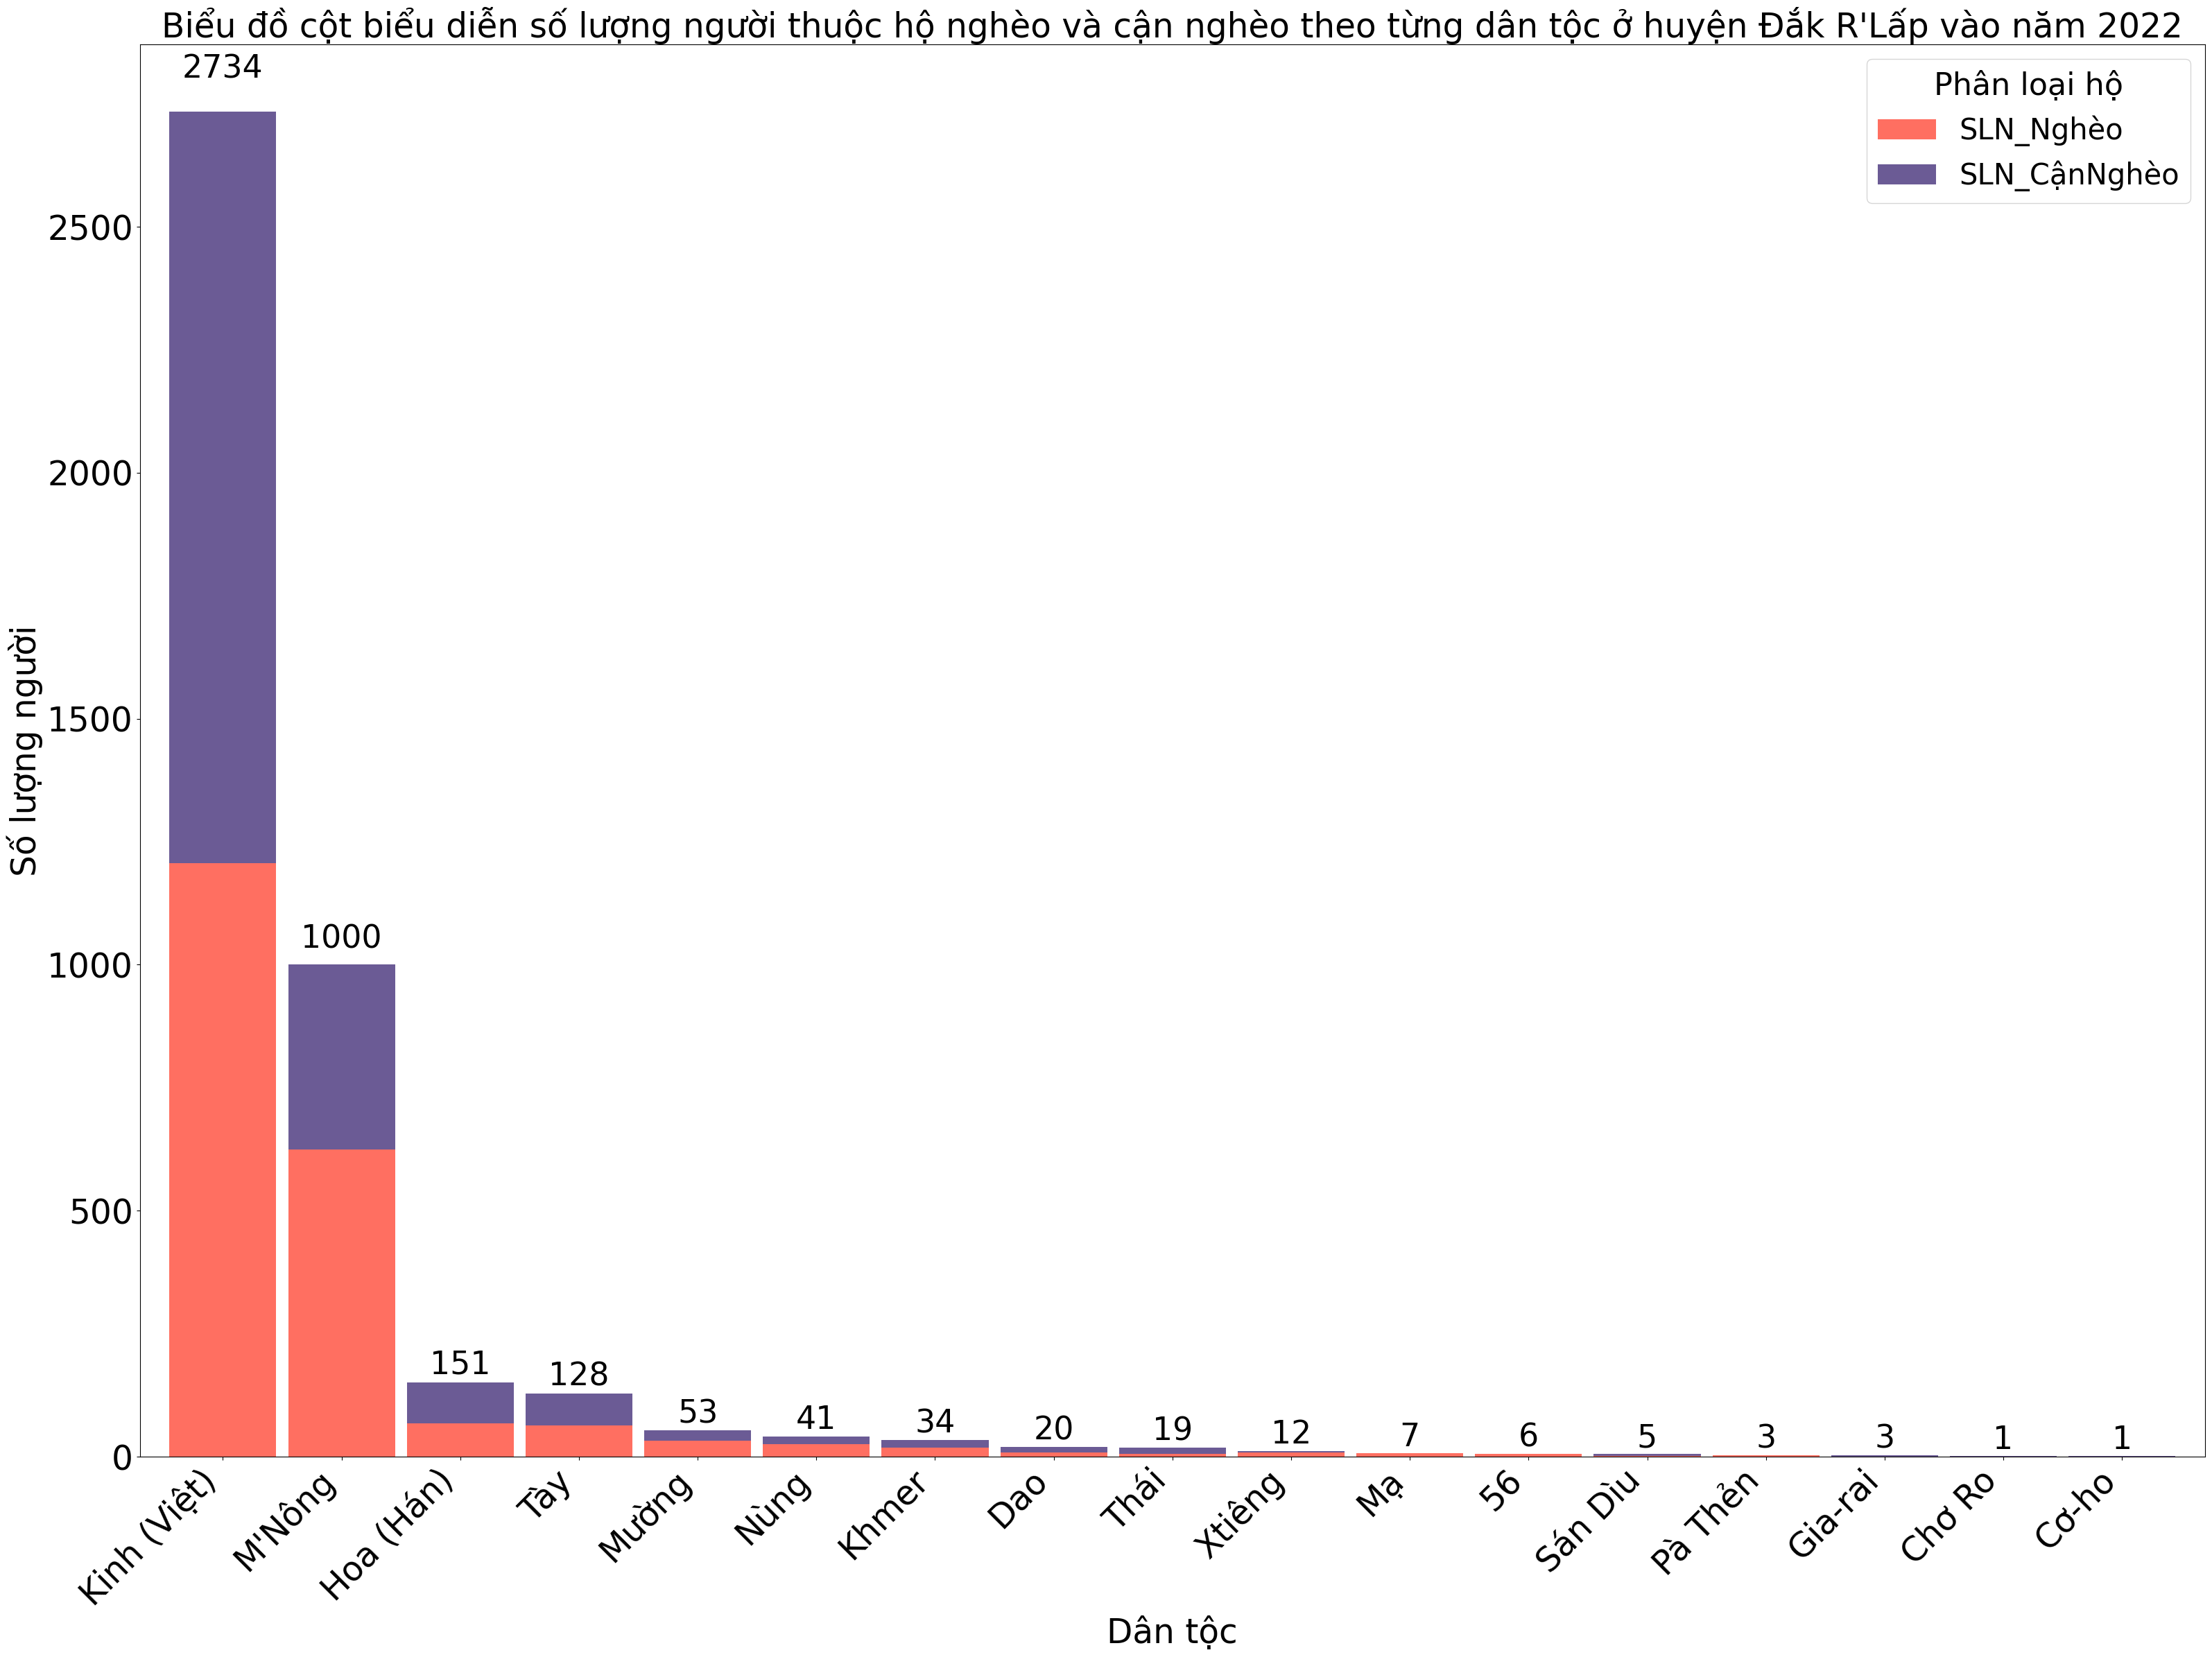

In [186]:
import matplotlib.pyplot as plt

# Giả sử `sorted_ethnicity_group_dak_rlap` là dữ liệu của bạn
fig, ax = plt.subplots(figsize=(32, 24))  # Tăng kích thước của biểu đồ để cột rộng hơn

# Vẽ biểu đồ cột xếp chồng với màu sắc khác và điều chỉnh chiều rộng cột
sorted_ethnicity_group_dak_rlap[['SLN_Nghèo', 'SLN_CậnNghèo']].plot(
    kind='bar', 
    stacked=True, 
    color=['#ff6f61', '#6b5b95'],  # Màu sắc giống như trong code trước
    width=0.9,  # Tăng độ rộng của các cột
    ax=ax
)

# Đặt tên cho các trục và tiêu đề biểu đồ
plt.xlabel('Dân tộc', fontsize=35)
plt.ylabel('Số lượng người', fontsize=35)
plt.title('Biểu đồ cột biểu diễn số lượng người thuộc hộ nghèo và cận nghèo theo từng dân tộc ở huyện Đắk R\'Lấp vào năm 2022', fontsize=35)

# Hiển thị chú thích
plt.legend(title='Phân loại hộ', fontsize=30, title_fontsize='32')

# Thêm nhãn tổng số lượng hộ nghèo và cận nghèo trên đầu mỗi cột với kích thước chữ lớn hơn
for i, total in enumerate(sorted_ethnicity_group_dak_rlap['Tổng số lượng']):
    ax.text(i, total + 0.02*total, f'{int(total)}', ha='center', va='bottom', fontsize=33, color='black')

# Căn chỉnh các nhãn cho dễ đọc
plt.xticks(rotation=45, ha='right', fontsize=35)  # Xoay nhãn trục X và căn chỉnh cho dễ đọc
plt.yticks(fontsize=35)

# Hiển thị biểu đồ
plt.tight_layout()  # Điều chỉnh để tránh cắt xén nhãn
plt.show()


In [89]:
df_tong_hop.columns

Index(['STT_HO', 'HO_TEN_CHU_HO', 'HO_TEN_THANH_VIEN', 'QUANHE_CHUHO',
       'NGAY_SINH', 'GIOI_TINH', 'SO_CCCD', 'TINH', 'HUYEN', 'XA', 'DANTOC',
       'PHAN_LOAI_HO', 'TUOI', 'Group'],
      dtype='object')

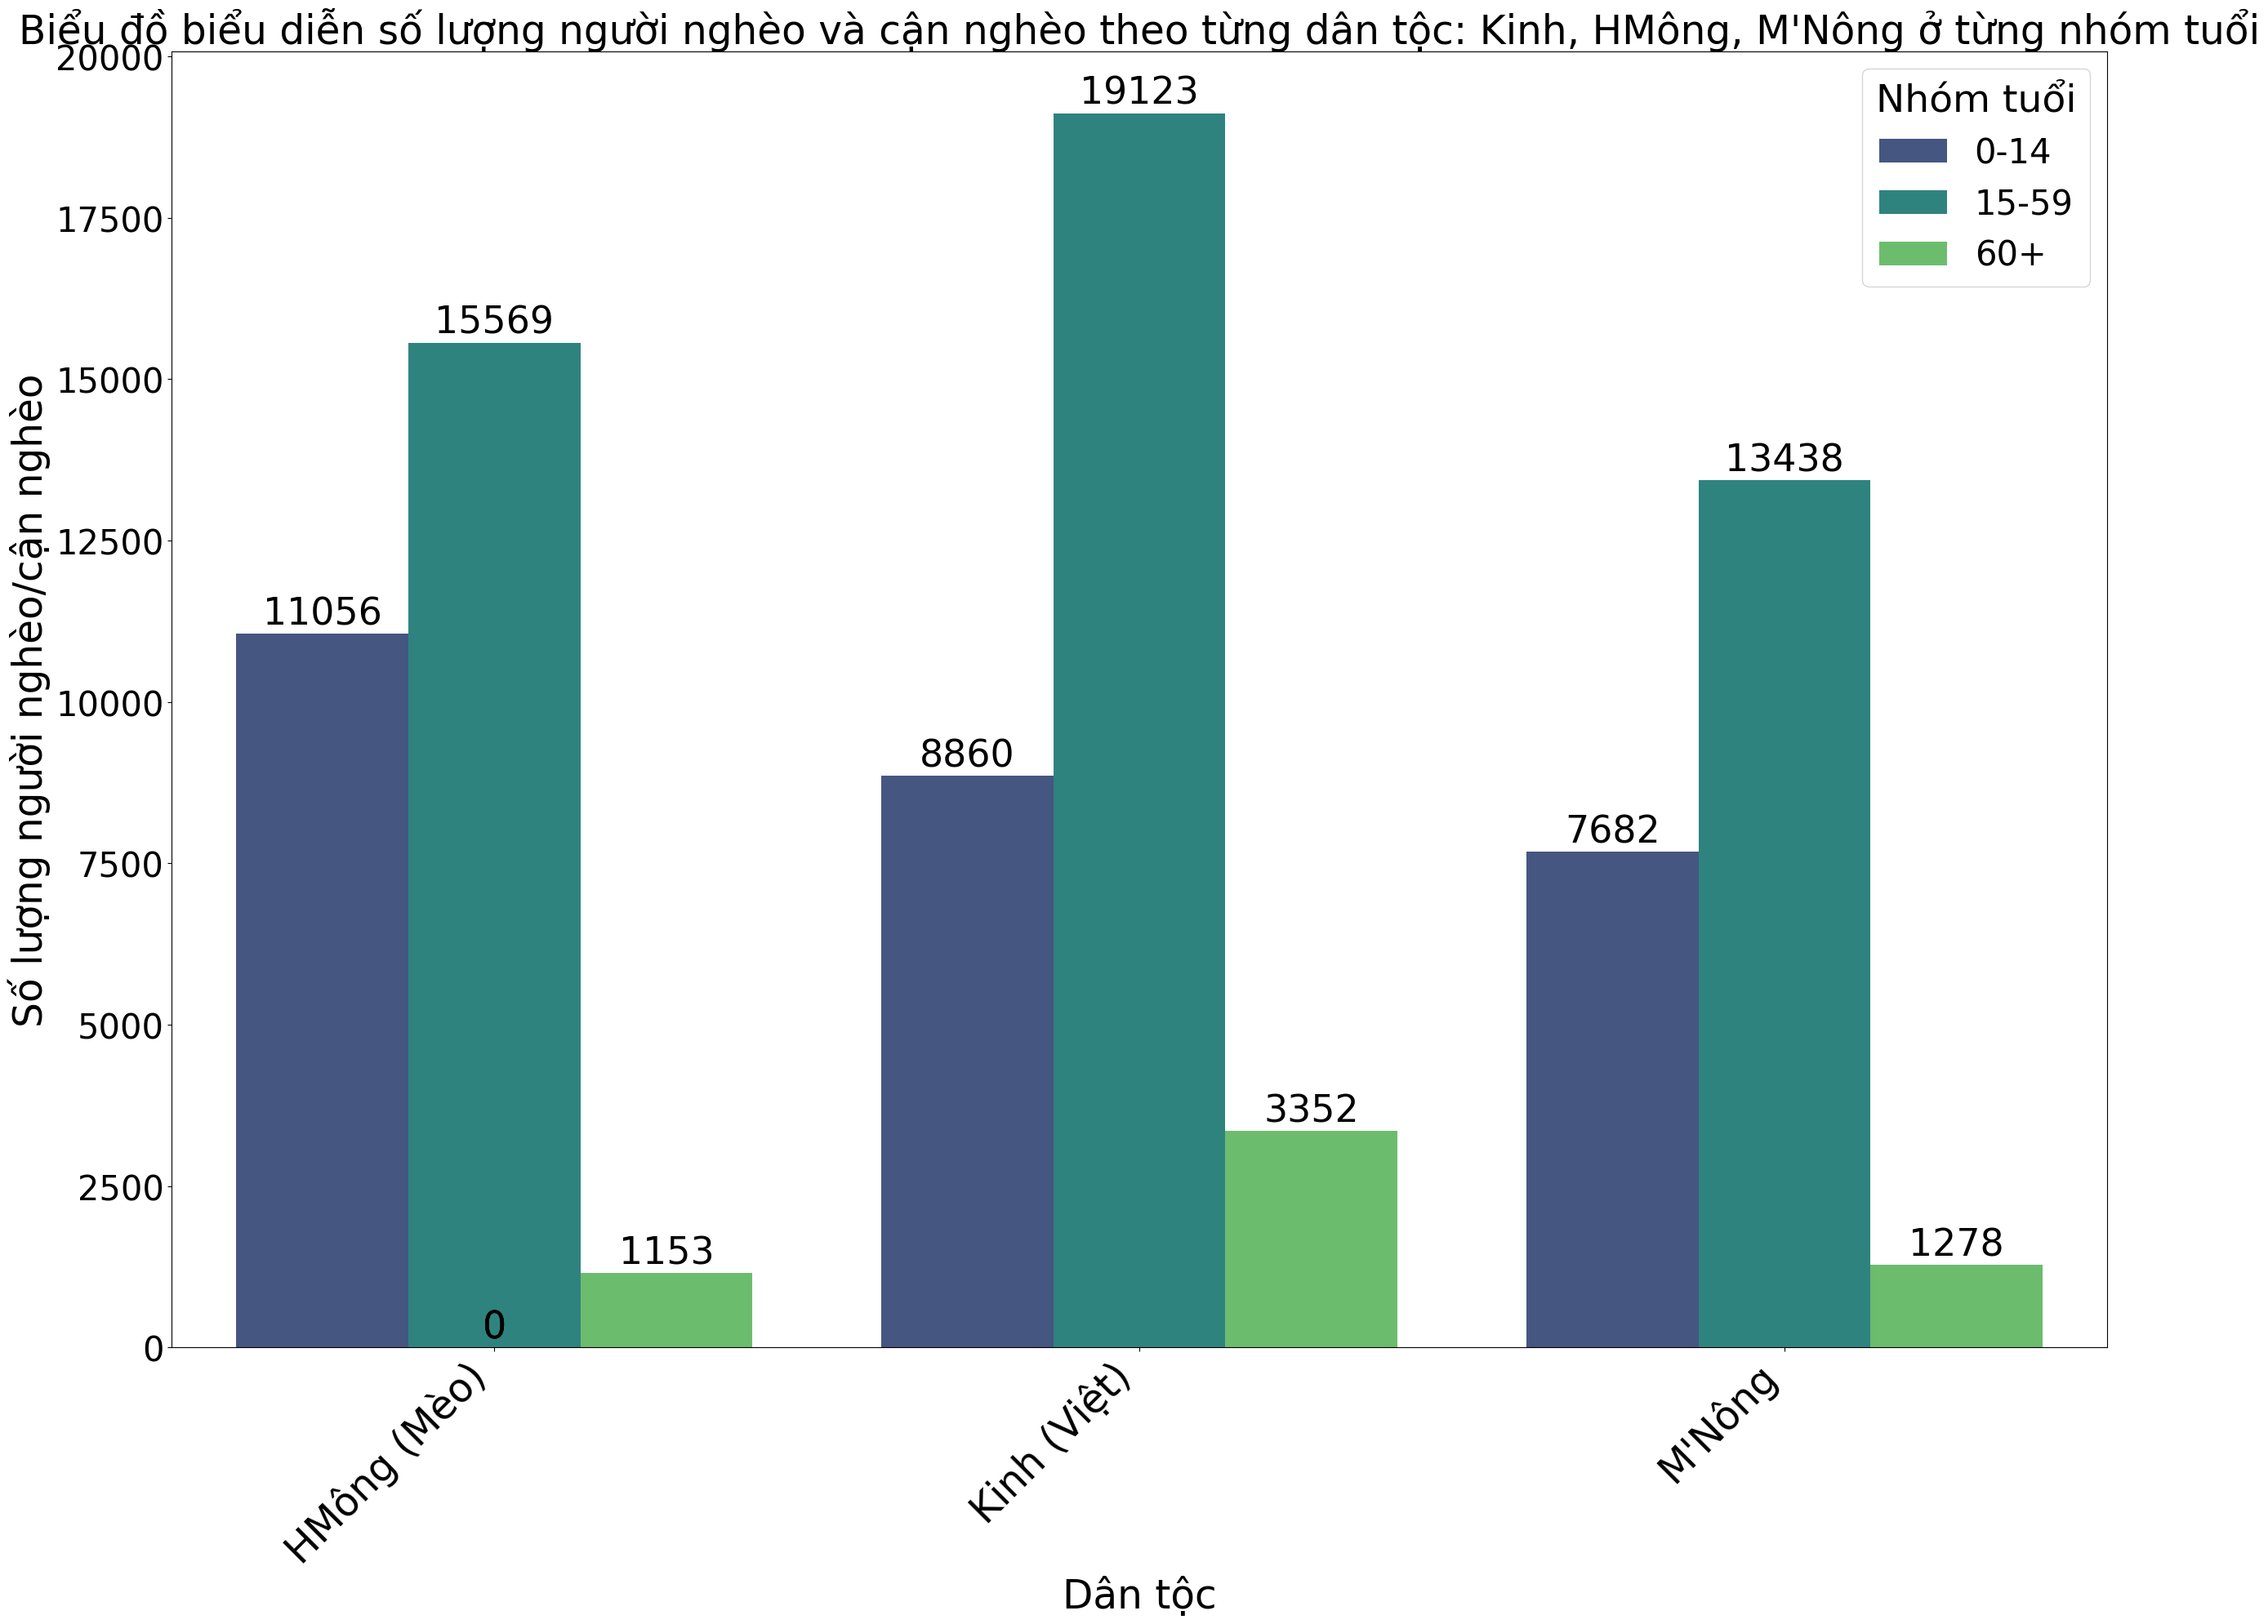

In [164]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Giả sử df_tong_hop là DataFrame của bạn
# Tạo cột nhóm tuổi
def classify_age(age):
    if age <= 14:
        return '0-14'
    elif 15 <= age <= 59:
        return '15-59'
    else:
        return '60+'

df_tong_hop['NHOM_TUOI'] = df_tong_hop['TUOI'].apply(classify_age)

# Lọc dữ liệu để lấy người nghèo và cận nghèo
df_ngheo = df_tong_hop[df_tong_hop['PHAN_LOAI_HO'].isin([1, 2])]  # 1: Nghèo, 2: Cận nghèo

# Lọc theo các dân tộc cụ thể: Kinh, HMông, M'Nông
df_ngheo_filtered = df_ngheo[df_ngheo['DANTOC'].isin(['Kinh (Việt)', 'HMông (Mèo)', 'M\'Nông'])]

# Tạo bảng phân bố số lượng theo huyện, dân tộc và nhóm tuổi
distribution = df_ngheo_filtered.groupby(['DANTOC', 'NHOM_TUOI']).size().reset_index(name='SO_LUONG')

# Vẽ biểu đồ phân bố
plt.figure(figsize=(26, 20))  # Tăng kích thước của biểu đồ
sns.barplot(data=distribution, x='DANTOC', y='SO_LUONG', hue='NHOM_TUOI', palette='viridis', ci=None)

# Thêm nhãn trên đầu cột
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height() + 20,  # Tăng khoảng cách từ đầu cột
             f'{int(p.get_height())}', 
             ha='center', va='bottom', fontsize=33, color='black')  # Tăng kích thước chữ và chọn màu

# Thêm tiêu đề và nhãn
plt.title('Biểu đồ biểu diễn số lượng người nghèo và cận nghèo theo từng dân tộc: Kinh, HMông, M\'Nông ở từng nhóm tuổi', fontsize=35)
plt.xlabel('Dân tộc', fontsize=35)
plt.ylabel('Số lượng người nghèo/cận nghèo', fontsize=35)

plt.xticks(rotation=45, ha='right', fontsize=35)  # Xoay nhãn trục X, căn chỉnh cho dễ đọc và tăng kích thước chữ
plt.yticks(fontsize=30)
# Hiển thị biểu đồ
plt.legend(title='Nhóm tuổi', fontsize=30,title_fontsize='34')
plt.tight_layout()
plt.show()


> Đắk Glong dân tộc

C:\Users\hdang\AppData\Local\Temp\ipykernel_16776\1056003098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dak_glong['NHOM_TUOI'] = df_dak_glong['TUOI'].apply(classify_age)


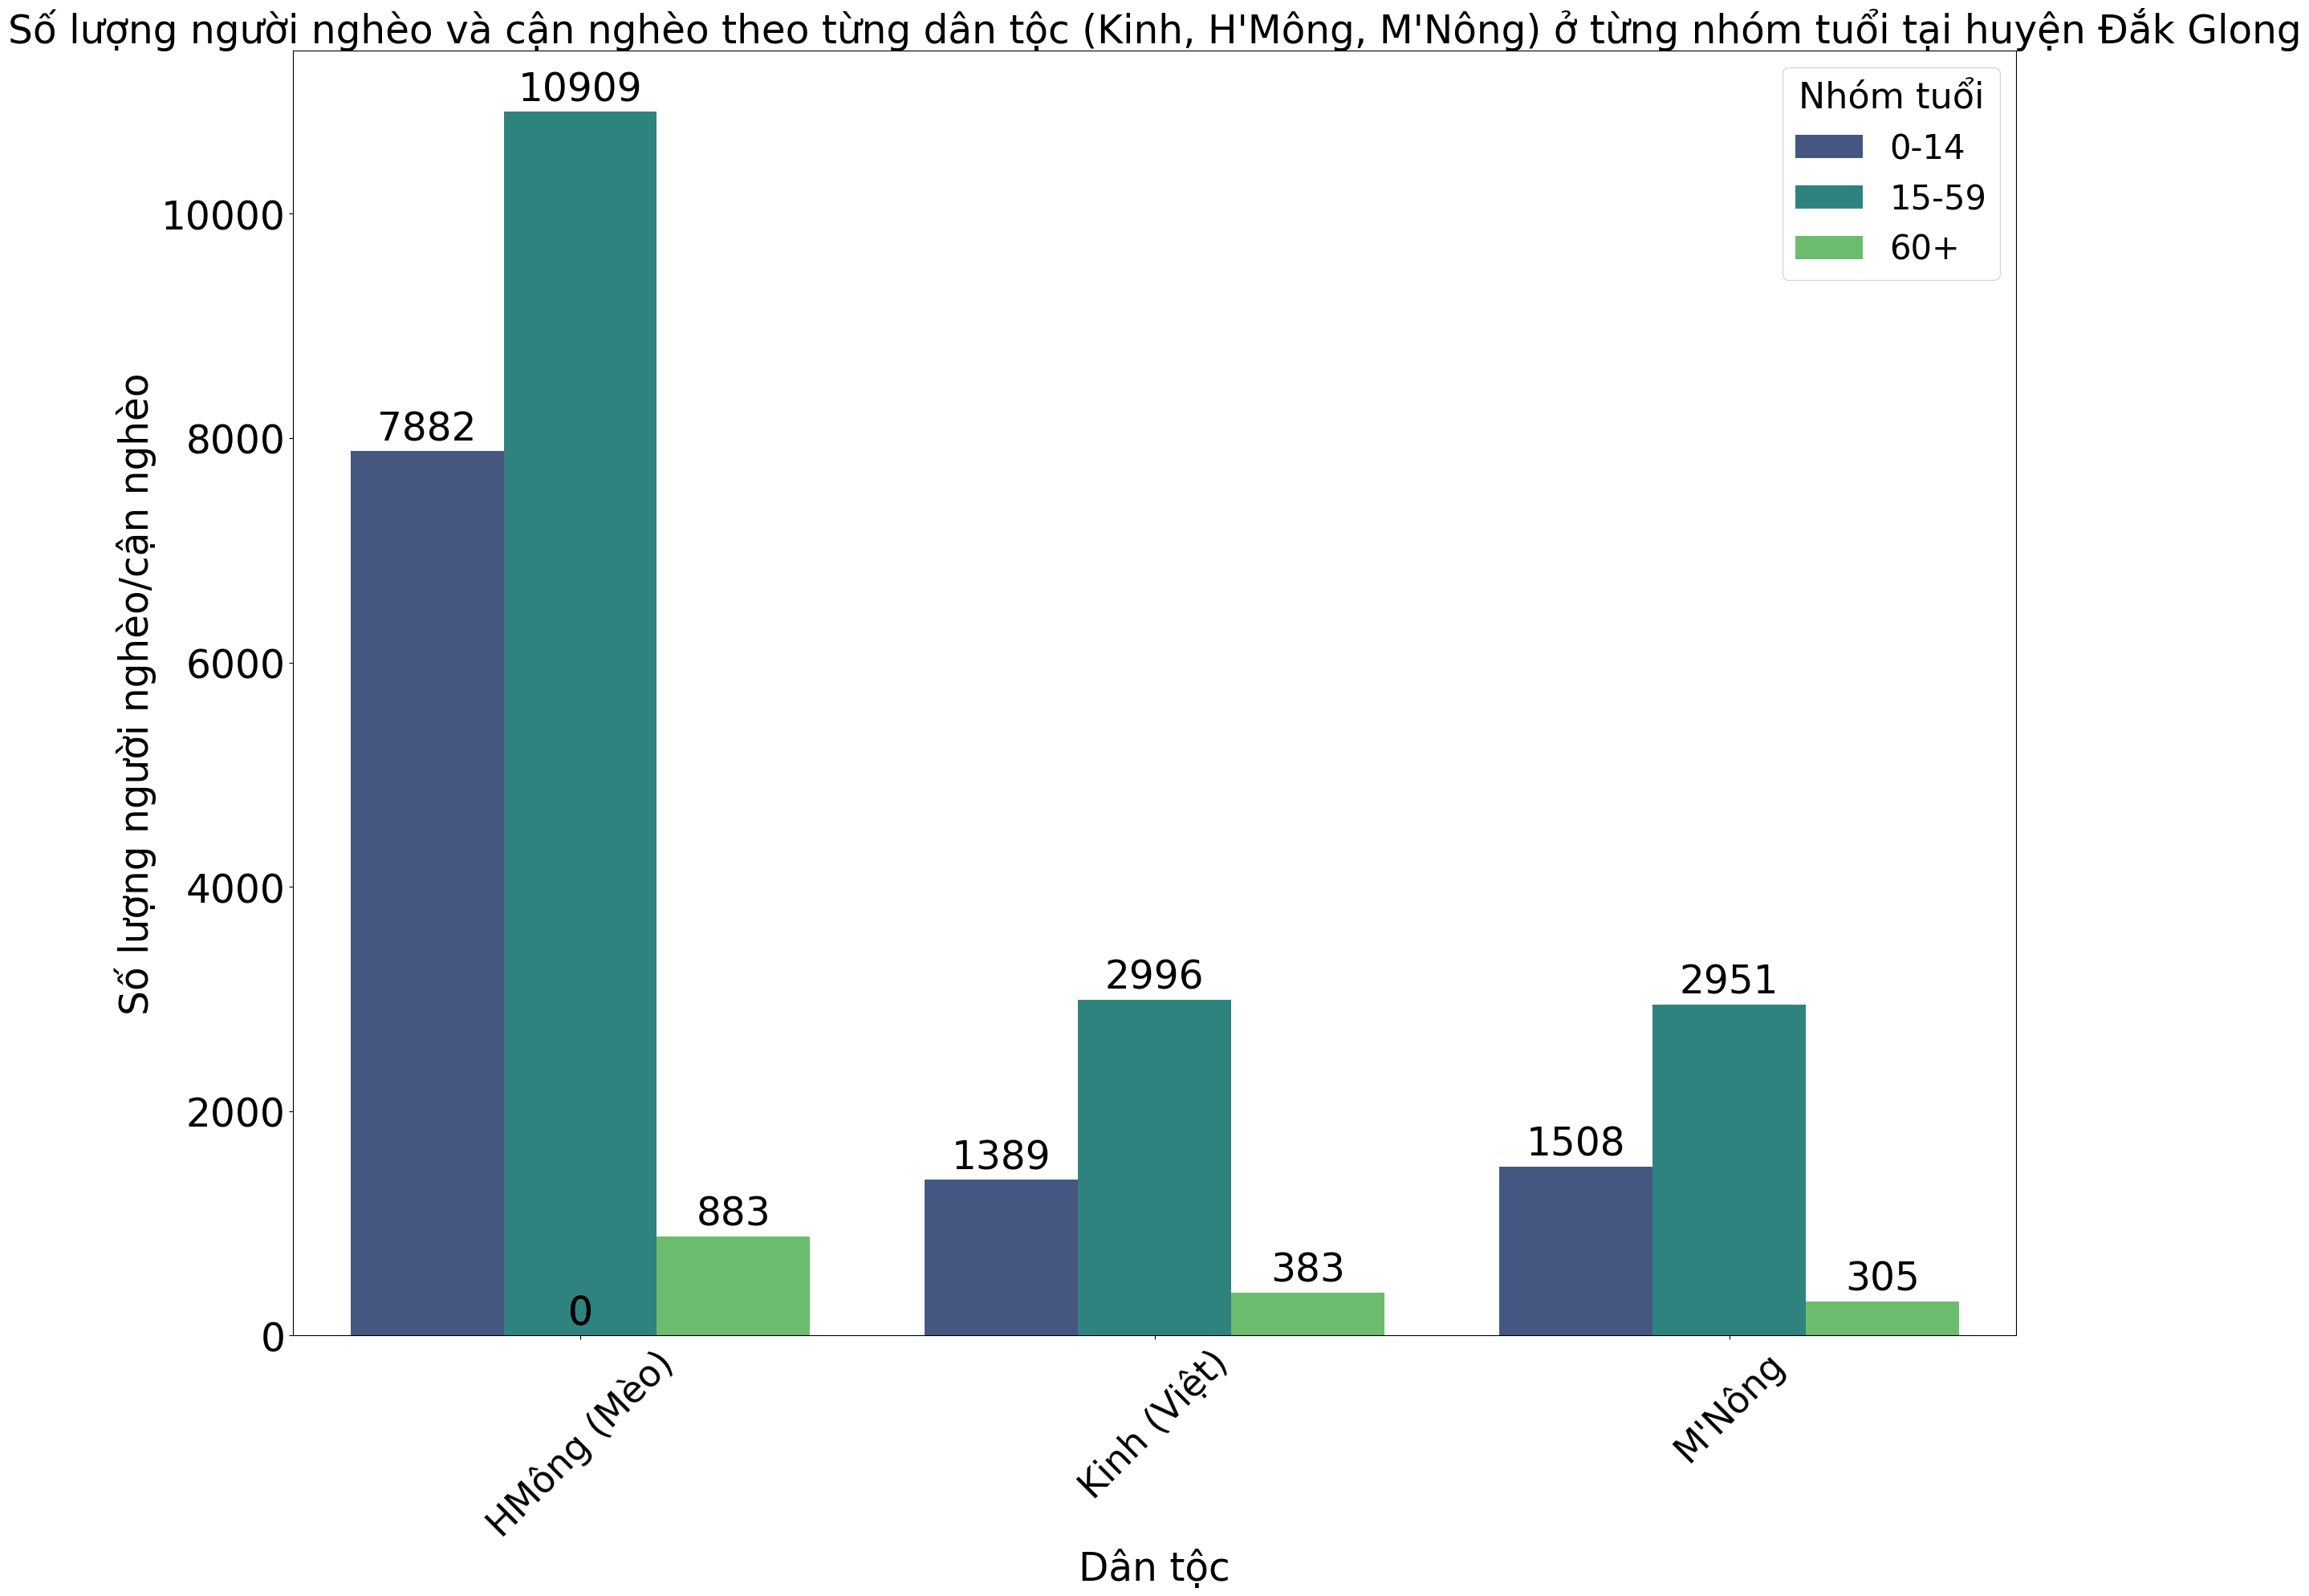

In [163]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Giả sử df_dak_glong là DataFrame của bạn
# Tạo cột nhóm tuổi
def classify_age(age):
    if age <= 14:
        return '0-14'
    elif 15 <= age <= 59:
        return '15-59'
    else:
        return '60+'

df_dak_glong['NHOM_TUOI'] = df_dak_glong['TUOI'].apply(classify_age)

# Lọc dữ liệu để lấy người nghèo và cận nghèo
df_ngheo = df_dak_glong[df_dak_glong['PHAN_LOAI_HO'].isin([1, 2])]  # 1: Nghèo, 2: Cận nghèo

# Lọc theo các dân tộc cụ thể: Kinh, H'Mông, M'Nông
df_ngheo_filtered = df_ngheo[df_ngheo['DANTOC'].isin(['Kinh (Việt)', 'HMông (Mèo)', 'M\'Nông'])]

# Tạo bảng phân bố số lượng theo dân tộc và nhóm tuổi
distribution = df_ngheo_filtered.groupby(['DANTOC', 'NHOM_TUOI']).size().reset_index(name='SO_LUONG')

# Vẽ biểu đồ phân bố
plt.figure(figsize=(24, 20))  # Tăng kích thước của biểu đồ
sns.barplot(data=distribution, x='DANTOC', y='SO_LUONG', hue='NHOM_TUOI', palette='viridis', ci=None)

# Thêm nhãn trên đầu cột
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height() + 30,  # Tăng khoảng cách từ đầu cột
             f'{int(p.get_height())}', 
             ha='center', va='bottom', fontsize=35, color='black')  # Tăng kích thước chữ và chọn màu

# Thêm tiêu đề và nhãn
plt.title('Số lượng người nghèo và cận nghèo theo từng dân tộc (Kinh, H\'Mông, M\'Nông) ở từng nhóm tuổi tại huyện Đắk Glong', fontsize=35)
plt.xlabel('Dân tộc', fontsize=35)
plt.ylabel('Số lượng người nghèo/cận nghèo', fontsize=35)

# Xoay nhãn trục x để dễ đọc và tăng kích thước chữ
plt.xticks(rotation=45, fontsize=33)
plt.yticks(fontsize=35)
# Hiển thị biểu đồ
plt.legend(title='Nhóm tuổi', fontsize=30, title_fontsize='32')
plt.tight_layout()
plt.show()


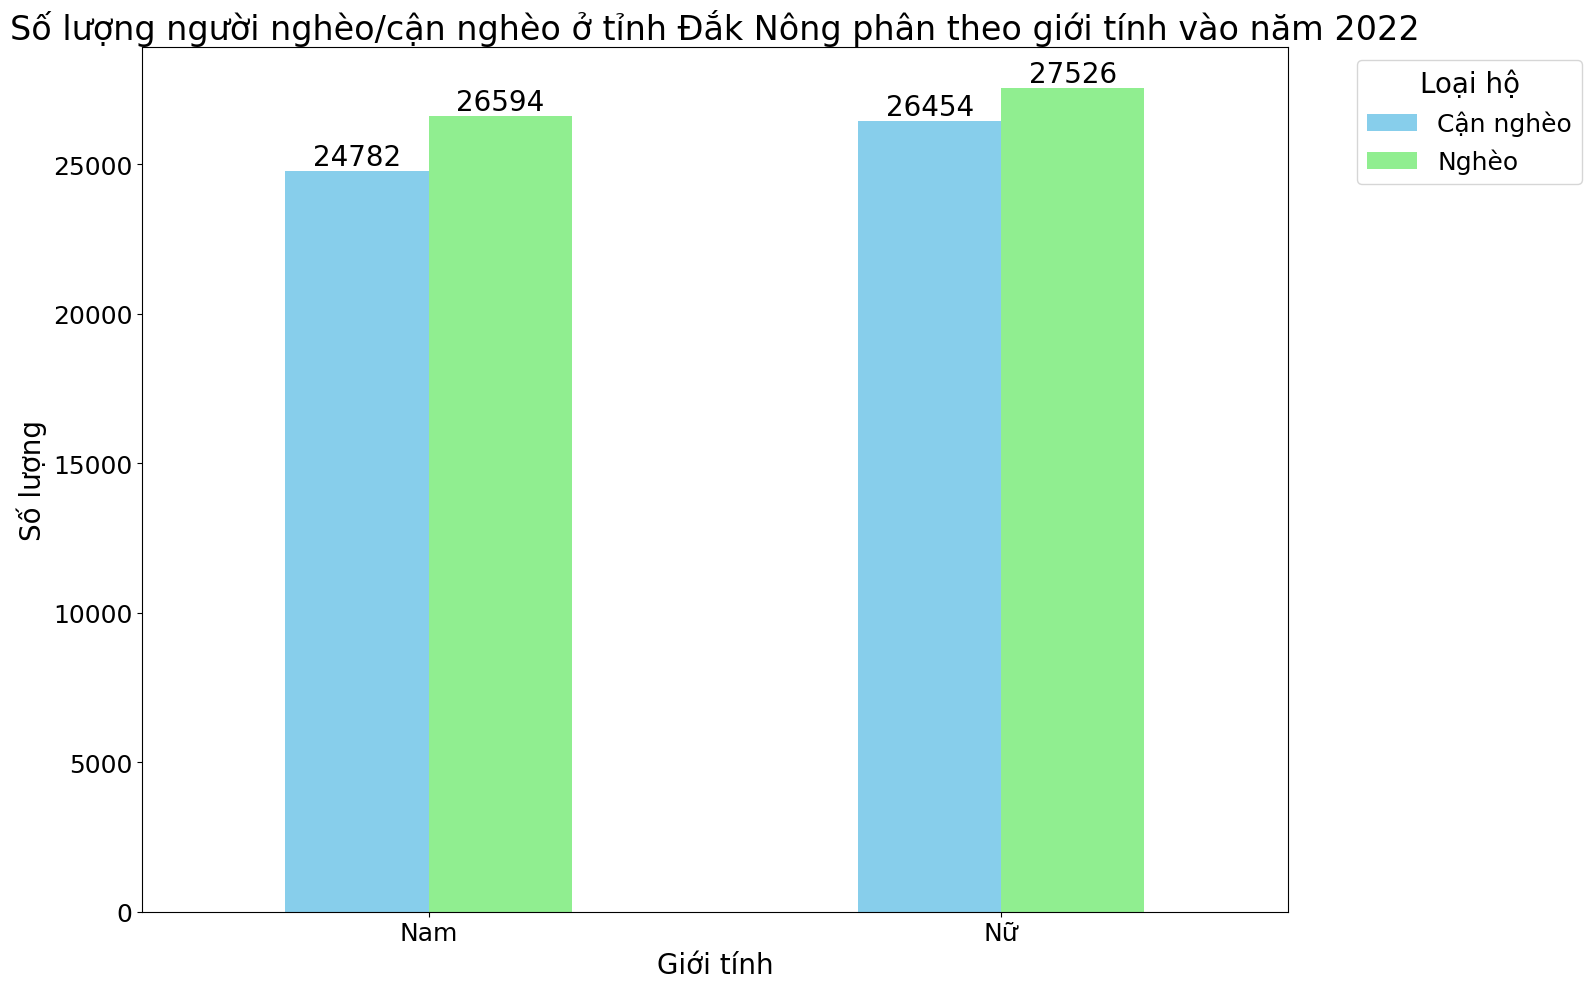

In [193]:
# Lọc dữ liệu chỉ lấy các hàng là người nghèo (1) hoặc cận nghèo (2)
df_poor = df_tong_hop[df_tong_hop['PHAN_LOAI_HO'].isin([1, 2])]

# Đổi tên giá trị trong cột 'PHAN_LOAI_HO'
df_poor['PHAN_LOAI_HO'] = df_poor['PHAN_LOAI_HO'].replace({1: 'Nghèo', 2: 'Cận nghèo'})

# Đổi tên giá trị trong cột 'GIOI_TINH'
df_poor['GIOI_TINH'] = df_poor['GIOI_TINH'].replace({1: 'Nam', 2: 'Nữ'})

# Đếm số lượng người nghèo/cận nghèo theo giới tính
gender_counts = df_poor.groupby(['GIOI_TINH', 'PHAN_LOAI_HO']).size().unstack()

# Vẽ biểu đồ cột
ax = gender_counts.plot(kind='bar', figsize=(16, 10), color=['skyblue', 'lightgreen'])

# Đặt tên và kích thước cho các trục và tiêu đề biểu đồ
plt.title('Số lượng người nghèo/cận nghèo ở tỉnh Đắk Nông phân theo giới tính vào năm 2022', fontsize=24)
plt.xlabel('Giới tính', fontsize=20)
plt.ylabel('Số lượng', fontsize=20)
plt.xticks(rotation=0, fontsize=18)
plt.yticks(fontsize=18)

# Hiển thị chú thích với kích thước chữ lớn hơn
plt.legend(title='Loại hộ', fontsize=18, title_fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left')

# Thêm nhãn số lượng trên các cột với kích thước lớn hơn
for container in ax.containers:
    ax.bar_label(container, fontsize=20)

# Hiển thị biểu đồ
plt.tight_layout()  # Đảm bảo các nhãn không bị cắt xén
plt.show()


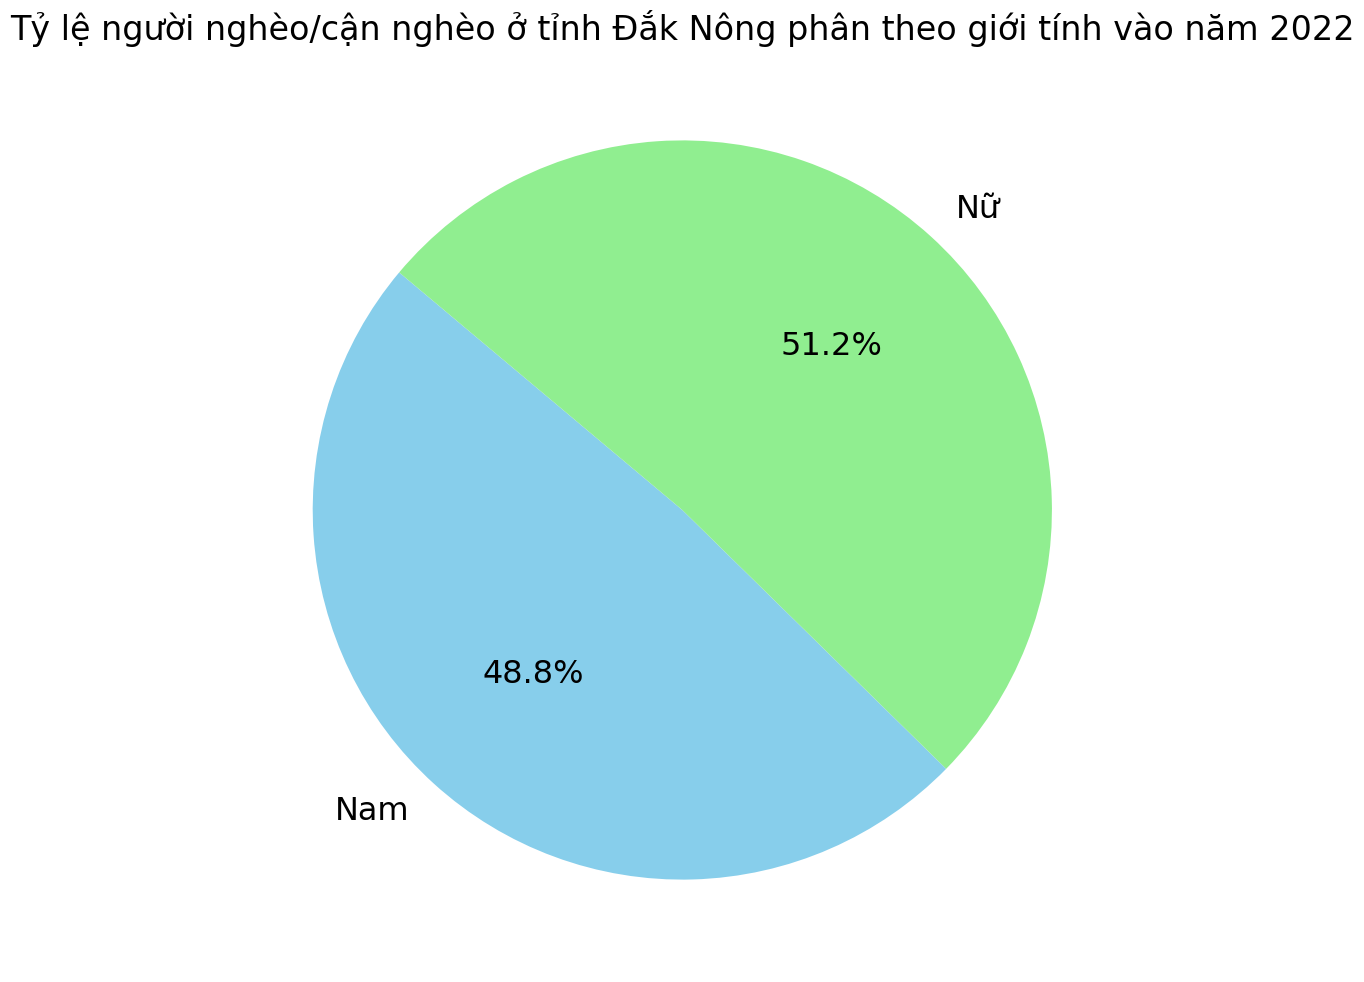

In [196]:
# Lọc dữ liệu chỉ lấy các hàng là người nghèo (1) hoặc cận nghèo (2)
df_poor = df_tong_hop[df_tong_hop['PHAN_LOAI_HO'].isin([1, 2])]

# Đổi tên giá trị trong cột 'PHAN_LOAI_HO'
df_poor['PHAN_LOAI_HO'] = df_poor['PHAN_LOAI_HO'].replace({1: 'Nghèo', 2: 'Cận nghèo'})

# Đổi tên giá trị trong cột 'GIOI_TINH'
df_poor['GIOI_TINH'] = df_poor['GIOI_TINH'].replace({1: 'Nam', 2: 'Nữ'})

# Đếm tổng số lượng người nghèo và cận nghèo theo giới tính
gender_poor_total_counts = df_poor.groupby('GIOI_TINH').size()

# Vẽ biểu đồ tròn
plt.figure(figsize=(12, 12))  # Tăng kích thước biểu đồ
gender_poor_total_counts.plot(
    kind='pie', 
    autopct='%1.1f%%',  # Hiển thị tỷ lệ phần trăm
    startangle=140, 
    colors=['skyblue', 'lightgreen'], 
    textprops={'fontsize': 23}  # Tăng kích thước chữ cho tỷ lệ phần trăm
)

# Đặt tiêu đề cho biểu đồ với kích thước lớn hơn
plt.title('Tỷ lệ người nghèo/cận nghèo ở tỉnh Đắk Nông phân theo giới tính vào năm 2022', fontsize=24)

# Ẩn nhãn của trục y
plt.ylabel('')

# Hiển thị biểu đồ
plt.show()


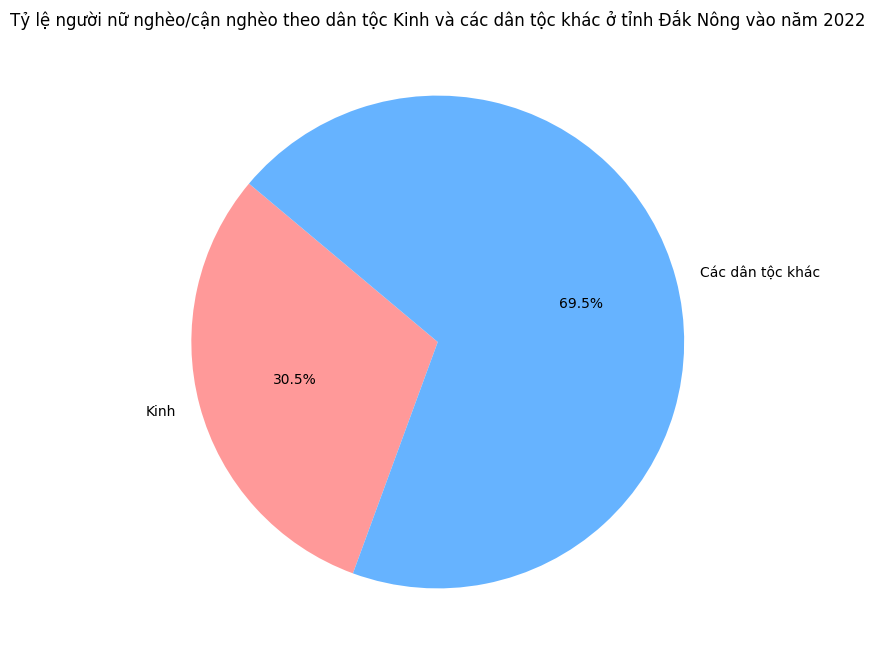

In [94]:
# Lọc dữ liệu chỉ lấy các hàng là người nữ (2)
df_female = df_tong_hop[df_tong_hop['GIOI_TINH'] == 2]

# Tính số lượng người nữ dân tộc Kinh
kinh_count = df_female[df_female['DANTOC'] == 'Kinh (Việt)'].shape[0]

# Tính số lượng người nữ các dân tộc khác
other_count = df_female[df_female['DANTOC'] != 'Kinh (Việt)'].shape[0]

# Tạo DataFrame cho biểu đồ tròn
data = pd.Series([kinh_count, other_count], index=['Kinh', 'Các dân tộc khác'])

# Vẽ biểu đồ tròn với màu sắc mới
plt.figure(figsize=(8, 8))
data.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#ff9999', '#66b3ff'])
plt.title('Tỷ lệ người nữ nghèo/cận nghèo theo dân tộc Kinh và các dân tộc khác ở tỉnh Đắk Nông vào năm 2022')
plt.ylabel('')  # Ẩn nhãn của trục y
plt.show()


In [95]:
df_tong_hop.columns

Index(['STT_HO', 'HO_TEN_CHU_HO', 'HO_TEN_THANH_VIEN', 'QUANHE_CHUHO',
       'NGAY_SINH', 'GIOI_TINH', 'SO_CCCD', 'TINH', 'HUYEN', 'XA', 'DANTOC',
       'PHAN_LOAI_HO', 'TUOI', 'Group', 'NHOM_TUOI'],
      dtype='object')

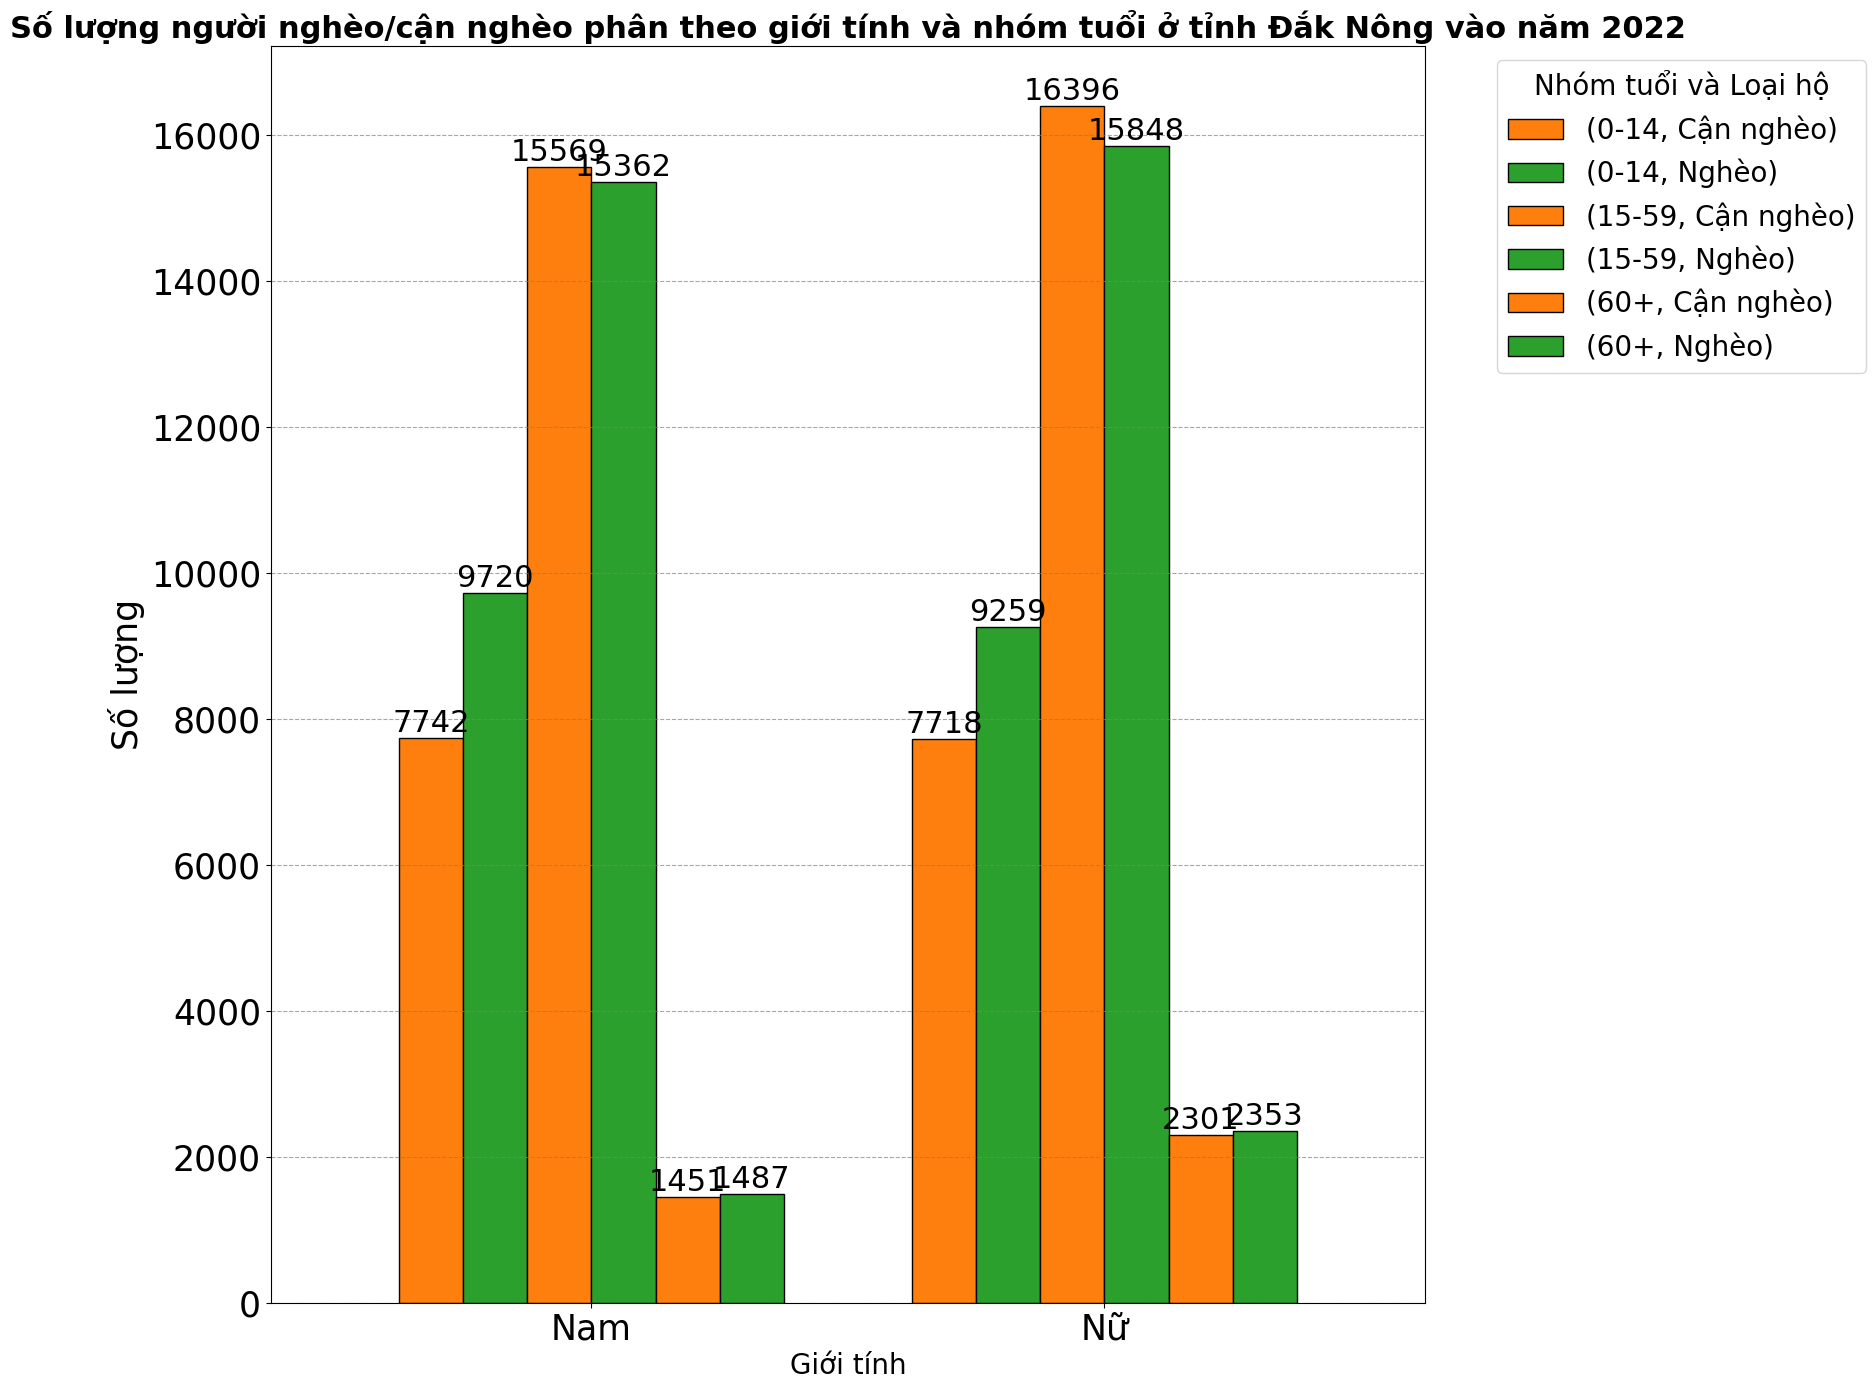

In [208]:
import matplotlib.pyplot as plt

# Giả sử df_tong_hop đã có sẵn và có cột 'TUOI' chứa tuổi của mỗi cá nhân
# Thêm cột nhóm tuổi
bins = [0, 14, 59, 100]
labels = ['0-14', '15-59', '60+']
df_tong_hop['NHOM_TUOI'] = pd.cut(df_tong_hop['TUOI'], bins=bins, labels=labels, right=True)

# Lọc dữ liệu chỉ lấy các hàng là người nghèo (1) hoặc cận nghèo (2)
df_poor = df_tong_hop[df_tong_hop['PHAN_LOAI_HO'].isin([1, 2])]

# Đổi tên giá trị trong cột 'PHAN_LOAI_HO'
df_poor['PHAN_LOAI_HO'] = df_poor['PHAN_LOAI_HO'].replace({1: 'Nghèo', 2: 'Cận nghèo'})

# Đổi tên giá trị trong cột 'GIOI_TINH'
df_poor['GIOI_TINH'] = df_poor['GIOI_TINH'].replace({1: 'Nam', 2: 'Nữ'})

# Đếm số lượng người nghèo/cận nghèo theo nhóm tuổi và giới tính
age_gender_counts = df_poor.groupby(['GIOI_TINH', 'NHOM_TUOI', 'PHAN_LOAI_HO']).size().unstack(level=[1, 2])

# Vẽ biểu đồ cột
fig, ax = plt.subplots(figsize=(18, 14))  # Tăng kích thước biểu đồ

# Đổi màu biểu đồ với màu sắc nổi bật
age_gender_counts.plot(kind='bar', ax=ax, color=['#FF7F0E', '#2CA02C'], edgecolor='black', width=0.75)

# Cài đặt tiêu đề và nhãn trục với kích thước font lớn hơn
plt.title('Số lượng người nghèo/cận nghèo phân theo giới tính và nhóm tuổi ở tỉnh Đắk Nông vào năm 2022', fontsize=22, fontweight='bold')
plt.xlabel('Giới tính', fontsize=20)
plt.ylabel('Số lượng', fontsize=25)
plt.xticks(rotation=0, fontsize=25)
plt.yticks(fontsize=25)

# Thêm đường lưới
ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.7)

# Đặt vị trí chú thích (legend)
plt.legend(title='Nhóm tuổi và Loại hộ', title_fontsize=20, fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left')

# Thêm nhãn số lượng trên các cột
for container in ax.containers:
    ax.bar_label(container, fontsize=22)

plt.tight_layout()
plt.show()


Đắk Glong

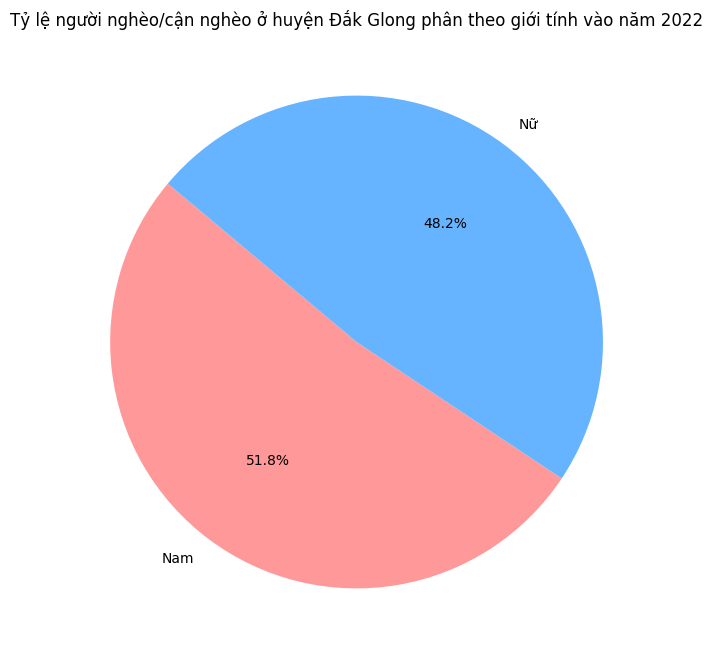

In [97]:

# Lọc dữ liệu chỉ lấy các hàng là người nghèo (1) hoặc cận nghèo (2)
df_poor = df_huyen_dak_glong[df_huyen_dak_glong['PHAN_LOAI_HO'].isin([1, 2])]

# Đổi tên giá trị trong cột 'PHAN_LOAI_HO'
df_poor['PHAN_LOAI_HO'] = df_poor['PHAN_LOAI_HO'].replace({1: 'Nghèo', 2: 'Cận nghèo'})

# Đổi tên giá trị trong cột 'GIOI_TINH'
df_poor['GIOI_TINH'] = df_poor['GIOI_TINH'].replace({1: 'Nam', 2: 'Nữ'})

# Đếm tổng số lượng người nghèo và cận nghèo theo giới tính
gender_poor_total_counts = df_poor.groupby('GIOI_TINH').size()

# Vẽ biểu đồ tròn với màu sắc khác
plt.figure(figsize=(8, 8))
gender_poor_total_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#FF9999', '#66B3FF'])  # Đổi màu
plt.title('Tỷ lệ người nghèo/cận nghèo ở huyện Đắk Glong phân theo giới tính vào năm 2022')
plt.ylabel('')  # Ẩn nhãn của trục y
plt.show()


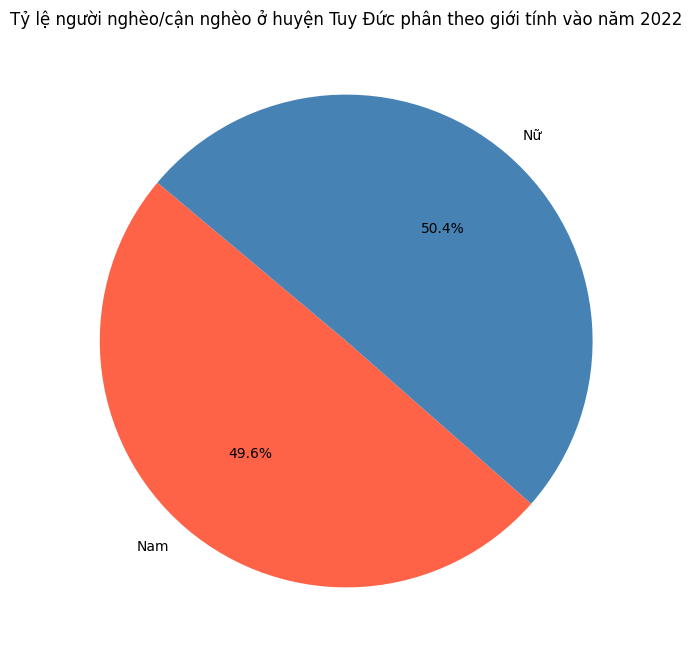

In [98]:
import matplotlib.pyplot as plt

# Lọc dữ liệu chỉ lấy các hàng là người nghèo (1) hoặc cận nghèo (2)
df_poor = df_tuy_duc[df_tuy_duc['PHAN_LOAI_HO'].isin([1, 2])]

# Đổi tên giá trị trong cột 'PHAN_LOAI_HO'
df_poor['PHAN_LOAI_HO'] = df_poor['PHAN_LOAI_HO'].replace({1: 'Nghèo', 2: 'Cận nghèo'})

# Đổi tên giá trị trong cột 'GIOI_TINH'
df_poor['GIOI_TINH'] = df_poor['GIOI_TINH'].replace({1: 'Nam', 2: 'Nữ'})

# Đếm tổng số lượng người nghèo và cận nghèo theo giới tính
gender_poor_total_counts = df_poor.groupby('GIOI_TINH').size()

# Vẽ biểu đồ tròn với màu sắc khác
plt.figure(figsize=(8, 8))
gender_poor_total_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#FF6347', '#4682B4'])  # Đổi màu
plt.title('Tỷ lệ người nghèo/cận nghèo ở huyện Tuy Đức phân theo giới tính vào năm 2022')
plt.ylabel('')  # Ẩn nhãn của trục y
plt.show()


> Histogram


## 3.Xây dựng mô hình học máy

> Áp dụng thuật toán phân cụm để nhóm các hộ gia đình có đặc điểm tương tự dựa trên thành phần dân tộc, giới tính, huyện,xã.

### 3.1 Trích xuất các thuộc tính cần cho mô hình học máy

In [99]:
# Lựa chọn các thuộc tính quan trọng
df_cluster = df_tong_hop[['GIOI_TINH', 'HUYEN', 'XA','TUOI']]

### 3.2. Chuyển đổi các thuộc tính chuỗi sang số

> Chuyển sang số

In [100]:
df_cluster=df_cluster.copy()
# Initialize LabelEncoder
label_encoder = LabelEncoder()
df_cluster['HUYEN'] = label_encoder.fit_transform(df_cluster['HUYEN'])
df_cluster['XA'] = label_encoder.fit_transform(df_cluster['XA'])


> 5 dòng đầu tiên

In [101]:
df_cluster.head(5)

GIOI_TINH  HUYEN  XA   TUOI
0        2.0      0  38  119.0
1        1.0      0  38  119.0
2        2.0      0  38  119.0
3        2.0      0  38  119.0
4        1.0      0  38  119.0

In [102]:
df_cluster.shape

(105356, 4)

In [103]:
df_cluster.isnull().sum()

GIOI_TINH    0
HUYEN        0
XA           0
TUOI         0
dtype: int64

> Chuẩn hoá dữ liệu

In [104]:
scaler = MinMaxScaler()
df_cluster = scaler.fit_transform(df_cluster)

### 3.3. Áp dụng thuật toán phân cụm

> Xác định số lượng cụm cần phải phân

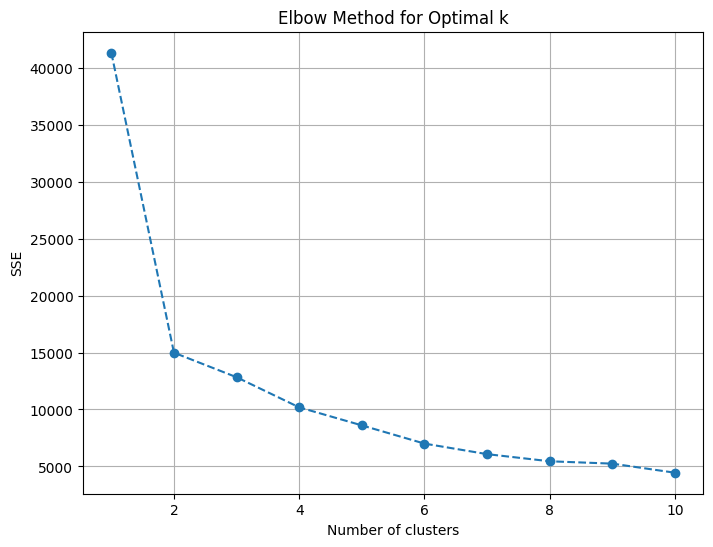

In [105]:
# List để lưu SSE
sse = []

# Số lượng cụm từ 1 đến 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cluster)
    sse.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

##### Quan sát biểu đồ ta thấy được
- Số lượng cụm là 2 là tối ưu nhất

> Khởi tạo mô hình và thực hiện training

In [106]:
# Số lượng nhóm cần phân cụm
num_clusters = 2

# Khởi tạo và fit model K-means
kmeans = KMeans(n_clusters=num_clusters, init='k-means++',random_state=0)
kmeans.fit(df_cluster)



KMeans(n_clusters=2, random_state=0)

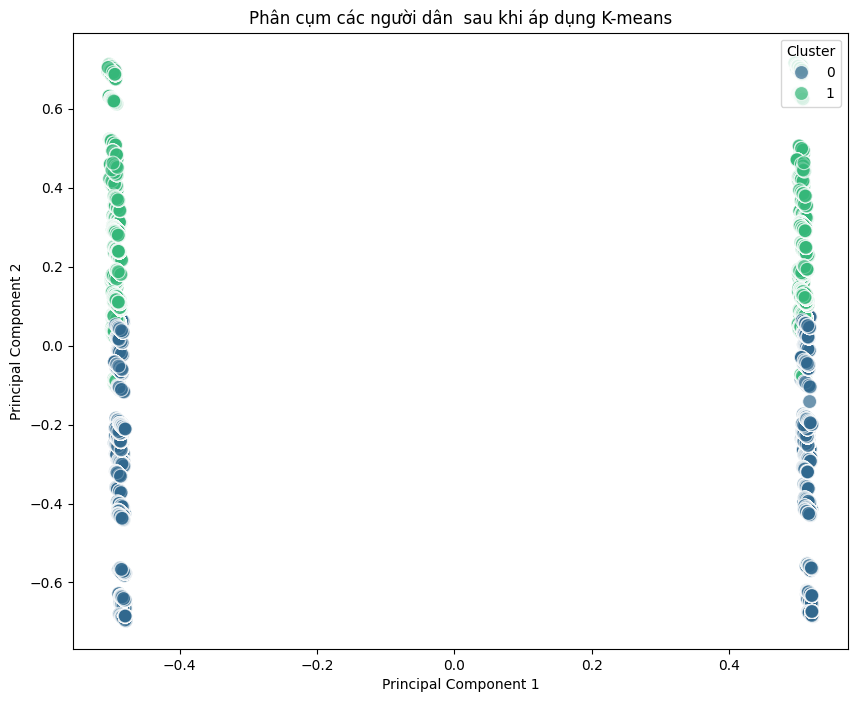

In [107]:
# Giảm chiều dữ liệu về 2 chiều để trực quan hóa
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_cluster)

# Tạo DataFrame mới từ dữ liệu giảm chiều
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Thêm cột nhãn phân cụm
df_pca['Cluster'] = kmeans.labels_

# Vẽ biểu đồ Scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis', s=100, alpha=0.7)
plt.title('Phân cụm các người dân  sau khi áp dụng K-means')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='upper right')
plt.show()


##### Quan sát biểu đồ ta thấy
- Có 2 cụm và các người dân được phân bổ vào 2 cụm đó 
- Tức là những người có những điểm tương đồng sẽ được sếp vào nhũng cụm tương ứng
- Việc phân cụm giúp các người dân được phân chia thành các cụm dựa trên đặc điểm tương đồng. Từ đó, chúng ta có thể đề xuất các chính sách hỗ trợ cụ thể cho từng nhóm người dân dựa trên các đặc điểm đã phân cụm.

### 3.4. Đánh giá kết quả

In [108]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(df_cluster, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")


KeyboardInterrupt: 